# Load libraries

In [2]:
library(tidyverse)
library(lmerTest)
library(multcomp)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Lade nötiges Paket: lme4

Lade nötiges Paket: Matrix


Attache Paket: ‘Matrix’


Die folgenden Objekte sind maskiert von ‘package:tidyr’:

    expand, pack, unpack



Attache Paket: ‘lmerTest’


Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


Das folgende Objekt ist maskiert ‘package:stats’:

    step


Lade nötiges Paket: mvtnorm

Lade nötiges Paket: survival

Lade nötiges Paket: TH.data

Lade nötiges Paket: MASS


Attache Paket: ‘MASS’


Das folgende Objekt

# Set up paths

In [3]:
code_dir <- getwd()
project_dir <- file.path(code_dir, "..")
input_dir <- file.path(code_dir, "../sourcedata")
output_dir <- file.path(code_dir, "../output/linear_models_supratentorial")
plot_dir <- file.path(code_dir, "../output/plots_supratentorial")

# Check if the directories exists

for (dir in c(output_dir, plot_dir)) {
  # Check if the directory exists
  if (!dir.exists(dir)) {
    # Create the directory if it does not exist
    dir.create(dir)
    cat("Created directory:", dir, "\n")
  } else {
    cat("Directory already exists:", dir, "\n")
  }
}

Directory already exists: /media/csi/sda1/CSI_SFBC1/data/statistics/code/../output/linear_models_supratentorial 
Directory already exists: /media/csi/sda1/CSI_SFBC1/data/statistics/code/../output/plots_supratentorial 


# Load dataframes

In [4]:
df_joined <- read_csv(file.path(input_dir, "df_joined.csv"))
df_esoc_norm <- read_csv(file.path(input_dir, "df_normalized.csv"))

Rows: 157 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): sub_id, group, sex, dominant_hand, lesion_side, lesion_location, l...
dbl (67): ses_id, age, lesion_volume_flair, eitv, days_since_stroke, nihss, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1413 Columns: 78
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): sub_id, group, sex, dominant_hand, lesion_side, lesion_location, l...
dbl (70): ses_id, age, lesion_volume_flair, eitv, days_since_stroke, nihss, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Linear models

## Prepare dataframes

### Dataframe subset with supratentorial infarcts and removal of subjects without diffusion data

In [5]:
df_patients_supratentorial_all <- df_esoc_norm[df_esoc_norm$group == "pat" & df_esoc_norm$lesion_location_category %in% c("cortical","subcortical","cortical_subcortical"), ]
df_patients_supratentorial_all <- drop_na(df_patients_supratentorial_all, "lesionanalysis_lesion_mean_FW")
df_patients_supratentorial_all$ses_id <- factor(df_patients_supratentorial_all$ses_id, levels = 1:4, labels = c("3-5 days", "1 month", "3 months", "1 year"))

In [6]:
# Session 1
df_patients_supratentorial_ses1 <- df_esoc_norm[df_esoc_norm$group == "pat" & df_esoc_norm$ses_id == "1" & df_esoc_norm$lesion_location_category %in% c("cortical","subcortical","cortical_subcortical"), ]
df_patients_supratentorial_ses1 <- drop_na(df_patients_supratentorial_ses1, "lesionanalysis_lesion_mean_FW")
df_patients_supratentorial_ses1$location <- factor(df_patients_supratentorial_ses1$location, levels = c("lesion","2mm","4mm","6mm","8mm","10mm","12mm","14mm","16mm"))

# Session 2
df_patients_supratentorial_ses2 <- df_esoc_norm[df_esoc_norm$group == "pat" & df_esoc_norm$ses_id == "2" & df_esoc_norm$lesion_location_category %in% c("cortical","subcortical","cortical_subcortical"), ]
df_patients_supratentorial_ses2 <- drop_na(df_patients_supratentorial_ses2, c("sub_id", "lesionanalysis_lesion_mean_FW"))
df_patients_supratentorial_ses2$location <- factor(df_patients_supratentorial_ses2$location, levels = c("lesion","2mm","4mm","6mm","8mm","10mm","12mm","14mm","16mm"))

# Session 3
df_patients_supratentorial_ses3 <- df_esoc_norm[df_esoc_norm$group == "pat" & df_esoc_norm$ses_id == "3" & df_esoc_norm$lesion_location_category %in% c("cortical","subcortical","cortical_subcortical"), ]
df_patients_supratentorial_ses3 <- drop_na(df_patients_supratentorial_ses3, c("sub_id", "lesionanalysis_lesion_mean_FW"))
df_patients_supratentorial_ses3$location <- factor(df_patients_supratentorial_ses3$location, levels = c("lesion","2mm","4mm","6mm","8mm","10mm","12mm","14mm","16mm"))

# Session 4
df_patients_supratentorial_ses4 <- df_esoc_norm[df_esoc_norm$group == "pat" & df_esoc_norm$ses_id == "4" & df_esoc_norm$lesion_location_category %in% c("cortical","subcortical","cortical_subcortical"), ]
df_patients_supratentorial_ses4 <- drop_na(df_patients_supratentorial_ses4, c("sub_id", "lesionanalysis_lesion_mean_FW"))
df_patients_supratentorial_ses4$location <- factor(df_patients_supratentorial_ses4$location, levels = c("lesion","2mm","4mm","6mm","8mm","10mm","12mm","14mm","16mm"))


### Lesion / shell vectors per time point

In [7]:
# ### Session 1
lesion_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "lesion",]
shell1_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "2mm",]
shell2_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "4mm",]
shell3_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "6mm",]
shell4_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "8mm",]
shell5_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "10mm",]
shell6_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "12mm",]
shell7_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "14mm",]
shell8_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "16mm",]


In [8]:
### Session 2
lesion_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "lesion",]
shell1_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "2mm",]
shell2_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "4mm",]
shell3_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "6mm",]
shell4_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "8mm",]
shell5_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "10mm",]
shell6_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "12mm",]
shell7_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "14mm",]
shell8_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "16mm",]


In [9]:
### Session 3
lesion_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion",]
shell1_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "2mm",]
shell2_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "4mm",]
shell3_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "6mm",]
shell4_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "8mm",]
shell5_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "10mm",]
shell6_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "12mm",]
shell7_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "14mm",]
shell8_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "16mm",]

In [10]:
### Session 4
lesion_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "lesion",]
shell1_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "2mm",]
shell2_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "4mm",]
shell3_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "6mm",]
shell4_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "8mm",]
shell5_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "10mm",]
shell6_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "12mm",]
shell7_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "14mm",]
shell8_ses4 <- df_patients_supratentorial_ses4[df_patients_supratentorial_ses4$location == "16mm",]

## Setup contrasts

In [15]:
forward_diff_coding <- matrix(c(8/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,
7/9,7/9,-2/9,-2/9,-2/9,-2/9,-2/9,-2/9,-2/9,
6/9,6/9,6/9,-3/9,-3/9,-3/9,-3/9,-3/9,-3/9,
5/9,5/9,5/9,5/9,-4/9,-4/9,-4/9,-4/9,-4/9,
4/9,4/9,4/9,4/9,4/9,-5/9,-5/9,-5/9,-5/9,
3/9,3/9,3/9,3/9,3/9,3/9,-6/9,-6/9,-6/9,
2/9,2/9,2/9,2/9,2/9,2/9,2/9,-7/9,-7/9,
1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,-8/9), ncol=8)

backward_diff_coding <- matrix(c(-8/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,
-7/9,-7/9,2/9,2/9,2/9,2/9,2/9,2/9,2/9,
-6/9,-6/9,-6/9,3/9,3/9,3/9,3/9,3/9,3/9,
-5/9,-5/9,-5/9,-5/9,4/9,4/9,4/9,4/9,4/9,
-4/9,-4/9,-4/9,-4/9,-4/9,5/9,5/9,5/9,5/9,
-3/9,-3/9,-3/9,-3/9,-3/9,-3/9,6/9,6/9,6/9,
-2/9,-2/9,-2/9,-2/9,-2/9,-2/9,-2/9,7/9,7/9,
-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,8/9), ncol=8)

helmert_coding <- matrix(c(8/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,-1/9,
0,7/8,-1/8,-1/8,-1/8,-1/8,-1/8,-1/8,-1/8,
0,0,6/7,-1/7,-1/7,-1/7,-1/7,-1/7,-1/7,
0,0,0,5/6,-1/6,-1/6,-1/6,-1/6,-1/6,
0,0,0,0,4/5,-1/5,-1/5,-1/5,-1/5,
0,0,0,0,0,3/4,-1/4,-1/4,-1/4,
0,0,0,0,0,0,2/3,-1/3,-1/3,
0,0,0,0,0,0,0,1/2,-1/2), ncol=8)

two_groups_coding <- matrix(c(-1,1),ncol=1)

dummy_coding <- contr.treatment(4)

## Linear mixed model - test between-shell differences accouting for random intercept of subject and covariates

### Free-water - Session 1

In [11]:
df_patients_supratentorial_ses1 %>% group_by(location) %>% summarise(mean(fw), sd(fw))

location,mean(fw),sd(fw)
<fct>,<dbl>,<dbl>
lesion,0.29032143,0.4453984
2mm,0.22881577,0.2962991
4mm,0.08826100,0.2299704
6mm,0.07846661,0.1822187
8mm,0.07423470,0.1699764
10mm,0.04398598,0.1681115
12mm,0.04425677,0.1742639
14mm,0.05657815,0.1845319
16mm,0.07183004,0.1774325


In [12]:
contrasts(df_patients_supratentorial_ses1$location) = helmert_coding

baseline_lme_fw_ses1 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses1,)
location_lme_fw_ses1 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses1)
norm_lme_fw_ses1 <- lmer(fw ~ location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses1)

anova(baseline_lme_fw_ses1, location_lme_fw_ses1)
summary(norm_lme_fw_ses1)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses1,3,-30.25742,-18.83299,18.12871,-36.25742,NA,NA,NA
location_lme_fw_ses1,11,-72.21254,-30.32298,47.10627,-94.21254,57.95513,8,1.171983e-09


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + (1 | sub_id)
   Data: df_patients_supratentorial_ses1

REML criterion at convergence: -32.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5943 -0.4051 -0.0543  0.3574  4.2949 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.02245  0.1498  
 Residual             0.03704  0.1925  
Number of obs: 333, groups:  sub_id, 37

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        9.919e-02  7.275e-02  3.400e+01   1.363    0.182    
location1          2.045e-01  3.356e-02  2.880e+02   6.094 3.51e-09 ***
location2          1.634e-01  3.382e-02  2.880e+02   4.832 2.20e-06 ***
location3          2.670e-02  3.417e-02  2.880e+02   0.781    0.435    
location4          2.029e-02  3.466e-02  2.880e+02   0.585    0.559    
location5          2.007e-02  3.53

#### ...including age and sex as covariates

In [13]:
contrasts(df_patients_supratentorial_ses1$location) = helmert_coding

baseline_lme_fw_ses1 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses1,)
location_lme_fw_ses1 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses1)
norm_lme_fw_ses1 <- lmer(fw ~ location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses1)

anova(baseline_lme_fw_ses1, location_lme_fw_ses1)
summary(norm_lme_fw_ses1)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses1,3,-30.25742,-18.83299,18.12871,-36.25742,NA,NA,NA
location_lme_fw_ses1,11,-72.21254,-30.32298,47.10627,-94.21254,57.95513,8,1.171983e-09



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + age + sex +  
    (1 | sub_id)
   Data: df_patients_supratentorial_ses1

REML criterion at convergence: -19.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5921 -0.4160 -0.0517  0.3508  4.2629 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.02339  0.1529  
 Residual             0.03704  0.1925  
Number of obs: 333, groups:  sub_id, 37

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        2.250e-01  2.088e-01  3.200e+01   1.078    0.289    
location1          2.045e-01  3.356e-02  2.880e+02   6.094 3.51e-09 ***
location2          1.634e-01  3.382e-02  2.880e+02   4.832 2.20e-06 ***
location3          2.670e-02  3.417e-02  2.880e+02   0.781    0.435    
location4          2.029e-02  3.466e-02  2.880e+02   0.585    0.559    
location5       

### Free-water - Session 2

In [14]:
df_patients_supratentorial_ses2 %>% group_by(location) %>% summarise(mean(fw), sd(fw))

location,mean(fw),sd(fw)
<fct>,<dbl>,<dbl>
lesion,1.02011932,0.7865557
2mm,0.21204020,0.2536780
4mm,0.07250875,0.2308384
6mm,0.09464117,0.1750027
8mm,0.07433405,0.1747805
10mm,0.06242280,0.1803961
12mm,0.07249409,0.1856610
14mm,0.07458014,0.2080514
16mm,0.08685939,0.2315623


In [15]:
contrasts(df_patients_supratentorial_ses2$location) = helmert_coding

baseline_lme_fw_ses2 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses2,)
location_lme_fw_ses2 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses2)
norm_lme_fw_ses2 <- lmer(fw ~ location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses2)

anova(baseline_lme_fw_ses2, location_lme_fw_ses2)
summary(norm_lme_fw_ses2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses2,3,332.5183,343.4119,-163.25914,326.5183,NA,NA,NA
location_lme_fw_ses2,11,157.5315,197.4748,-67.76573,135.5315,190.9868,8,5.049169e-37


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + (1 | sub_id)
   Data: df_patients_supratentorial_ses2

REML criterion at convergence: 188.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6718 -0.3146 -0.0075  0.2801  5.3153 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.01956  0.1398  
 Residual             0.08680  0.2946  
Number of obs: 279, groups:  sub_id, 31

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        2.510e-01  1.542e-01  2.800e+01   1.627   0.1149    
location1          9.264e-01  5.612e-02  2.400e+02  16.506   <2e-16 ***
location2          1.352e-01  5.657e-02  2.400e+02   2.390   0.0176 *  
location3         -5.046e-03  5.715e-02  2.400e+02  -0.088   0.9297    
location4          2.050e-02  5.796e-02  2.400e+02   0.354   0.7239    
location5          2.449e-04  5.91

#### ...including age and sex as covariates

In [16]:
contrasts(df_patients_supratentorial_ses2$location) = helmert_coding

baseline_lme_fw_ses2 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses2,)
location_lme_fw_ses2 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses2)
norm_lme_fw_ses2 <- lmer(fw ~ location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses2)

anova(baseline_lme_fw_ses2, location_lme_fw_ses2)
summary(norm_lme_fw_ses2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses2,3,332.5183,343.4119,-163.25914,326.5183,NA,NA,NA
location_lme_fw_ses2,11,157.5315,197.4748,-67.76573,135.5315,190.9868,8,5.049169e-37



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + age + sex +  
    (1 | sub_id)
   Data: df_patients_supratentorial_ses2

REML criterion at convergence: 201

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6172 -0.3136 -0.0117  0.2670  5.3070 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.02125  0.1458  
 Residual             0.08680  0.2946  
Number of obs: 279, groups:  sub_id, 31

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        3.453e-01  2.489e-01  2.600e+01   1.388   0.1770    
location1          9.264e-01  5.612e-02  2.400e+02  16.506   <2e-16 ***
location2          1.352e-01  5.657e-02  2.400e+02   2.390   0.0176 *  
location3         -5.046e-03  5.715e-02  2.400e+02  -0.088   0.9297    
location4          2.050e-02  5.796e-02  2.400e+02   0.354   0.7239    
location5         

### Free-water - Session 3

In [17]:
df_patients_supratentorial_ses3 %>% group_by(location) %>% summarise(mean(fw), sd(fw))

location,mean(fw),sd(fw)
<fct>,<dbl>,<dbl>
lesion,1.94655249,1.4126640
2mm,0.49268507,0.3704072
4mm,0.22914980,0.2744147
6mm,0.21792874,0.2347829
8mm,0.19328684,0.2124300
10mm,0.12399635,0.1847072
12mm,0.12463080,0.1898393
14mm,0.08132218,0.1766910
16mm,0.09525403,0.2083797


In [18]:
contrasts(df_patients_supratentorial_ses3$location) = helmert_coding

baseline_lme_fw_ses3 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses3,)
location_lme_fw_ses3 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses3)
norm_lme_fw_ses3 <- lmer(fw ~ location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses3)

anova(baseline_lme_fw_ses3, location_lme_fw_ses3)
summary(norm_lme_fw_ses3)

boundary (singular) fit: see help('isSingular')



refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses3,3,562.9198,573.3989,-278.4599,556.9198,NA,NA,NA
location_lme_fw_ses3,11,379.4263,417.8500,-178.7131,357.4263,199.4935,8,8.169795e-39


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + (1 | sub_id)
   Data: df_patients_supratentorial_ses3

REML criterion at convergence: 401.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2136 -0.2875 -0.0590  0.2212  9.4392 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.03122  0.1767  
 Residual             0.24474  0.4947  
Number of obs: 243, groups:  sub_id, 27

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        1.811e-01  3.020e-01  2.400e+01   0.600 0.554354    
location1          1.752e+00  1.010e-01  2.080e+02  17.347  < 2e-16 ***
location2          3.405e-01  1.018e-01  2.080e+02   3.345 0.000976 ***
location3          8.975e-02  1.028e-01  2.080e+02   0.873 0.383819    
location4          9.423e-02  1.043e-01  2.080e+02   0.904 0.367299    
location5          8.699e-02  1.06

#### ...inclding age and sex as covariates

In [19]:
contrasts(df_patients_supratentorial_ses3$location) = helmert_coding

baseline_lme_fw_ses3 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses3,)
location_lme_fw_ses3 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses3)
norm_lme_fw_ses3 <- lmer(fw ~ location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses3)

anova(baseline_lme_fw_ses3, location_lme_fw_ses3)
summary(norm_lme_fw_ses3)

boundary (singular) fit: see help('isSingular')



refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses3,3,562.9198,573.3989,-278.4599,556.9198,NA,NA,NA
location_lme_fw_ses3,11,379.4263,417.8500,-178.7131,357.4263,199.4935,8,8.169795e-39



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + age + sex +  
    (1 | sub_id)
   Data: df_patients_supratentorial_ses3

REML criterion at convergence: 412.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1925 -0.2868 -0.0536  0.2383  9.4059 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.03557  0.1886  
 Residual             0.24474  0.4947  
Number of obs: 243, groups:  sub_id, 27

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        3.512e-01  4.921e-01  2.200e+01   0.714 0.482843    
location1          1.752e+00  1.010e-01  2.080e+02  17.347  < 2e-16 ***
location2          3.405e-01  1.018e-01  2.080e+02   3.345 0.000976 ***
location3          8.975e-02  1.028e-01  2.080e+02   0.873 0.383819    
location4          9.423e-02  1.043e-01  2.080e+02   0.904 0.367299    
location5       

### Free-water - Session 4

In [20]:
df_patients_supratentorial_ses4 %>% group_by(location) %>% summarise(mean(fw), sd(fw))

location,mean(fw),sd(fw)
<fct>,<dbl>,<dbl>
lesion,2.3942323,1.4098338
2mm,1.0795853,0.7235292
4mm,0.4986451,0.4110849
6mm,0.4026979,0.3036964
8mm,0.3294516,0.2836949
10mm,0.2575477,0.2726612
12mm,0.2358762,0.2419072
14mm,0.1915326,0.2254553
16mm,0.1404296,0.2029541


In [21]:
contrasts(df_patients_supratentorial_ses4$location) = helmert_coding

baseline_lme_fw_ses4 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses4,)
location_lme_fw_ses4 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses4)
norm_lme_fw_ses4 <- lmer(fw ~ location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses4)

anova(baseline_lme_fw_ses4, location_lme_fw_ses4)
summary(norm_lme_fw_ses4)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses4,3,616.0495,626.4154,-305.0247,610.0495,NA,NA,NA
location_lme_fw_ses4,11,398.6578,436.6664,-188.3289,376.6578,233.3916,8,5.67388e-46


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + (1 | sub_id)
   Data: df_patients_supratentorial_ses4

REML criterion at convergence: 416.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3633 -0.3111  0.0067  0.2683  5.7105 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.08124  0.2850  
 Residual             0.26347  0.5133  
Number of obs: 234, groups:  sub_id, 26

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        6.332e-01  1.500e+00  2.300e+01   0.422   0.6769    
location1          2.002e+00  1.068e-01  2.000e+02  18.753  < 2e-16 ***
location2          7.858e-01  1.076e-01  2.000e+02   7.302 6.56e-12 ***
location3          2.391e-01  1.087e-01  2.000e+02   2.199   0.0291 *  
location4          1.717e-01  1.103e-01  2.000e+02   1.557   0.1210    
location5          1.231e-01  1.12

#### ...including age and sex as covariates

In [22]:
contrasts(df_patients_supratentorial_ses4$location) = helmert_coding

baseline_lme_fw_ses4 <- lmer(fw ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses4,)
location_lme_fw_ses4 <- lmer(fw ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses4)
norm_lme_fw_ses4 <- lmer(fw ~ location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses4)

anova(baseline_lme_fw_ses4, location_lme_fw_ses4)
summary(norm_lme_fw_ses4)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_ses4,3,616.0495,626.4154,-305.0247,610.0495,NA,NA,NA
location_lme_fw_ses4,11,398.6578,436.6664,-188.3289,376.6578,233.3916,8,5.67388e-46



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ location + lesion_volume + days_since_stroke + age + sex +  
    (1 | sub_id)
   Data: df_patients_supratentorial_ses4

REML criterion at convergence: 424.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3133 -0.3173  0.0229  0.2621  5.5994 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.08114  0.2849  
 Residual             0.26347  0.5133  
Number of obs: 234, groups:  sub_id, 26

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        1.263e+00  1.566e+00  2.100e+01   0.806   0.4292    
location1          2.002e+00  1.068e-01  2.000e+02  18.753  < 2e-16 ***
location2          7.858e-01  1.076e-01  2.000e+02   7.302 6.56e-12 ***
location3          2.391e-01  1.087e-01  2.000e+02   2.199   0.0291 *  
location4          1.717e-01  1.103e-01  2.000e+02   1.557   0.1210    
location5       

### FA-t - Session 1

In [23]:
df_patients_supratentorial_ses1 %>% group_by(location) %>% summarise(mean(fat), sd(fat))

location,mean(fat),sd(fat)
<fct>,<dbl>,<dbl>
lesion,-0.35902972,0.07279052
2mm,-0.07374033,0.07331247
4mm,-0.01839437,0.06633591
6mm,-0.01548729,0.05221848
8mm,-0.01186751,0.04846595
10mm,-0.01240045,0.04938210
12mm,-0.01745887,0.05015716
14mm,-0.02360933,0.04075356
16mm,-0.02255443,0.03687939


In [24]:
baseline_lme_fat_ses1 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses1,)
location_lme_fat_ses1 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses1)
norm_lme_fat_ses1 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses1)

anova(baseline_lme_fat_ses1, location_lme_fat_ses1)
summary(norm_lme_fat_ses1)

boundary (singular) fit: see help('isSingular')



refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses1,3,-460.6212,-449.1968,233.3106,-466.6212,NA,NA,NA
location_lme_fat_ses1,11,-1017.4069,-975.5173,519.7035,-1039.4069,572.7857,8,1.65371e-118


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + (1 |  
    sub_id)
   Data: df_patients_supratentorial_ses1

REML criterion at convergence: -954.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8778 -0.5080 -0.0051  0.4367  5.1289 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub_id   (Intercept) 0.0006655 0.02580 
 Residual             0.0022431 0.04736 
Number of obs: 333, groups:  sub_id, 37

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -2.940e-02  1.350e-02  3.400e+01  -2.178   0.0364 *  
location1         -3.346e-01  8.259e-03  2.880e+02 -40.514  < 2e-16 ***
location2         -5.634e-02  8.324e-03  2.880e+02  -6.769 7.26e-11 ***
location3         -1.165e-03  8.410e-03  2.880e+02  -0.138   0.8899    
location4          2.091e-03  8.529e-03  2.880e+02   0.245   0.8065    
location5          

#### ...including age and sex as covariates

In [25]:
baseline_lme_fat_ses1 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses1,)
location_lme_fat_ses1 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses1)
norm_lme_fat_ses1 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses1)

anova(baseline_lme_fat_ses1, location_lme_fat_ses1)
summary(norm_lme_fat_ses1)

boundary (singular) fit: see help('isSingular')



refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses1,3,-460.6212,-449.1968,233.3106,-466.6212,NA,NA,NA
location_lme_fat_ses1,11,-1017.4069,-975.5173,519.7035,-1039.4069,572.7857,8,1.65371e-118



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + age +  
    sex + (1 | sub_id)
   Data: df_patients_supratentorial_ses1

REML criterion at convergence: -939.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8171 -0.5199 -0.0029  0.4353  5.0549 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub_id   (Intercept) 0.0005841 0.02417 
 Residual             0.0022431 0.04736 
Number of obs: 333, groups:  sub_id, 37

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        1.417e-02  3.635e-02  3.200e+01   0.390  0.69920    
location1         -3.346e-01  8.259e-03  2.880e+02 -40.514  < 2e-16 ***
location2         -5.634e-02  8.324e-03  2.880e+02  -6.769 7.26e-11 ***
location3         -1.165e-03  8.410e-03  2.880e+02  -0.138  0.88995    
location4          2.091e-03  8.529e-03  2.880e+02   0.245  0.80653    
locatio

### FA-t - Session 2

In [26]:
df_patients_supratentorial_ses2 %>% group_by(location) %>% summarise(mean(fat), sd(fat))

location,mean(fat),sd(fat)
<fct>,<dbl>,<dbl>
lesion,-0.35194853,0.12505158
2mm,-0.15184825,0.08996842
4mm,-0.06496117,0.09307653
6mm,-0.05431076,0.06100705
8mm,-0.04285631,0.05955664
10mm,-0.03982949,0.05388481
12mm,-0.04060578,0.05166736
14mm,-0.03891414,0.04561240
16mm,-0.02510171,0.04449276


In [27]:
baseline_lme_fat_ses2 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses2,)
location_lme_fat_ses2 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses2)
norm_lme_fat_ses2 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses2)

anova(baseline_lme_fat_ses2, location_lme_fat_ses2)
summary(norm_lme_fat_ses2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses2,3,-372.1988,-361.3052,189.0994,-378.1988,NA,NA,NA
location_lme_fat_ses2,11,-695.5602,-655.6169,358.7801,-717.5602,339.3614,8,1.686747e-68


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + (1 |  
    sub_id)
   Data: df_patients_supratentorial_ses2

REML criterion at convergence: -638.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7246 -0.4772 -0.0364  0.4326  5.5537 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.001150 0.03391 
 Residual             0.003896 0.06242 
Number of obs: 279, groups:  sub_id, 31

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -1.050e-01  3.591e-02  2.800e+01  -2.924  0.00677 ** 
location1         -2.946e-01  1.189e-02  2.400e+02 -24.780  < 2e-16 ***
location2         -1.081e-01  1.198e-02  2.400e+02  -9.016  < 2e-16 ***
location3         -2.469e-02  1.211e-02  2.400e+02  -2.039  0.04253 *  
location4         -1.685e-02  1.228e-02  2.400e+02  -1.372  0.17133    
location5         -6.7

#### ...including age and sex as covariates

In [28]:
baseline_lme_fat_ses2 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses2,)
location_lme_fat_ses2 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses2)
norm_lme_fat_ses2 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses2)

anova(baseline_lme_fat_ses2, location_lme_fat_ses2)
summary(norm_lme_fat_ses2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses2,3,-372.1988,-361.3052,189.0994,-378.1988,NA,NA,NA
location_lme_fat_ses2,11,-695.5602,-655.6169,358.7801,-717.5602,339.3614,8,1.686747e-68



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + age +  
    sex + (1 | sub_id)
   Data: df_patients_supratentorial_ses2

REML criterion at convergence: -623.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6299 -0.4770 -0.0073  0.4059  5.6358 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.001023 0.03198 
 Residual             0.003896 0.06242 
Number of obs: 279, groups:  sub_id, 31

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -2.665e-02  5.403e-02  2.600e+01  -0.493  0.62593    
location1         -2.946e-01  1.189e-02  2.400e+02 -24.780  < 2e-16 ***
location2         -1.081e-01  1.198e-02  2.400e+02  -9.016  < 2e-16 ***
location3         -2.469e-02  1.211e-02  2.400e+02  -2.039  0.04253 *  
location4         -1.685e-02  1.228e-02  2.400e+02  -1.372  0.17133    
location5 

### FA-t - Session 3

In [29]:
df_patients_supratentorial_ses3 %>% group_by(location) %>% summarise(mean(fat), sd(fat))

location,mean(fat),sd(fat)
<fct>,<dbl>,<dbl>
lesion,-0.24674515,0.11087180
2mm,-0.15695200,0.08504513
4mm,-0.08437012,0.09553981
6mm,-0.05522493,0.08068695
8mm,-0.04109834,0.06667493
10mm,-0.03160916,0.06318893
12mm,-0.02462026,0.05923368
14mm,-0.02267023,0.05502677
16mm,-0.02747933,0.05271991


In [30]:
baseline_lme_fat_ses3 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses3,)
location_lme_fat_ses3 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses3)
norm_lme_fat_ses3 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses3)

anova(baseline_lme_fat_ses3, norm_lme_fat_ses3)
summary(norm_lme_fat_ses3)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses3,3,-416.5402,-406.0610,211.2701,-422.5402,NA,NA,NA
norm_lme_fat_ses3,13,-619.7121,-574.3023,322.8560,-645.7121,223.1719,10,2.31618e-42


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + (1 |  
    sub_id)
   Data: df_patients_supratentorial_ses3

REML criterion at convergence: -557.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7222 -0.4807  0.0141  0.4416  6.3484 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.002300 0.04796 
 Residual             0.003468 0.05889 
Number of obs: 243, groups:  sub_id, 27

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -7.353e-02  6.476e-02  2.400e+01  -1.136   0.2674    
location1         -1.912e-01  1.202e-02  2.080e+02 -15.909  < 2e-16 ***
location2         -1.159e-01  1.212e-02  2.080e+02  -9.570  < 2e-16 ***
location3         -5.059e-02  1.224e-02  2.080e+02  -4.132  5.2e-05 ***
location4         -2.573e-02  1.241e-02  2.080e+02  -2.072   0.0395 *  
location5         -1.4

#### ...including age and sex as covariates

In [31]:
baseline_lme_fat_ses3 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses3,)
location_lme_fat_ses3 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses3)
norm_lme_fat_ses3 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses3)

anova(baseline_lme_fat_ses3, norm_lme_fat_ses3)
summary(norm_lme_fat_ses3)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses3,3,-416.5402,-406.0610,211.2701,-422.5402,NA,NA,NA
norm_lme_fat_ses3,15,-618.9893,-566.5934,324.4947,-648.9893,226.4491,12,1.089314e-41



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + age +  
    sex + (1 | sub_id)
   Data: df_patients_supratentorial_ses3

REML criterion at convergence: -542.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7615 -0.5196  0.0221  0.4412  6.3742 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.002209 0.04700 
 Residual             0.003468 0.05889 
Number of obs: 243, groups:  sub_id, 27

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        3.412e-02  1.000e-01  2.200e+01   0.341   0.7363    
location1         -1.912e-01  1.202e-02  2.080e+02 -15.909  < 2e-16 ***
location2         -1.159e-01  1.212e-02  2.080e+02  -9.570  < 2e-16 ***
location3         -5.059e-02  1.224e-02  2.080e+02  -4.132  5.2e-05 ***
location4         -2.573e-02  1.241e-02  2.080e+02  -2.072   0.0395 *  
location5 

### FA-t - Session 4

In [32]:
df_patients_supratentorial_ses4 %>% group_by(location) %>% summarise(mean(fat), sd(fat))

location,mean(fat),sd(fat)
<fct>,<dbl>,<dbl>
lesion,-0.17273083,0.12303953
2mm,-0.09856500,0.14504415
4mm,-0.05016541,0.08795636
6mm,-0.04822273,0.05794503
8mm,-0.04281106,0.06015426
10mm,-0.03017771,0.05093562
12mm,-0.01990609,0.05812478
14mm,-0.02320038,0.05337512
16mm,-0.02606897,0.04875892


In [33]:
baseline_lme_fat_ses4 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses4,)
location_lme_fat_ses4 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses4)
norm_lme_fat_ses4 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + (1|sub_id), data = df_patients_supratentorial_ses4)

anova(baseline_lme_fat_ses4, location_lme_fat_ses4)
summary(norm_lme_fat_ses4)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses4,3,-442.157,-431.7911,224.0785,-448.157,NA,NA,NA
location_lme_fat_ses4,11,-501.766,-463.7575,261.8830,-523.766,75.60896,8,3.724752e-13


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + (1 |  
    sub_id)
   Data: df_patients_supratentorial_ses4

REML criterion at convergence: -445.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2063 -0.3978 -0.0018  0.3510  6.7468 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub_id   (Intercept) 0.0008212 0.02866 
 Residual             0.0058246 0.07632 
Number of obs: 234, groups:  sub_id, 26

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -5.874e-02  1.729e-01  2.300e+01  -0.340   0.7372    
location1         -1.303e-01  1.588e-02  2.000e+02  -8.210 2.69e-14 ***
location2         -6.420e-02  1.600e-02  2.000e+02  -4.012 8.49e-05 ***
location3         -1.843e-02  1.617e-02  2.000e+02  -1.140   0.2555    
location4         -1.979e-02  1.640e-02  2.000e+02  -1.207   0.2289    
location5         -

#### ...including age and sex as covariates

In [34]:
baseline_lme_fat_ses4 <- lmer(fat ~ 1 + (1|sub_id), data = df_patients_supratentorial_ses4,)
location_lme_fat_ses4 <- lmer(fat ~ 1 + location + (1|sub_id), data = df_patients_supratentorial_ses4)
norm_lme_fat_ses4 <- lmer(fat ~ 1 + location + lesion_volume + days_since_stroke + age + sex + (1|sub_id), data = df_patients_supratentorial_ses4)

anova(baseline_lme_fat_ses4, location_lme_fat_ses4)
summary(norm_lme_fat_ses4)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_ses4,3,-442.157,-431.7911,224.0785,-448.157,NA,NA,NA
location_lme_fat_ses4,11,-501.766,-463.7575,261.8830,-523.766,75.60896,8,3.724752e-13



Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + location + lesion_volume + days_since_stroke + age +  
    sex + (1 | sub_id)
   Data: df_patients_supratentorial_ses4

REML criterion at convergence: -428.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2202 -0.4038 -0.0131  0.3887  6.6654 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub_id   (Intercept) 0.0007939 0.02818 
 Residual             0.0058246 0.07632 
Number of obs: 234, groups:  sub_id, 26

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -4.105e-02  1.789e-01  2.100e+01  -0.229   0.8208    
location1         -1.303e-01  1.588e-02  2.000e+02  -8.210 2.69e-14 ***
location2         -6.420e-02  1.600e-02  2.000e+02  -4.012 8.49e-05 ***
location3         -1.843e-02  1.617e-02  2.000e+02  -1.140   0.2555    
location4         -1.979e-02  1.640e-02  2.000e+02  -1.207   0.2289    
locatio

## Test whether ipsilateral lesion/shells show differences in diffusion measures comparing to contralateral side

### Function to extract FA-t dataframes for comparison of ipsi and contralateral shells in LME models

In [35]:
library(tidyr)
library(dplyr)

convert_to_long_fat <- function(df) {
  location_columns <- list(
    lesion = c("lesionanalysis_fliplesion_mean_FAt", "lesionanalysis_lesion_mean_FAt"),
    "2mm" = c("lesionanalysis_flipshell1_mean_FAt", "lesionanalysis_shell1_mean_FAt"),
    "4mm" = c("lesionanalysis_flipshell2_mean_FAt", "lesionanalysis_shell2_mean_FAt"),
    "6mm" = c("lesionanalysis_flipshell3_mean_FAt", "lesionanalysis_shell3_mean_FAt"),
    "8mm" = c("lesionanalysis_flipshell4_mean_FAt", "lesionanalysis_shell4_mean_FAt"),
    "10mm" = c("lesionanalysis_flipshell5_mean_FAt", "lesionanalysis_shell5_mean_FAt"),
    "12mm" = c("lesionanalysis_flipshell6_mean_FAt", "lesionanalysis_shell6_mean_FAt"),
    "14mm" = c("lesionanalysis_flipshell7_mean_FAt", "lesionanalysis_shell7_mean_FAt"),
    "16mm" = c("lesionanalysis_flipshell8_mean_FAt", "lesionanalysis_shell8_mean_FAt")
  )
  
  results <- list()
  
  for (location in names(location_columns)) {
    filtered_df <- df %>% filter(location == !!location)
    
    long_df <- pivot_longer(filtered_df, 
                            cols = location_columns[[location]], 
                            names_to = "relative_location", 
                            values_to = "fat_abs")
    
    results[[location]] <- long_df
  }
  
  return(results)
}


### Extract FA-t dataframes

In [36]:
df_list <- list(
  ses1 = df_patients_supratentorial_ses1,
  ses2 = df_patients_supratentorial_ses2,
  ses3 = df_patients_supratentorial_ses3,
  ses4 = df_patients_supratentorial_ses4
)

# Initialize an empty list to store results for all sessions
all_sessions_results_fat <- list()

# Iterate over each dataframe in the list
for (session_name in names(df_list)) {
  all_sessions_results_fat[[session_name]] <- convert_to_long_fat(df_list[[session_name]])
}

# At this point, 'all_sessions_results' is a nested list:
# The first level is indexed by session names (ses1, ses2, etc.),
# and the second level contains lists of data frames in long format for each location.

all_sessions_results_fat$ses1$lesion -> fat_ses1_lesion
all_sessions_results_fat$ses1$`2mm` -> fat_ses1_2mm
all_sessions_results_fat$ses1$`4mm` -> fat_ses1_4mm
all_sessions_results_fat$ses1$`6mm` -> fat_ses1_6mm
all_sessions_results_fat$ses1$`8mm` -> fat_ses1_8mm
all_sessions_results_fat$ses1$`10mm` -> fat_ses1_10mm
all_sessions_results_fat$ses1$`12mm` -> fat_ses1_12mm
all_sessions_results_fat$ses1$`14mm` -> fat_ses1_14mm
all_sessions_results_fat$ses1$`16mm` -> fat_ses1_16mm

all_sessions_results_fat$ses2$lesion -> fat_ses2_lesion
all_sessions_results_fat$ses2$`2mm` -> fat_ses2_2mm
all_sessions_results_fat$ses2$`4mm` -> fat_ses2_4mm
all_sessions_results_fat$ses2$`6mm` -> fat_ses2_6mm
all_sessions_results_fat$ses2$`8mm` -> fat_ses2_8mm
all_sessions_results_fat$ses2$`10mm` -> fat_ses2_10mm
all_sessions_results_fat$ses2$`12mm` -> fat_ses2_12mm
all_sessions_results_fat$ses2$`14mm` -> fat_ses2_14mm
all_sessions_results_fat$ses2$`16mm` -> fat_ses2_16mm

all_sessions_results_fat$ses3$lesion -> fat_ses3_lesion
all_sessions_results_fat$ses3$`2mm` -> fat_ses3_2mm
all_sessions_results_fat$ses3$`4mm` -> fat_ses3_4mm
all_sessions_results_fat$ses3$`6mm` -> fat_ses3_6mm
all_sessions_results_fat$ses3$`8mm` -> fat_ses3_8mm
all_sessions_results_fat$ses3$`10mm` -> fat_ses3_10mm
all_sessions_results_fat$ses3$`12mm` -> fat_ses3_12mm
all_sessions_results_fat$ses3$`14mm` -> fat_ses3_14mm
all_sessions_results_fat$ses3$`16mm` -> fat_ses3_16mm

all_sessions_results_fat$ses4$lesion -> fat_ses4_lesion
all_sessions_results_fat$ses4$`2mm` -> fat_ses4_2mm
all_sessions_results_fat$ses4$`4mm` -> fat_ses4_4mm
all_sessions_results_fat$ses4$`6mm` -> fat_ses4_6mm
all_sessions_results_fat$ses4$`8mm` -> fat_ses4_8mm
all_sessions_results_fat$ses4$`10mm` -> fat_ses4_10mm
all_sessions_results_fat$ses4$`12mm` -> fat_ses4_12mm
all_sessions_results_fat$ses4$`14mm` -> fat_ses4_14mm
all_sessions_results_fat$ses4$`16mm` -> fat_ses4_16mm

### Function to extract FW dataframes for comparison of ipsi and contralateral shells in LME models

In [37]:
library(tidyr)
library(dplyr)

convert_to_long_fw <- function(df) {
  location_columns <- list(
    lesion = c("lesionanalysis_fliplesion_mean_FW", "lesionanalysis_lesion_mean_FW"),
    "2mm" = c("lesionanalysis_flipshell1_mean_FW", "lesionanalysis_shell1_mean_FW"),
    "4mm" = c("lesionanalysis_flipshell2_mean_FW", "lesionanalysis_shell2_mean_FW"),
    "6mm" = c("lesionanalysis_flipshell3_mean_FW", "lesionanalysis_shell3_mean_FW"),
    "8mm" = c("lesionanalysis_flipshell4_mean_FW", "lesionanalysis_shell4_mean_FW"),
    "10mm" = c("lesionanalysis_flipshell5_mean_FW", "lesionanalysis_shell5_mean_FW"),
    "12mm" = c("lesionanalysis_flipshell6_mean_FW", "lesionanalysis_shell6_mean_FW"),
    "14mm" = c("lesionanalysis_flipshell7_mean_FW", "lesionanalysis_shell7_mean_FW"),
    "16mm" = c("lesionanalysis_flipshell8_mean_FW", "lesionanalysis_shell8_mean_FW")
  )
  
  results <- list()
  
  for (location in names(location_columns)) {
    filtered_df <- df %>% filter(location == !!location)
    
    long_df <- pivot_longer(filtered_df, 
                            cols = location_columns[[location]], 
                            names_to = "relative_location", 
                            values_to = "fw_abs")
    
    results[[location]] <- long_df
  }
  
  return(results)
}

### Extract FW dataframes

In [38]:
df_list <- list(
  ses1 = df_patients_supratentorial_ses1,
  ses2 = df_patients_supratentorial_ses2,
  ses3 = df_patients_supratentorial_ses3,
  ses4 = df_patients_supratentorial_ses4
)

# Initialize an empty list to store results for all sessions
all_sessions_results_fw <- list()

# Iterate over each dataframe in the list
for (session_name in names(df_list)) {
  all_sessions_results_fw[[session_name]] <- convert_to_long_fw(df_list[[session_name]])
}

# At this point, 'all_sessions_results' is a nested list:
# The first level is indexed by session names (ses1, ses2, etc.),
# and the second level contains lists of data frames in long format for each location.

all_sessions_results_fw$ses1$lesion -> fw_ses1_lesion
all_sessions_results_fw$ses1$`2mm` -> fw_ses1_2mm
all_sessions_results_fw$ses1$`4mm` -> fw_ses1_4mm
all_sessions_results_fw$ses1$`6mm` -> fw_ses1_6mm
all_sessions_results_fw$ses1$`8mm` -> fw_ses1_8mm
all_sessions_results_fw$ses1$`10mm` -> fw_ses1_10mm
all_sessions_results_fw$ses1$`12mm` -> fw_ses1_12mm
all_sessions_results_fw$ses1$`14mm` -> fw_ses1_14mm
all_sessions_results_fw$ses1$`16mm` -> fw_ses1_16mm

all_sessions_results_fw$ses2$lesion -> fw_ses2_lesion
all_sessions_results_fw$ses2$`2mm` -> fw_ses2_2mm
all_sessions_results_fw$ses2$`4mm` -> fw_ses2_4mm
all_sessions_results_fw$ses2$`6mm` -> fw_ses2_6mm
all_sessions_results_fw$ses2$`8mm` -> fw_ses2_8mm
all_sessions_results_fw$ses2$`10mm` -> fw_ses2_10mm
all_sessions_results_fw$ses2$`12mm` -> fw_ses2_12mm
all_sessions_results_fw$ses2$`14mm` -> fw_ses2_14mm
all_sessions_results_fw$ses2$`16mm` -> fw_ses2_16mm

all_sessions_results_fw$ses3$lesion -> fw_ses3_lesion
all_sessions_results_fw$ses3$`2mm` -> fw_ses3_2mm
all_sessions_results_fw$ses3$`4mm` -> fw_ses3_4mm
all_sessions_results_fw$ses3$`6mm` -> fw_ses3_6mm
all_sessions_results_fw$ses3$`8mm` -> fw_ses3_8mm
all_sessions_results_fw$ses3$`10mm` -> fw_ses3_10mm
all_sessions_results_fw$ses3$`12mm` -> fw_ses3_12mm
all_sessions_results_fw$ses3$`14mm` -> fw_ses3_14mm
all_sessions_results_fw$ses3$`16mm` -> fw_ses3_16mm

all_sessions_results_fw$ses4$lesion -> fw_ses4_lesion
all_sessions_results_fw$ses4$`2mm` -> fw_ses4_2mm
all_sessions_results_fw$ses4$`4mm` -> fw_ses4_4mm
all_sessions_results_fw$ses4$`6mm` -> fw_ses4_6mm
all_sessions_results_fw$ses4$`8mm` -> fw_ses4_8mm
all_sessions_results_fw$ses4$`10mm` -> fw_ses4_10mm
all_sessions_results_fw$ses4$`12mm` -> fw_ses4_12mm
all_sessions_results_fw$ses4$`14mm` -> fw_ses4_14mm
all_sessions_results_fw$ses4$`16mm` -> fw_ses4_16mm

### Function to perform LME to test for differences between ipsi and contralateral shells adjusting for covariates

In [39]:
perform_analysis_and_save <- function(data, dependent_variable, two_groups_coding, anova_filename, summary_filename) {
  # Ensure that 'lme4' and 'broom.mixed' packages are available
  if (!requireNamespace("lme4", quietly = TRUE)) {
    install.packages("lme4")
  }
  if (!requireNamespace("broom.mixed", quietly = TRUE)) {
    install.packages("broom.mixed")
  }
  library(lme4)
  library(broom.mixed)
  
  # Convert 'relative_location' to a factor and set contrasts
  data$relative_location <- as.factor(data$relative_location)
  contrasts(data$relative_location) <- two_groups_coding
  
  # Build the formula string using the dependent variable
  baseline_formula <- paste(dependent_variable, "~ 1 + (1|sub_id)", sep = "")
  rel_location_formula <- paste(dependent_variable, "~ 1 + relative_location + (1|sub_id)", sep = "")
  final_formula <- paste(dependent_variable, "~ relative_location + age + sex + lesion_volume + days_since_stroke + (1|sub_id)", sep = "")
  
  # Linear mixed-effects models
  baseline_lme <- lmer(as.formula(baseline_formula), data = data)
  rel_location_lme <- lmer(as.formula(rel_location_formula), data = data)
  final_rel_location_lme <- lmer(as.formula(final_formula), data = data)
  
  # ANOVA comparison and summarizing the final model
  anova_result <- anova(baseline_lme, rel_location_lme)
  summary_final_model <- summary(final_rel_location_lme)
  
  # Save ANOVA results to CSV
  write.csv(anova_result, file = anova_filename)
  
  # Convert the summary to a tidy format using broom.mixed, then save
  tidy_summary <- broom.mixed::tidy(final_rel_location_lme)
  write.csv(tidy_summary, file = summary_filename)
  
  # Optionally, return the final model object for further processing
  return(final_rel_location_lme)
}

# Example usage with the new parameter
# final_model <- perform_analysis_and_save(data = fat_lesion_long_ses1, dependent_variable = "fat_abs", two_groups_coding, "anova_results.csv", "final_model_summary.csv")


#### LME model FA-t

In [40]:
# Create a named list of these dataframes
dataframes <- list(
    fat_ses1_lesion = fat_ses1_lesion,
    fat_ses1_2mm = fat_ses1_2mm, 
    fat_ses1_4mm = fat_ses1_4mm,
    fat_ses1_6mm = fat_ses1_6mm,
    fat_ses1_8mm = fat_ses1_8mm,
    fat_ses1_10mm = fat_ses1_10mm,
    fat_ses1_12mm = fat_ses1_12mm,
    fat_ses1_14mm = fat_ses1_14mm,
    fat_ses1_16mm = fat_ses1_16mm,
        fat_ses2_lesion = fat_ses2_lesion,
    fat_ses2_2mm = fat_ses2_2mm, 
    fat_ses2_4mm = fat_ses2_4mm,
    fat_ses2_6mm = fat_ses2_6mm,
    fat_ses2_8mm = fat_ses2_8mm,
    fat_ses2_10mm = fat_ses2_10mm,
    fat_ses2_12mm = fat_ses2_12mm,
    fat_ses2_14mm = fat_ses2_14mm,
    fat_ses2_16mm = fat_ses2_16mm,
        fat_ses3_lesion = fat_ses3_lesion,
    fat_ses3_2mm = fat_ses3_2mm, 
    fat_ses3_4mm = fat_ses3_4mm,
    fat_ses3_6mm = fat_ses3_6mm,
    fat_ses3_8mm = fat_ses3_8mm,
    fat_ses3_10mm = fat_ses3_10mm,
    fat_ses3_12mm = fat_ses3_12mm,
    fat_ses3_14mm = fat_ses3_14mm,
    fat_ses3_16mm = fat_ses3_16mm,
        fat_ses4_lesion = fat_ses4_lesion,
    fat_ses4_2mm = fat_ses4_2mm, 
    fat_ses4_4mm = fat_ses4_4mm,
    fat_ses4_6mm = fat_ses4_6mm,
    fat_ses4_8mm = fat_ses4_8mm,
    fat_ses4_10mm = fat_ses4_10mm,
    fat_ses4_12mm = fat_ses4_12mm,
    fat_ses4_14mm = fat_ses4_14mm,
    fat_ses4_16mm = fat_ses4_16mm
)

In [41]:
library(broom.mixed)

# Initialize an empty DataFrame to store the summary of all models
models_summary <- data.frame(model_name = character(), estimate = numeric(), std.error = numeric(), statistic = numeric(), p.value = numeric(), stringsAsFactors = FALSE)

for (df_name in names(dataframes)) {
  df <- dataframes[[df_name]]
  # Perform analysis - Adjust the function call as needed
  result <- perform_analysis_and_save(df, "fat_abs", two_groups_coding, file.path(output_dir, paste0(df_name, "_anova_results.csv")), file.path(output_dir, paste0(df_name, "_final_model_summary.csv")))
  
  # Extract the main effect of "relative_location" from the final model summary
  relative_location_effect <- broom.mixed::tidy(result)[grepl("relative_location", broom.mixed::tidy(result)$term), ]
  
  # Add the model name as the first column
  model_name_df <- data.frame(model_name = rep(df_name, nrow(relative_location_effect)))
  relative_location_effect <- cbind(model_name_df, relative_location_effect)
  
  # Append this model's summary to the overall summary DataFrame
  models_summary <- rbind(models_summary, relative_location_effect)
}

# Save the models_summary DataFrame to a CSV file
write.csv(models_summary, file.path(output_dir, "fat_differences_shells_models_summary.csv"), row.names = FALSE)


refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instea

#### LME model free-water

In [42]:
dataframes <- list(fw_ses1_lesion = fw_ses1_lesion,
    fw_ses1_2mm = fw_ses1_2mm, 
    fw_ses1_4mm = fw_ses1_4mm,
    fw_ses1_6mm = fw_ses1_6mm,
    fw_ses1_8mm = fw_ses1_8mm,
    fw_ses1_10mm = fw_ses1_10mm,
    fw_ses1_12mm = fw_ses1_12mm,
    fw_ses1_14mm = fw_ses1_14mm,
    fw_ses1_16mm = fw_ses1_16mm,
        fw_ses2_lesion = fw_ses2_lesion,
    fw_ses2_2mm = fw_ses2_2mm, 
    fw_ses2_4mm = fw_ses2_4mm,
    fw_ses2_6mm = fw_ses2_6mm,
    fw_ses2_8mm = fw_ses2_8mm,
    fw_ses2_10mm = fw_ses2_10mm,
    fw_ses2_12mm = fw_ses2_12mm,
    fw_ses2_14mm = fw_ses2_14mm,
    fw_ses2_16mm = fw_ses2_16mm,
        fw_ses3_lesion = fw_ses3_lesion,
    fw_ses3_2mm = fw_ses3_2mm, 
    fw_ses3_4mm = fw_ses3_4mm,
    fw_ses3_6mm = fw_ses3_6mm,
    fw_ses3_8mm = fw_ses3_8mm,
    fw_ses3_10mm = fw_ses3_10mm,
    fw_ses3_12mm = fw_ses3_12mm,
    fw_ses3_14mm = fw_ses3_14mm,
    fw_ses3_16mm = fw_ses3_16mm,
        fw_ses4_lesion = fw_ses4_lesion,
    fw_ses4_2mm = fw_ses4_2mm, 
    fw_ses4_4mm = fw_ses4_4mm,
    fw_ses4_6mm = fw_ses4_6mm,
    fw_ses4_8mm = fw_ses4_8mm,
    fw_ses4_10mm = fw_ses4_10mm,
    fw_ses4_12mm = fw_ses4_12mm,
    fw_ses4_14mm = fw_ses4_14mm,
    fw_ses4_16mm = fw_ses4_16mm
)

In [43]:
library(broom.mixed)

# Initialize an empty DataFrame to store the summary of all models
models_summary <- data.frame(model_name = character(), estimate = numeric(), std.error = numeric(), statistic = numeric(), p.value = numeric(), stringsAsFactors = FALSE)

for (df_name in names(dataframes)) {
  df <- dataframes[[df_name]]
  # Perform analysis - Adjust the function call as needed
  result <- perform_analysis_and_save(df, "fw_abs", two_groups_coding, file.path(output_dir, paste0(df_name, "_anova_results.csv")), file.path(output_dir, paste0(df_name, "_final_model_summary.csv")))
  
  # Extract the main effect of "relative_location" from the final model summary
  relative_location_effect <- broom.mixed::tidy(result)[grepl("relative_location", broom.mixed::tidy(result)$term), ]
  
  # Add the model name as the first column
  model_name_df <- data.frame(model_name = rep(df_name, nrow(relative_location_effect)))
  relative_location_effect <- cbind(model_name_df, relative_location_effect)
  
  # Append this model's summary to the overall summary DataFrame
  models_summary <- rbind(models_summary, relative_location_effect)
}

# Save the models_summary DataFrame to a CSV file
write.csv(models_summary, file.path(output_dir, "fw_differences_shells_models_summary.csv"), row.names = FALSE)

refitting model(s) with ML (instead of REML)



refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

boundary (singular) fit: see help('isSingular')

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

refitting model(s) with ML (instead of REML)

boundary (singular) fit: see help('isSingular')

refitting model(s) with ML (instead of REML)

boundary (singular) fit: see help('isSingular')

refitting model(s) with M

### Function to perform t.test and extract statistics and categorize p-value


In [44]:
perform_t_test <- function(data, var_name, population_mean = 0) {
  test_result <- t.test(data[[var_name]], mu = 0, alternative = "two.sided")
  mean_value <- mean(data[[var_name]])
  
  # Categorizing the p-value
  p_value_category <- ifelse(test_result$p.value < 0.001, "< .001",
                             ifelse(test_result$p.value < 0.05, "< .05", formatC(test_result$p.value, format = "f", digits = 4)))
  
  # Sample data
  sample_data = data[[var_name]]

  # Calculate Cohen's d comparing sample to a known population mean
  # We simulate a 'population' vector with the same length as our sample
  # but with all values equal to the population mean
  population_data <- rep(population_mean, length(sample_data))

  # Calculate Cohen's d
  library(effsize)
  d <- cohen.d(sample_data, population_data, paired = TRUE)

  # Calculate power
  library(pwr)
  power_result <- pwr.t.test(d = d$estimate, n = length(sample_data), sig.level = 0.05, type = "one.sample", alternative = "two.sided")


  return(data.frame( 
    mean = mean_value, 
    ci_lower = test_result$conf.int[1], 
    ci_upper = test_result$conf.int[2],
    t = test_result$statistic, 
    df = test_result$parameter,
    cohen_d = d$estimate,
    power = power_result$power,
    p_value = test_result$p.value, 
    p_value_category = p_value_category
  ))
}

### T-test free-water

In [45]:
# List of dataframes and their names
dataframes <- list(lesion_ses1 = lesion_ses1, shell1_ses1 = shell1_ses1, shell2_ses1 = shell2_ses1,
                   shell3_ses1 = shell3_ses1, shell4_ses1 = shell4_ses1, shell5_ses1 = shell5_ses1,
                   shell6_ses1 = shell6_ses1, shell7_ses1 = shell7_ses1, shell8_ses1 = shell8_ses1,
                   lesion_ses2 = lesion_ses2, shell1_ses2 = shell1_ses2, shell2_ses2 = shell2_ses2,
                   shell3_ses2 = shell3_ses2, shell4_ses2 = shell4_ses2, shell5_ses2 = shell5_ses2, 
                   shell6_ses2 = shell6_ses2, shell7_ses2 = shell7_ses2, shell8_ses2 = shell8_ses2,
                   lesion_ses3 = lesion_ses3, shell1_ses3 = shell1_ses3, shell2_ses3 = shell2_ses3,
                   shell3_ses3 = shell3_ses3, shell4_ses3 = shell4_ses3, shell5_ses3 = shell5_ses3, 
                   shell6_ses3 = shell6_ses3, shell7_ses3 = shell7_ses3, shell8_ses3 = shell8_ses3,
                   lesion_ses4 = lesion_ses4, shell1_ses4 = shell1_ses4, shell2_ses4 = shell2_ses4,
                   shell3_ses4 = shell3_ses4, shell4_ses4 = shell4_ses4, shell5_ses4 = shell5_ses4, 
                   shell6_ses4 = shell6_ses4, shell7_ses4 = shell7_ses4, shell8_ses4 = shell8_ses4
                   )

# Variable name to test
var_name <- "fw"

# Apply the function to each dataframe
test_results_list <- lapply(dataframes, perform_t_test, var_name)

# Convert the list of data frames to a single data frame
test_results_fw <- do.call(rbind, test_results_list)
rownames(test_results_fw) <- names(dataframes)

# View the results
test_results_fw

# Save the results
write.csv(test_results_fw, file.path(output_dir, "one_sample_t_tests_fw.csv"), row.names = TRUE)

,mean,ci_lower,ci_upper,t,df,cohen_d,power,p_value,p_value_category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
lesion_ses1,0.29032143,0.141818217,0.4388246,3.964892,36,0.9218186,0.9997608,3.339728e-04,< .001
shell1_ses1,0.22881577,0.130024719,0.3276068,4.697388,36,1.0921205,0.9999966,3.773549e-05,< .001
shell2_ses1,0.08826100,0.011585050,0.1649369,2.334521,36,0.5427651,0.8947657,2.526383e-02,< .05
shell3_ses1,0.07846661,0.017711878,0.1392213,2.619346,36,0.6089856,0.9498952,1.281408e-02,< .05
shell4_ses1,0.07423470,0.017561755,0.1309076,2.656558,36,0.6176371,0.9549613,1.169244e-02,< .05
shell5_ses1,0.04398598,-0.012065164,0.1000371,1.591541,36,0.3700258,0.5911697,1.202320e-01,0.1202
shell6_ses1,0.04425677,-0.013845715,0.1023593,1.544803,36,0.3591594,0.5660297,1.311402e-01,0.1311
shell7_ses1,0.05657815,-0.004947838,0.1181041,1.864997,36,0.4336031,0.7279570,7.034952e-02,0.0703
shell8_ses1,0.07183004,0.012671104,0.1309890,2.462486,36,0.5725165,0.9233838,1.871637e-02,< .05


In [14]:
lesion_ses4

sub_id,ses_id,group,age,sex,dominant_hand,lesion_side,lesion_location,lesion_location_category,lesion_volume_flair,⋯,lesionanalysis_flipshell8_mean_FAt,lesionanalysis_shell8_mean_MD,lesionanalysis_flipshell8_mean_MD,lesion_volume,tbssmni_skeleton_mean_FW,scan_interval,location,fw,side,fat
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
sub-pa003,4,pat,53,male,right,right,capsula interna,subcortical,NA,⋯,0.500688,0.000666,0.000629,3.2657534,NA,286,lesion,4.1335577,0,-0.31649658
sub-pa007,4,pat,62,male,right,left,corona radiata,subcortical,NA,⋯,0.467663,0.000703,0.000716,1.1872739,NA,274,lesion,2.9516451,0,-0.03104864
sub-pa009,4,pat,49,female,right,left,capsula interna,subcortical,NA,⋯,0.516484,0.000706,0.000658,5.0611680,NA,183,lesion,5.9624155,0,-0.28433903
sub-pa012,4,pat,68,male,left,right,capsula interna + basal ganglia,subcortical,NA,⋯,0.501911,0.000734,0.000695,4.9721470,NA,233,lesion,2.3553592,0,-0.25460268
sub-pa014,4,pat,60,male,right,right,corona radiata,subcortical,NA,⋯,0.494390,0.000684,0.000679,1.1082556,NA,258,lesion,2.3517095,0,-0.03106233
sub-pa015,4,pat,64,male,right,left,corona radiata,subcortical,NA,⋯,0.526247,0.000665,0.000681,0.9882280,NA,257,lesion,5.0981220,0,-0.20069266
sub-pa016,4,pat,72,female,right,right,basal ganglia,subcortical,NA,⋯,0.470415,0.000696,0.000643,1.9254442,NA,239,lesion,2.5461187,0,-0.04351238
sub-pa020,4,pat,73,male,right,left,capsula interna + corona radiata,subcortical,NA,⋯,0.533705,0.000633,0.000640,1.9334460,NA,261,lesion,1.5624361,0,-0.33686827
sub-pa021,4,pat,50,male,right,right,capsula interna + corona radiata,subcortical,NA,⋯,0.468570,0.000726,0.000640,26.1050234,NA,275,lesion,1.0967810,0,0.17729660


In [1]:
lesion_ses1

ERROR: Error in eval(expr, envir, enclos): Objekt 'lesion_ses1' nicht gefunden


### T-tests FA-t

In [46]:
# List of dataframes and their names
dataframes <- list(lesion_ses1 = lesion_ses1, shell1_ses1 = shell1_ses1, shell2_ses1 = shell2_ses1,
                   shell3_ses1 = shell3_ses1, shell4_ses1 = shell4_ses1, shell5_ses1 = shell5_ses1,
                   shell6_ses1 = shell6_ses1, shell7_ses1 = shell7_ses1, shell8_ses1 = shell8_ses1,
                   lesion_ses2 = lesion_ses2, shell1_ses2 = shell1_ses2, shell2_ses2 = shell2_ses2,
                   shell3_ses2 = shell3_ses2, shell4_ses2 = shell4_ses2, shell5_ses2 = shell5_ses2, 
                   shell6_ses2 = shell6_ses2, shell7_ses2 = shell7_ses2, shell8_ses2 = shell8_ses2,
                   lesion_ses3 = lesion_ses3, shell1_ses3 = shell1_ses3, shell2_ses3 = shell2_ses3,
                   shell3_ses3 = shell3_ses3, shell4_ses3 = shell4_ses3, shell5_ses3 = shell5_ses3, 
                   shell6_ses3 = shell6_ses3, shell7_ses3 = shell7_ses3, shell8_ses3 = shell8_ses3,
                   lesion_ses4 = lesion_ses4, shell1_ses4 = shell1_ses4, shell2_ses4 = shell2_ses4,
                   shell3_ses4 = shell3_ses4, shell4_ses4 = shell4_ses4, shell5_ses4 = shell5_ses4, 
                   shell6_ses4 = shell6_ses4, shell7_ses4 = shell7_ses4, shell8_ses4 = shell8_ses4
                   )

# Variable name to test
var_name <- "fat"

# Apply the function to each dataframe
test_results_list <- lapply(dataframes, perform_t_test, var_name)

# Convert the list of data frames to a single data frame
test_results_fat <- do.call(rbind, test_results_list)
rownames(test_results_fat) <- names(dataframes)

# View the results
test_results_fat

# Save the results
write.csv(test_results_fat, file.path(output_dir, "one_sample_t_tests_fat.csv"), row.names = TRUE)

,mean,ci_lower,ci_upper,t,df,cohen_d,power,p_value,p_value_category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
lesion_ses1,-0.35902972,-0.38329929,-0.3347601553,-30.002431,36,-6.9754236,1.0000000,4.550866e-27,< .001
shell1_ses1,-0.07374033,-0.09818393,-0.0492967408,-6.118263,36,-1.4224672,1.0000000,4.831450e-07,< .001
shell2_ses1,-0.01839437,-0.04051187,0.0037231185,-1.686698,36,-0.3921492,0.6411101,1.003101e-01,0.1003
shell3_ses1,-0.01548729,-0.03289780,0.0019232148,-1.804065,36,-0.4194366,0.6994594,7.959382e-02,0.0796
shell4_ses1,-0.01186751,-0.02802686,0.0042918439,-1.489442,36,-0.3462883,0.5359116,1.450804e-01,0.1451
shell5_ses1,-0.01240045,-0.02886526,0.0040643598,-1.527456,36,-0.3551264,0.5566252,1.353869e-01,0.1354
shell6_ses1,-0.01745887,-0.03418210,-0.0007356403,-2.117308,36,-0.4922641,0.8298611,4.120962e-02,< .05
shell7_ses1,-0.02360933,-0.03719725,-0.0100214178,-3.523863,36,-0.8192815,0.9980542,1.177748e-03,< .05
shell8_ses1,-0.02255443,-0.03485063,-0.0102582270,-3.720051,36,-0.8648944,0.9992011,6.764763e-04,< .001


## Longitudinal linear mixed effects models

### FW - base model adjusting for lesion volume

In [16]:
contrasts(df_patients_supratentorial_all$ses_id) = dummy_coding

baseline_lme_fw_all <- lmer(fw ~ 1 + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
ses_lme_fw_all <- lmer(fw ~ 1 + ses_id + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
norm_lme_fw_all <- lmer(fw ~ 1 + ses_id + lesion_volume + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)

# Run ANOVA and save results
anova_result <- anova(baseline_lme_fw_all, ses_lme_fw_all)
write.csv(anova_result, file.path(output_dir, "anova_fw_longitudinal_all.csv"))

# Save model summary
model_summary_df <- tidy(norm_lme_fw_all)
write.csv(model_summary_df, file.path(output_dir, "lme_fw_longitudinal_base_all.csv"))

# Display results
anova_result
summary(norm_lme_fw_all)

refitting model(s) with ML (instead of REML)



ERROR: Error in tidy(norm_lme_fw_all): konnte Funktion "tidy" nicht finden


In [17]:
library(multcomp)
library(broom)

# Run post-hoc tests
posthoc_fw_base_all <- glht(norm_lme_fw_all, linfct = mcp(ses_id = "Tukey"))
posthoc_summary <- summary(posthoc_fw_base_all)
posthoc_confint <- confint(posthoc_fw_base_all)

# Convert both summary and confint to data frames
posthoc_summary_df <- tidy(posthoc_summary)
posthoc_confint_df <- tidy(posthoc_confint)

# Merge summary and confidence intervals data frames
combined_df <- merge(posthoc_summary_df, posthoc_confint_df, by = c("contrast", "term", "estimate"))

# Write the combined dataframe to CSV
write.csv(combined_df, file.path(output_dir, "lme_fw_longitudinal_base_posthoc_tests.csv"))

# Display results
posthoc_summary
posthoc_confint


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fw ~ 1 + ses_id + lesion_volume + (1 | sub_id) + 
    (1 | location), data = df_patients_supratentorial_all)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
1 month - 3-5 days == 0   0.08031    0.03973   2.021     0.18    
3 months - 3-5 days == 0  0.27330    0.04201   6.506   <0.001 ***
1 year - 3-5 days == 0    0.49860    0.04316  11.553   <0.001 ***
3 months - 1 month == 0   0.19299    0.04107   4.699   <0.001 ***
1 year - 1 month == 0     0.41829    0.04173  10.024   <0.001 ***
1 year - 3 months == 0    0.22530    0.04252   5.299   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fw ~ 1 + ses_id + lesion_volume + (1 | sub_id) + 
    (1 | location), data = df_patients_supratentorial_all)

Quantile = 2.5693
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr      upr     
1 month - 3-5 days == 0   0.08031 -0.02178  0.18239
3 months - 3-5 days == 0  0.27330  0.16536  0.38123
1 year - 3-5 days == 0    0.49860  0.38772  0.60948
3 months - 1 month == 0   0.19299  0.08747  0.29851
1 year - 1 month == 0     0.41829  0.31108  0.52551
1 year - 3 months == 0    0.22530  0.11606  0.33455


### FW - model additionally adjusting for age and sex in the model

In [18]:
library(broom.mixed)
contrasts(df_patients_supratentorial_all$ses_id) = dummy_coding

baseline_lme_fw_all <- lmer(fw ~ 1 + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
ses_lme_fw_all <- lmer(fw ~ 1 + ses_id + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
demographics_lme_fw_all <- lmer(fw ~ 1 + ses_id + lesion_volume + age + sex + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)

# Run ANOVA and save results
anova_result <- anova(baseline_lme_fw_all, ses_lme_fw_all)
write.csv(anova_result, file.path(output_dir, "anova_fw_longitudinal_all.csv"))

# Save model summary
model_summary_df <- tidy(demographics_lme_fw_all)
write.csv(model_summary_df, file.path(output_dir, "lme_fw_longitudinal_demographics_all.csv"))

# Display results
anova_result
summary(demographics_lme_fw_all)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_all,4,1661.105,1681.077,-826.5524,1653.105,NA,NA,NA
ses_lme_fw_all,7,1503.754,1538.705,-744.8771,1489.754,163.3504,3,3.467675e-35


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ 1 + ses_id + lesion_volume + age + sex + (1 | sub_id) +  
    (1 | location)
   Data: df_patients_supratentorial_all

REML criterion at convergence: 1528.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2415 -0.4140 -0.0207  0.3102 11.8231 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.02566  0.1602  
 location (Intercept) 0.15121  0.3889  
 Residual             0.21166  0.4601  
Number of obs: 1089, groups:  sub_id, 39; location, 9

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.548e-01  2.497e-01  4.152e+01   1.822   0.0757 .  
ses_id2        7.545e-02  4.012e-02  1.030e+03   1.881   0.0603 .  
ses_id3        2.672e-01  4.254e-02  9.964e+02   6.280 5.05e-10 ***
ses_id4        4.918e-01  4.380e-02  9.664e+02  11.231  < 2e-16 ***
lesion_volume -1.714e-03  1.566e-03  1.790e+02  -1.095 

In [19]:
library(multcomp)
library(broom)

# Run post-hoc tests
posthoc_fw_demographics_all <- glht(demographics_lme_fw_all, linfct = mcp(ses_id = "Tukey"))
posthoc_summary <- summary(posthoc_fw_demographics_all)
posthoc_confint <- confint(posthoc_fw_demographics_all)

# Convert both summary and confint to data frames
posthoc_summary_df <- tidy(posthoc_summary)
posthoc_confint_df <- tidy(posthoc_confint)

# Merge summary and confidence intervals data frames
combined_df <- merge(posthoc_summary_df, posthoc_confint_df, by = c("contrast", "term", "estimate"))

# Write the combined dataframe to CSV
write.csv(combined_df, file.path(output_dir, "lme_fw_longitudinal_demographics_posthoc_tests.csv"))

# Display results
posthoc_summary
posthoc_confint


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fw ~ 1 + ses_id + lesion_volume + age + sex + 
    (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
1 month - 3-5 days == 0   0.07545    0.04012   1.881    0.236    
3 months - 3-5 days == 0  0.26716    0.04254   6.280   <1e-04 ***
1 year - 3-5 days == 0    0.49185    0.04379  11.231   <1e-04 ***
3 months - 1 month == 0   0.19171    0.04107   4.667   <1e-04 ***
1 year - 1 month == 0     0.41640    0.04176   9.972   <1e-04 ***
1 year - 3 months == 0    0.22469    0.04251   5.285   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fw ~ 1 + ses_id + lesion_volume + age + sex + 
    (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Quantile = 2.569
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr      upr     
1 month - 3-5 days == 0   0.07545 -0.02761  0.17852
3 months - 3-5 days == 0  0.26716  0.15787  0.37645
1 year - 3-5 days == 0    0.49185  0.37934  0.60436
3 months - 1 month == 0   0.19171  0.08619  0.29722
1 year - 1 month == 0     0.41640  0.30912  0.52367
1 year - 3 months == 0    0.22469  0.11548  0.33390


### Free-water model additionally adjusting for age, sex and days since stroke (z-scored within each time point) 

In [20]:
# Z-score days since stroke within each session
df_days_since_stroke_z <- subset(df_patients_supratentorial_all, location == "lesion")[c("sub_id", "ses_id", "days_since_stroke")] %>%
  group_by(ses_id) %>%
  mutate(days_since_stroke_z = (days_since_stroke - mean(days_since_stroke, na.rm = TRUE)) / sd(days_since_stroke, na.rm = TRUE)) %>%
  ungroup() # Ungroup to avoid affecting subsequent operations

df_patients_supratentorial_all <- full_join(df_patients_supratentorial_all, df_days_since_stroke_z, by = c("sub_id", "ses_id", "days_since_stroke"), copy = TRUE)

In [21]:
library(MuMIn)

contrasts(df_patients_supratentorial_all$ses_id) = dummy_coding

baseline_lme_fw_all <- lmer(fw ~ 1 + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
ses_lme_fw_all <- lmer(fw ~ 1 + ses_id + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
demographics_dss_lme_fw_all <- lmer(fw ~ 1 + ses_id + lesion_volume + age + sex + days_since_stroke_z + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)

# Run ANOVA and save results
anova_result <- anova(baseline_lme_fw_all, ses_lme_fw_all)
write.csv(anova_result, file.path(output_dir, "anova_fw_longitudinal_all.csv"))

# Save model summary
model_summary_df <- tidy(demographics_dss_lme_fw_all)
write.csv(model_summary_df, file.path(output_dir, "lme_fw_longitudinal_dss_all.csv"))

# Display results
anova_result
summary(demographics_dss_lme_fw_all)
r.squaredGLMM(demographics_dss_lme_fw_all)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fw_all,4,1661.105,1681.077,-826.5524,1653.105,NA,NA,NA
ses_lme_fw_all,7,1503.754,1538.705,-744.8771,1489.754,163.3504,3,3.467675e-35


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fw ~ 1 + ses_id + lesion_volume + age + sex + days_since_stroke_z +  
    (1 | sub_id) + (1 | location)
   Data: df_patients_supratentorial_all

REML criterion at convergence: 1534.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2421 -0.4112 -0.0202  0.3110 11.8220 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.02586  0.1608  
 location (Intercept) 0.15121  0.3889  
 Residual             0.21180  0.4602  
Number of obs: 1089, groups:  sub_id, 39; location, 9

Fixed effects:
                      Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          4.616e-01  2.509e-01  4.165e+01   1.840   0.0729 .  
ses_id2              7.483e-02  4.017e-02  1.025e+03   1.863   0.0628 .  
ses_id3              2.666e-01  4.259e-02  9.914e+02   6.258 5.78e-10 ***
ses_id4              4.912e-01  4.386e-02  9.599e+02  11.199  < 2e-16 ***
les

Warning message:
“'r.squaredGLMM' now calculates a revised statistic. See the help page.”


R2m,R2c
0.09346772,0.5062469


In [22]:
library(multcomp)
library(broom)

# Run post-hoc tests
posthoc_fw_demographics_dss_all <- glht(demographics_dss_lme_fw_all, linfct = mcp(ses_id = "Tukey"))
posthoc_summary <- summary(posthoc_fw_demographics_dss_all)
posthoc_confint <- confint(posthoc_fw_demographics_dss_all)

# Convert both summary and confint to data frames
posthoc_summary_df <- tidy(posthoc_summary)
posthoc_confint_df <- tidy(posthoc_confint)

# Merge summary and confidence intervals data frames
combined_df <- merge(posthoc_summary_df, posthoc_confint_df, by = c("contrast", "term", "estimate"))

# Write the combined dataframe to CSV
write.csv(combined_df, file.path(output_dir, "lme_fw_longitudinal_dss_posthoc_tests.csv"))

# Display results
posthoc_summary
posthoc_confint


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fw ~ 1 + ses_id + lesion_volume + age + sex + 
    days_since_stroke_z + (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
1 month - 3-5 days == 0   0.07483    0.04017   1.863    0.244    
3 months - 3-5 days == 0  0.26656    0.04259   6.258   <1e-04 ***
1 year - 3-5 days == 0    0.49116    0.04386  11.199   <1e-04 ***
3 months - 1 month == 0   0.19173    0.04109   4.666   <1e-04 ***
1 year - 1 month == 0     0.41633    0.04177   9.966   <1e-04 ***
1 year - 3 months == 0    0.22460    0.04253   5.281   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fw ~ 1 + ses_id + lesion_volume + age + sex + 
    days_since_stroke_z + (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Quantile = 2.5699
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr      upr     
1 month - 3-5 days == 0   0.07483 -0.02840  0.17807
3 months - 3-5 days == 0  0.26656  0.15710  0.37602
1 year - 3-5 days == 0    0.49116  0.37846  0.60387
3 months - 1 month == 0   0.19173  0.08614  0.29732
1 year - 1 month == 0     0.41633  0.30897  0.52368
1 year - 3 months == 0    0.22460  0.11531  0.33389


### FA-t - base model adjusting for lesion volume

In [26]:
contrasts(df_patients_supratentorial_all$ses_id) = dummy_coding

baseline_lme_fat_all <- lmer(fat ~ 1 + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
ses_lme_fat_all <- lmer(fat ~ 1 + ses_id + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
norm_lme_fat_all <- lmer(fat ~ 1 + ses_id + lesion_volume + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)

# Run ANOVA and save results
anova_result <- anova(baseline_lme_fat_all, ses_lme_fat_all)
write.csv(anova_result, file.path(output_dir, "anova_fat_longitudinal_all.csv"))

# Save model summary
model_summary_df <- tidy(norm_lme_fat_all)
write.csv(model_summary_df, file.path(output_dir, "lme_fat_longitudinal_base_all.csv"))

# Display results
anova_result
summary(norm_lme_fat_all)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_all,4,-2590.662,-2570.690,1299.331,-2598.662,NA,NA,NA
ses_lme_fat_all,7,-2616.468,-2581.517,1315.234,-2630.468,31.8057,3,5.75088e-07


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + ses_id + lesion_volume + (1 | sub_id) + (1 | location)
   Data: df_patients_supratentorial_all

REML criterion at convergence: -2585.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1920 -0.4749 -0.0326  0.4668  7.7563 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.001031 0.03211 
 location (Intercept) 0.007680 0.08763 
 Residual             0.004706 0.06860 
Number of obs: 1089, groups:  sub_id, 39; location, 9

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -6.198e-02  3.012e-02  8.947e+00  -2.058   0.0699 .  
ses_id2       -2.655e-02  6.020e-03  1.050e+03  -4.410 1.14e-05 ***
ses_id3       -1.546e-02  6.386e-03  1.024e+03  -2.421   0.0156 *  
ses_id4        4.068e-03  6.577e-03  9.974e+02   0.619   0.5363    
lesion_volume -2.137e-04  2.492e-04  2.863e+02  -0.858   0.3919    
---

In [27]:
library(multcomp)
library(broom)

# Run post-hoc tests
posthoc_fat_base_all <- glht(norm_lme_fat_all, linfct = mcp(ses_id = "Tukey"))
posthoc_summary <- summary(posthoc_fat_base_all)
posthoc_confint <- confint(posthoc_fat_base_all)

# Convert both summary and confint to data frames
posthoc_summary_df <- tidy(posthoc_summary)
posthoc_confint_df <- tidy(posthoc_confint)

# Merge summary and confidence intervals data frames
combined_df <- merge(posthoc_summary_df, posthoc_confint_df, by = c("contrast", "term", "estimate"))

# Write the combined dataframe to CSV
write.csv(combined_df, file.path(output_dir, "lme_fat_longitudinal_base_posthoc_tests.csv"))

# Display results
posthoc_summary
posthoc_confint


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fat ~ 1 + ses_id + lesion_volume + (1 | sub_id) + 
    (1 | location), data = df_patients_supratentorial_all)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
1 month - 3-5 days == 0  -0.026550   0.006020  -4.410   <0.001 ***
3 months - 3-5 days == 0 -0.015462   0.006386  -2.421   0.0728 .  
1 year - 3-5 days == 0    0.004068   0.006577   0.619   0.9261    
3 months - 1 month == 0   0.011087   0.006139   1.806   0.2700    
1 year - 1 month == 0     0.030618   0.006243   4.904   <0.001 ***
1 year - 3 months == 0    0.019530   0.006345   3.078   0.0116 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fat ~ 1 + ses_id + lesion_volume + (1 | sub_id) + 
    (1 | location), data = df_patients_supratentorial_all)

Quantile = 2.5675
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate   lwr        upr       
1 month - 3-5 days == 0  -0.0265497 -0.0420057 -0.0110936
3 months - 3-5 days == 0 -0.0154623 -0.0318575  0.0009329
1 year - 3-5 days == 0    0.0040682 -0.0128178  0.0209542
3 months - 1 month == 0   0.0110874 -0.0046730  0.0268477
1 year - 1 month == 0     0.0306179  0.0145892  0.0466466
1 year - 3 months == 0    0.0195305  0.0032407  0.0358202


### FA-t - model additionally adjusting for age, sex in the model

In [28]:
contrasts(df_patients_supratentorial_all$ses_id) = dummy_coding

baseline_lme_fat_all <- lmer(fat ~ 1 + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
ses_lme_fat_all <- lmer(fat ~ 1 + ses_id + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
demographics_lme_fat_all <- lmer(fat ~ 1 + ses_id + lesion_volume + age + sex + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)

# Run ANOVA and save results
anova_result <- anova(baseline_lme_fat_all, ses_lme_fat_all)
write.csv(anova_result, file.path(output_dir, "anova_fat_longitudinal_all.csv"))

# Save model summary
model_summary_df <- tidy(demographics_lme_fat_all)
write.csv(model_summary_df, file.path(output_dir, "lme_fat_longitudinal_demographics_all.csv"))

# Display results
anova_result
summary(demographics_lme_fat_all)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_all,4,-2590.662,-2570.690,1299.331,-2598.662,NA,NA,NA
ses_lme_fat_all,7,-2616.468,-2581.517,1315.234,-2630.468,31.8057,3,5.75088e-07


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + ses_id + lesion_volume + age + sex + (1 | sub_id) +  
    (1 | location)
   Data: df_patients_supratentorial_all

REML criterion at convergence: -2567.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1911 -0.4662 -0.0396  0.4708  7.7252 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub_id   (Intercept) 0.0009815 0.03133 
 location (Intercept) 0.0076798 0.08763 
 Residual             0.0047112 0.06864 
Number of obs: 1089, groups:  sub_id, 39; location, 9

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -1.612e-02  4.878e-02  3.484e+01  -0.330   0.7431    
ses_id2       -2.787e-02  6.065e-03  1.054e+03  -4.595 4.85e-06 ***
ses_id3       -1.702e-02  6.446e-03  1.036e+03  -2.641   0.0084 ** 
ses_id4        2.333e-03  6.648e-03  1.017e+03   0.351   0.7258    
lesion_volume -3.017e-04  2.525e-04  2.820e+02  -

In [29]:
library(multcomp)
library(broom)

# Run post-hoc tests
posthoc_fat_demographics_all <- glht(demographics_lme_fat_all, linfct = mcp(ses_id = "Tukey"))
posthoc_summary <- summary(posthoc_fat_demographics_all)
posthoc_confint <- confint(posthoc_fat_demographics_all)

# Convert both summary and confint to data frames
posthoc_summary_df <- tidy(posthoc_summary)
posthoc_confint_df <- tidy(posthoc_confint)

# Merge summary and confidence intervals data frames
combined_df <- merge(posthoc_summary_df, posthoc_confint_df, by = c("contrast", "term", "estimate"))

# Write the combined dataframe to CSV
write.csv(combined_df, file.path(output_dir, "lme_fat_longitudinal_demographics_posthoc_tests.csv"))

# Display results
posthoc_summary
posthoc_confint


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fat ~ 1 + ses_id + lesion_volume + age + sex + 
    (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
1 month - 3-5 days == 0  -0.027869   0.006065  -4.595   <0.001 ***
3 months - 3-5 days == 0 -0.017022   0.006447  -2.641   0.0411 *  
1 year - 3-5 days == 0    0.002333   0.006649   0.351   0.9852    
3 months - 1 month == 0   0.010847   0.006143   1.766   0.2896    
1 year - 1 month == 0     0.030202   0.006250   4.833   <0.001 ***
1 year - 3 months == 0    0.019355   0.006348   3.049   0.0123 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fat ~ 1 + ses_id + lesion_volume + age + sex + 
    (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Quantile = 2.5694
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate   lwr        upr       
1 month - 3-5 days == 0  -0.0278691 -0.0434533 -0.0122849
3 months - 3-5 days == 0 -0.0170223 -0.0335860 -0.0004587
1 year - 3-5 days == 0    0.0023327 -0.0147500  0.0194154
3 months - 1 month == 0   0.0108468 -0.0049358  0.0266294
1 year - 1 month == 0     0.0302018  0.0141439  0.0462597
1 year - 3 months == 0    0.0193550  0.0030435  0.0356665


### FA-t model additionally adjusting for age, sex and days since stroke (z-scored within each time point) 

In [30]:
contrasts(df_patients_supratentorial_all$ses_id) = dummy_coding

baseline_lme_fat_all <- lmer(fat ~ 1 + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
ses_lme_fat_all <- lmer(fat ~ 1 + ses_id + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)
demographics_dss_lme_fat_all <- lmer(fat ~ 1 + ses_id + lesion_volume + age + sex + days_since_stroke_z + (1|sub_id) + (1|location), data = df_patients_supratentorial_all)

# Run ANOVA and save results
anova_result <- anova(baseline_lme_fat_all, ses_lme_fat_all)
write.csv(anova_result, file.path(output_dir, "anova_fat_longitudinal_all.csv"))

# Save model summary
model_summary_df <- tidy(demographics_dss_lme_fat_all)
write.csv(model_summary_df, file.path(output_dir, "lme_fat_longitudinal_dss_all.csv"))

# Display results
anova_result
summary(demographics_dss_lme_fat_all)
r.squaredGLMM(demographics_dss_lme_fat_all)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseline_lme_fat_all,4,-2590.662,-2570.690,1299.331,-2598.662,NA,NA,NA
ses_lme_fat_all,7,-2616.468,-2581.517,1315.234,-2630.468,31.8057,3,5.75088e-07


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fat ~ 1 + ses_id + lesion_volume + age + sex + days_since_stroke_z +  
    (1 | sub_id) + (1 | location)
   Data: df_patients_supratentorial_all

REML criterion at convergence: -2558.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1812 -0.4726 -0.0339  0.4667  7.7234 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub_id   (Intercept) 0.001003 0.03168 
 location (Intercept) 0.007680 0.08763 
 Residual             0.004707 0.06861 
Number of obs: 1089, groups:  sub_id, 39; location, 9

Fixed effects:
                      Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         -1.280e-02  4.917e-02  3.519e+01  -0.260   0.7961    
ses_id2             -2.814e-02  6.074e-03  1.051e+03  -4.632 4.07e-06 ***
ses_id3             -1.726e-02  6.454e-03  1.033e+03  -2.675   0.0076 ** 
ses_id4              2.061e-03  6.659e-03  1.012e+03   0.310   0.7569    
l

R2m,R2c
0.01672857,0.6543359


In [58]:
library(multcomp)
library(broom)

# Run post-hoc tests
posthoc_fat_demographics_dss_all <- glht(demographics_dss_lme_fat_all, linfct = mcp(ses_id = "Tukey"))
posthoc_summary <- summary(posthoc_fat_demographics_dss_all)
posthoc_confint <- confint(posthoc_fat_demographics_dss_all)

# Convert both summary and confint to data frames
posthoc_summary_df <- tidy(posthoc_summary)
posthoc_confint_df <- tidy(posthoc_confint)

# Merge summary and confidence intervals data frames
combined_df <- merge(posthoc_summary_df, posthoc_confint_df, by = c("contrast", "term", "estimate"))

# Write the combined dataframe to CSV
write.csv(combined_df, file.path(output_dir, "lme_fat_longitudinal_dss_posthoc_tests.csv"))

# Display results
posthoc_summary
posthoc_confint


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fat ~ 1 + ses_id + lesion_volume + age + sex + 
    days_since_stroke_z + (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
1 month - 3-5 days == 0  -0.028136   0.006074  -4.632   <0.001 ***
3 months - 3-5 days == 0 -0.017262   0.006454  -2.675   0.0371 *  
1 year - 3-5 days == 0    0.002061   0.006658   0.310   0.9897    
3 months - 1 month == 0   0.010874   0.006141   1.771   0.2870    
1 year - 1 month == 0     0.030197   0.006248   4.833   <0.001 ***
1 year - 3 months == 0    0.019323   0.006346   3.045   0.0125 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = fat ~ 1 + ses_id + lesion_volume + age + sex + 
    days_since_stroke_z + (1 | sub_id) + (1 | location), data = df_patients_supratentorial_all)

Quantile = 2.567
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate   lwr        upr       
1 month - 3-5 days == 0  -0.0281360 -0.0437273 -0.0125447
3 months - 3-5 days == 0 -0.0172620 -0.0338297 -0.0006943
1 year - 3-5 days == 0    0.0020614 -0.0150306  0.0191534
3 months - 1 month == 0   0.0108740 -0.0048886  0.0266367
1 year - 1 month == 0     0.0301974  0.0141593  0.0462356
1 year - 3 months == 0    0.0193234  0.0030330  0.0356137


### Power analysis based on means for each time point

In [59]:
df_mean_relative_diffusion_per_timepoint <- df_patients_supratentorial_all %>% group_by(sub_id, ses_id) %>% mutate(mean_fw_per_ses = mean(fw, na.rm = TRUE), mean_fat_per_ses = mean(fat, na.rm = TRUE))
df_mean_relative_diffusion_per_timepoint <- df_mean_relative_diffusion_per_timepoint[df_mean_relative_diffusion_per_timepoint$location == "lesion",][c("sub_id", "ses_id", "mean_fw_per_ses", "mean_fat_per_ses")]

subject_ids <- unique(df_mean_relative_diffusion_per_timepoint$sub_id)
session_ids <- levels(df_mean_relative_diffusion_per_timepoint$ses_id) 

all_combinations <- expand.grid(sub_id = subject_ids, ses_id = session_ids)

# Merge to add missing rows
df_mean_relative_diffusion_per_timepoint <- merge(df_mean_relative_diffusion_per_timepoint, all_combinations, by = c("sub_id", "ses_id"), all = TRUE)

In [60]:
power_ses_1_2 <- df_mean_relative_diffusion_per_timepoint %>% 
    filter(ses_id == "3-5 days" | ses_id == "1 month") %>% 
    group_by(sub_id) %>%
    filter(all(!is.na(mean_fw_per_ses)) & all(!is.na(mean_fat_per_ses))) %>%
    ungroup()

power_ses_1_3 <- df_mean_relative_diffusion_per_timepoint %>%
  filter(ses_id == "3-5 days" | ses_id == "3 months") %>%
  group_by(sub_id) %>%
  filter(all(!is.na(mean_fw_per_ses)) & all(!is.na(mean_fat_per_ses))) %>%
  ungroup()

power_ses_1_4 <- df_mean_relative_diffusion_per_timepoint %>%
  filter(ses_id == "3-5 days" | ses_id == "1 year") %>%
  group_by(sub_id) %>%
  filter(all(!is.na(mean_fw_per_ses)) & all(!is.na(mean_fat_per_ses))) %>%
  ungroup()

power_ses_2_3 <- df_mean_relative_diffusion_per_timepoint %>%
  filter(ses_id == "1 month" | ses_id == "3 months") %>%
  group_by(sub_id) %>%
  filter(all(!is.na(mean_fw_per_ses)) & all(!is.na(mean_fat_per_ses))) %>%
  ungroup()

power_ses_2_4 <- df_mean_relative_diffusion_per_timepoint %>%
  filter(ses_id == "1 month" | ses_id == "1 year") %>%
  group_by(sub_id) %>%
  filter(all(!is.na(mean_fw_per_ses)) & all(!is.na(mean_fat_per_ses))) %>%
  ungroup()

power_ses_3_4 <- df_mean_relative_diffusion_per_timepoint %>%
  filter(ses_id == "3 months" | ses_id == "1 year") %>%
  group_by(sub_id) %>%
  filter(all(!is.na(mean_fw_per_ses)) & all(!is.na(mean_fat_per_ses))) %>%
  ungroup()

In [61]:
library(effsize)
library(pwr)
library(dplyr)

calculate_power <- function(dataframe, time_point_x, time_point_y, value_of_interest) {
  # Extract data for the two time points
  data_x = dataframe[dataframe$ses_id == time_point_x, ][[value_of_interest]]
  data_y = dataframe[dataframe$ses_id == time_point_y, ][[value_of_interest]]
  
  # Check for sufficient data
  if(length(data_x) <= 1 || length(data_y) <= 1) {
    stop("Not enough data for one of the time points.")
  }
  
  # Calculate Cohen's d
  d <- cohen.d(data_x, data_y, paired = TRUE)
  
  # Calculate power
  power_result <- pwr.t.test(d = d$estimate, n = length(data_x), sig.level = 0.05, type = "paired", alternative = "two.sided")
  
  # Calculate means
  mean_x <- mean(data_x, na.rm = TRUE)
  mean_y <- mean(data_y, na.rm = TRUE)

  # Calculate standard deviations
  sd_x <- sd(data_x, na.rm = TRUE)
  sd_y <- sd(data_y, na.rm = TRUE)
  
  # Construct the results dataframe
  results_df <- data.frame(
    Modality = strsplit(value_of_interest, "_")[[1]][2],
    Test = paste(time_point_x, "vs", time_point_y),
    Cohens_d = d$estimate,
    Sample_Size = length(data_x),
    Significance_Level = 0.05,
    Power = power_result$power,
    Mean_X = mean_x,
    SD_X = sd_x,
    Mean_Y = mean_y,
    SD_Y = sd_y
  )
  
  return(results_df)
}

In [62]:
# List of all your dataframes
df_list <- list(
  power_ses_1_2 = power_ses_1_2,
  power_ses_1_3 = power_ses_1_3,
  power_ses_1_4 = power_ses_1_4,
  power_ses_2_3 = power_ses_2_3,
  power_ses_2_4 = power_ses_2_4,
  power_ses_3_4 = power_ses_3_4
)

# List of values of interest
values_of_interest <- c("mean_fw_per_ses", "mean_fat_per_ses")

# Time point pairs for each dataframe
time_points <- list(
  power_ses_1_2 = c("3-5 days", "1 month"),
  power_ses_1_3 = c("3-5 days", "3 months"),
  power_ses_1_4 = c("3-5 days", "1 year"),
  power_ses_2_3 = c("1 month", "3 months"),
  power_ses_2_4 = c("1 month", "1 year"),
  power_ses_3_4 = c("3 months", "1 year")
)

# Assuming df_list, values_of_interest, time_points are defined
results_list <- list()
result_counter <- 1

for (df_name in names(df_list)) {
  current_df <- df_list[[df_name]]
  current_time_points <- time_points[[df_name]]
  
  for (value in values_of_interest) {
    result_df <- calculate_power(current_df, current_time_points[1], current_time_points[2], value)
    results_list[[result_counter]] <- result_df
    result_counter <- result_counter + 1
  }
}

final_results_df <- bind_rows(results_list)

write.csv(final_results_df, file.path(output_dir, "fw_fat_longitudinal_power_analysis.csv"))

## Linear models with clinical variables at 3 months as outcome

### Prepare dataframe

In [31]:
# Calculate mean relative diffusion parameters across lesion/shells at time point 1
df_esoc_mean_fw_shells <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location != "lesion", c("sub_id", "location","fw")]
df_esoc_mean_fw_lesion <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "lesion", c("sub_id", "location","fw")]

df_esoc_mean_fat_shells <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location != "lesion", c("sub_id", "location","fat")]
df_esoc_mean_fat_lesion <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "lesion", c("sub_id", "location","fat")]

df_esoc_mean_fw_shells %>% group_by(sub_id) %>% summarise(mean_delta_fw_shells = mean(fw)) -> df_esoc_mean_fw_shells
df_esoc_mean_fat_shells %>% group_by(sub_id) %>% summarise(mean_delta_fat_shells = mean(fat)) -> df_esoc_mean_fat_shells
df_esoc_mean_fw_lesion %>% group_by(sub_id) %>% summarise(mean_delta_fw_lesion = mean(fw)) -> df_esoc_mean_fw_lesion
df_esoc_mean_fat_lesion %>% group_by(sub_id) %>% summarise(mean_delta_fat_lesion = mean(fat)) -> df_esoc_mean_fat_lesion

df_esoc_mean_shells <- full_join(df_esoc_mean_fw_shells, df_esoc_mean_fat_shells)
df_esoc_mean_lesion <- full_join(df_esoc_mean_fw_lesion, df_esoc_mean_fat_lesion)
df_esoc_mean_diffusion_ses1 <- full_join(df_esoc_mean_shells, df_esoc_mean_lesion)

df_esoc_mean_diffusion_ses1 <- left_join(df_patients_supratentorial_ses1, df_esoc_mean_diffusion_ses1, copy = TRUE) 

# Calculate mean relative diffusion parameters across lesion/shells at time point 2
df_esoc_mean_fw_shells_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location != "lesion", c("sub_id", "location","fw")]
df_esoc_mean_fw_lesion_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "lesion", c("sub_id", "location","fw")]

df_esoc_mean_fat_shells_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location != "lesion", c("sub_id", "location","fat")]
df_esoc_mean_fat_lesion_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "lesion", c("sub_id", "location","fat")]

df_esoc_mean_fw_shells_ses2 %>% group_by(sub_id) %>% summarise(mean_delta_fw_shells_ses2 = mean(fw)) -> df_esoc_mean_fw_shells_ses2
df_esoc_mean_fat_shells_ses2 %>% group_by(sub_id) %>% summarise(mean_delta_fat_shells_ses2 = mean(fat)) -> df_esoc_mean_fat_shells_ses2
df_esoc_mean_fw_lesion_ses2 %>% group_by(sub_id) %>% summarise(mean_delta_fw_lesion_ses2 = mean(fw)) -> df_esoc_mean_fw_lesion_ses2
df_esoc_mean_fat_lesion_ses2 %>% group_by(sub_id) %>% summarise(mean_delta_fat_lesion_ses2 = mean(fat)) -> df_esoc_mean_fat_lesion_ses2

df_esoc_mean_shells_ses2 <- full_join(df_esoc_mean_fw_shells_ses2, df_esoc_mean_fat_shells_ses2)
df_esoc_mean_lesion_ses2 <- full_join(df_esoc_mean_fw_lesion_ses2, df_esoc_mean_fat_lesion_ses2)
df_esoc_mean_diffusion_ses2 <- full_join(df_esoc_mean_shells_ses2, df_esoc_mean_lesion_ses2)

df_esoc_mean_diffusion_ses12 <- left_join(df_esoc_mean_diffusion_ses1, df_esoc_mean_diffusion_ses2, copy = TRUE) 

# Calculate mean relative diffusion parameters across lesion/shells at time point 3
df_esoc_mean_fw_shells_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location != "lesion", c("sub_id", "location","fw")]
df_esoc_mean_fw_lesion_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "location","fw")]

df_esoc_mean_fat_shells_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location != "lesion", c("sub_id", "location","fat")]
df_esoc_mean_fat_lesion_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "location","fat")]

df_esoc_mean_fw_shells_ses3 %>% group_by(sub_id) %>% summarise(mean_delta_fw_shells_ses3 = mean(fw)) -> df_esoc_mean_fw_shells_ses3
df_esoc_mean_fat_shells_ses3 %>% group_by(sub_id) %>% summarise(mean_delta_fat_shells_ses3 = mean(fat)) -> df_esoc_mean_fat_shells_ses3
df_esoc_mean_fw_lesion_ses3 %>% group_by(sub_id) %>% summarise(mean_delta_fw_lesion_ses3 = mean(fw)) -> df_esoc_mean_fw_lesion_ses3
df_esoc_mean_fat_lesion_ses3 %>% group_by(sub_id) %>% summarise(mean_delta_fat_lesion_ses3 = mean(fat)) -> df_esoc_mean_fat_lesion_ses3

df_esoc_mean_shells_ses3 <- full_join(df_esoc_mean_fw_shells_ses3, df_esoc_mean_fat_shells_ses3)
df_esoc_mean_lesion_ses3 <- full_join(df_esoc_mean_fw_lesion_ses3, df_esoc_mean_fat_lesion_ses3)
df_esoc_mean_diffusion_ses3 <- full_join(df_esoc_mean_shells_ses3, df_esoc_mean_lesion_ses3)

df_esoc_mean_diffusion_ses123 <- left_join(df_esoc_mean_diffusion_ses12, df_esoc_mean_diffusion_ses3, copy = TRUE) 

# Calculate mean change in lesion size from time point 1 to 2, and time point 1 to 3
lesionvolume_ses1 <- df_patients_supratentorial_ses1[df_patients_supratentorial_ses1$location == "lesion", c("sub_id", "lesion_volume")]
lesionvolume_ses1 %>% drop_na(c("sub_id", "lesion_volume")) %>% rename(lesion_volume_1 = lesion_volume) -> lesionvolume_ses1

lesionvolume_ses2 <- df_patients_supratentorial_ses2[df_patients_supratentorial_ses2$location == "lesion", c("sub_id", "lesion_volume")]
lesionvolume_ses2 %>% drop_na(c("sub_id", "lesion_volume")) %>% rename(lesion_volume_2 = lesion_volume) -> lesionvolume_ses2

lesionvolume_ses3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "lesion_volume")]
lesionvolume_ses3 %>% drop_na(c("sub_id", "lesion_volume")) %>% rename(lesion_volume_3 = lesion_volume) -> lesionvolume_ses3

df_lesion_vol <- lesionvolume_ses1 %>% full_join(lesionvolume_ses2) %>% full_join(lesionvolume_ses3)
df_lesion_vol <- mutate(df_lesion_vol, "lesion_delta_ses2" = (lesion_volume_2 - lesion_volume_1) / lesion_volume_1)
df_lesion_vol <- mutate(df_lesion_vol, "lesion_delta" = (lesion_volume_3 - lesion_volume_1) / lesion_volume_1)

df_esoc_mean_diffusion_ses123 <- left_join(df_esoc_mean_diffusion_ses123, df_lesion_vol)

# Retrieve clinical variables at time point 3
nihss_3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "nihss")]
nihss_3 %>% drop_na(c("sub_id","nihss")) %>% rename(nihss_3 = nihss) -> nihss_3

grip_3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "gripstrength_affected_hand_kg")]
grip_3 %>% drop_na(c("sub_id","gripstrength_affected_hand_kg")) %>% rename(grip_3 = gripstrength_affected_hand_kg) -> grip_3

griprel_3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "gripstrength_affected_nonaffected")]
griprel_3 %>% drop_na(c("sub_id","gripstrength_affected_nonaffected")) %>% rename(griprel_3 = gripstrength_affected_nonaffected) -> griprel_3

fugl_3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "fugl_meyer")]
fugl_3 %>% drop_na(c("sub_id","fugl_meyer")) %>% rename(fugl_3 = fugl_meyer) -> fugl_3

nhp_3 <- df_patients_supratentorial_ses3[df_patients_supratentorial_ses3$location == "lesion", c("sub_id", "nhp_affected_nonaffected")]
nhp_3 %>% drop_na(c("sub_id","nhp_affected_nonaffected")) %>% rename(nhp_3 = nhp_affected_nonaffected) -> nhp_3

# Join all dataframes
df_esoc_mean_diffusion_ses123_nihss_ses3 <- left_join(df_esoc_mean_diffusion_ses123, nihss_3, by = "sub_id")
df_esoc_mean_diffusion_ses123_nihss_ses3 <- left_join(df_esoc_mean_diffusion_ses123_nihss_ses3, grip_3, by = "sub_id")
df_esoc_mean_diffusion_ses123_nihss_ses3 <- left_join(df_esoc_mean_diffusion_ses123_nihss_ses3, griprel_3, by = "sub_id")
df_esoc_mean_diffusion_ses123_nihss_ses3 <- left_join(df_esoc_mean_diffusion_ses123_nihss_ses3, fugl_3, by = "sub_id")
df_esoc_mean_diffusion_ses123_nihss_ses3 <- left_join(df_esoc_mean_diffusion_ses123_nihss_ses3, nhp_3, by = "sub_id")


df_correlations <- df_esoc_mean_diffusion_ses123_nihss_ses3[df_esoc_mean_diffusion_ses123_nihss_ses3$location == "lesion",]

data_lesionsize_complete <- df_correlations[complete.cases(df_correlations[,c("sub_id", "ses_id", "mean_delta_fw_lesion", "lesion_delta", "mean_delta_fw_shells")]),]

Joining with `by = join_by(sub_id)`


Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`
Joining with `by = join_by(sub_id)`


### Change in lesion size (1 > 3)

#### Linear model: lesional free-water 

In [66]:
baseline_lm_fw_lesion <- lm(lesion_delta ~ 1, data = data_lesionsize_complete)
lesiondelta_lm_fw_lesion <- lm(lesion_delta  ~ mean_delta_fw_lesion, data = data_lesionsize_complete)
lesion_demographics_lm_fw_lesion <- lm(lesion_delta ~ mean_delta_fw_lesion + age + sex, data = data_lesionsize_complete)

# Run ANOVA and save results
anova_result <- anova(baseline_lm_fw_lesion, lesiondelta_lm_fw_lesion)
write.csv(anova_result, file.path(output_dir, "anova_fw_lesion_lesiondelta.csv"))

# Save model summary
model_summary_df <- tidy(lesion_demographics_lm_fw_lesion)
write.csv(model_summary_df, file.path(output_dir, "lm_fw_lesion_lesiondelta_demographics_all.csv"))

# Display results
anova_result
summary(lesion_demographics_lm_fw_lesion)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24,5.292842,NA,NA,NA,NA
2,23,5.276628,1,0.01621405,0.07067451,0.7927257



Call:
lm(formula = lesion_delta ~ mean_delta_fw_lesion + age + sex, 
    data = data_lesionsize_complete)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72199 -0.23081 -0.08699  0.20914  1.01605 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)          -0.580518   0.597122  -0.972    0.342
mean_delta_fw_lesion -0.096513   0.218989  -0.441    0.664
age                   0.007313   0.008435   0.867    0.396
sexmale              -0.212916   0.208628  -1.021    0.319

Residual standard error: 0.4727 on 21 degrees of freedom
Multiple R-squared:  0.1135,	Adjusted R-squared:  -0.01317 
F-statistic: 0.896 on 3 and 21 DF,  p-value: 0.4596


#### Linear model: perilesional free-water 

In [67]:
baseline_lm_fw_shells <- lm(lesion_delta ~ 1, data = data_lesionsize_complete)
lesiondelta_lm_fw_shells <- lm(lesion_delta ~ mean_delta_fw_shells, data = data_lesionsize_complete)
lesion_demographics_lm_fw_shells <- lm(lesion_delta ~ mean_delta_fw_shells + age + sex, data = data_lesionsize_complete)

# Run ANOVA and save results
anova_result <- anova(baseline_lm_fw_shells, lesiondelta_lm_fw_shells)
write.csv(anova_result, file.path(output_dir, "anova_fw_shells_lesiondelta.csv"))

# Save model summary
model_summary_df <- tidy(lesion_demographics_lm_fw_shells)
write.csv(model_summary_df, file.path(output_dir, "lm_fw_shells_lesiondelta_demographics_all.csv"))

# Display results
anova_result
summary(lesion_demographics_lm_fw_shells)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24,5.292842,NA,NA,NA,NA
2,23,4.671825,1,0.6210173,3.057349,0.0937095



Call:
lm(formula = lesion_delta ~ mean_delta_fw_shells + age + sex, 
    data = data_lesionsize_complete)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75479 -0.19892 -0.02756  0.23021  0.97240 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)          -0.427153   0.581654  -0.734    0.471
mean_delta_fw_shells -1.441812   0.984322  -1.465    0.158
age                   0.005808   0.008114   0.716    0.482
sexmale              -0.175186   0.200135  -0.875    0.391

Residual standard error: 0.4523 on 21 degrees of freedom
Multiple R-squared:  0.1882,	Adjusted R-squared:  0.07225 
F-statistic: 1.623 on 3 and 21 DF,  p-value: 0.2141


#### Linear model: lesional FA-t

In [68]:
baseline_lm_fat_lesion <- lm(lesion_delta ~ 1, data = data_lesionsize_complete)
lesiondelta_lm_fat_lesion <- lm(lesion_delta ~ mean_delta_fat_lesion, data = data_lesionsize_complete)
lesion_demographics_lm_fat_lesion <- lm(lesion_delta ~ mean_delta_fat_lesion + age + sex, data = data_lesionsize_complete)

# Run ANOVA and save results
anova_result <- anova(baseline_lm_fat_lesion, lesiondelta_lm_fat_lesion)
write.csv(anova_result, file.path(output_dir, "anova_fat_lesion_lesiondelta.csv"))

# Save model summary
model_summary_df <- tidy(lesion_demographics_lm_fat_lesion)
write.csv(model_summary_df, file.path(output_dir, "lm_fat_lesion_lesiondelta_demographics_all.csv"))

# Display results
anova_result
summary(lesion_demographics_lm_fat_lesion)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24,5.292842,NA,NA,NA,NA
2,23,4.558113,1,0.7347294,3.707406,0.06662352



Call:
lm(formula = lesion_delta ~ mean_delta_fat_lesion + age + sex, 
    data = data_lesionsize_complete)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55896 -0.35869 -0.03053  0.17961  1.03675 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -1.759319   0.819064  -2.148   0.0435 *
mean_delta_fat_lesion -2.684150   1.410063  -1.904   0.0708 .
age                    0.009323   0.007901   1.180   0.2512  
sexmale               -0.132613   0.196768  -0.674   0.5077  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4385 on 21 degrees of freedom
Multiple R-squared:  0.2369,	Adjusted R-squared:  0.1279 
F-statistic: 2.174 on 3 and 21 DF,  p-value: 0.1213


#### Linear model: perilesional FA-t

In [69]:
baseline_lm_fat_shells <- lm(lesion_delta ~ 1, data = data_lesionsize_complete)
lesiondelta_lm_fat_shells <- lm(lesion_delta ~ mean_delta_fat_shells, data = data_lesionsize_complete)
lesion_demographics_lm_fat_shells <- lm(lesion_delta ~ mean_delta_fat_shells + age + sex, data = data_lesionsize_complete)

# Run ANOVA and save results
anova_result <- anova(baseline_lm_fat_shells, lesiondelta_lm_fat_shells)
write.csv(anova_result, file.path(output_dir, "anova_fat_shells_lesiondelta.csv"))

# Save model summary
model_summary_df <- tidy(lesion_demographics_lm_fat_shells)
write.csv(model_summary_df, file.path(output_dir, "lm_fat_shells_lesiondelta_demographics_all.csv"))

# Display results
anova_result
summary(lesion_demographics_lm_fat_shells)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24,5.292842,NA,NA,NA,NA
2,23,5.198015,1,0.09482719,0.4195881,0.5235566



Call:
lm(formula = lesion_delta ~ mean_delta_fat_shells + age + sex, 
    data = data_lesionsize_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7692 -0.2601 -0.1136  0.1898  1.0449 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)           -0.621231   0.604360  -1.028    0.316
mean_delta_fat_shells -0.449993   2.894001  -0.155    0.878
age                    0.007134   0.008460   0.843    0.409
sexmale               -0.193307   0.223766  -0.864    0.397

Residual standard error: 0.4746 on 21 degrees of freedom
Multiple R-squared:  0.1063,	Adjusted R-squared:  -0.02136 
F-statistic: 0.8327 on 3 and 21 DF,  p-value: 0.4909


#### Spearman correlation: perilesional and lesional free-water

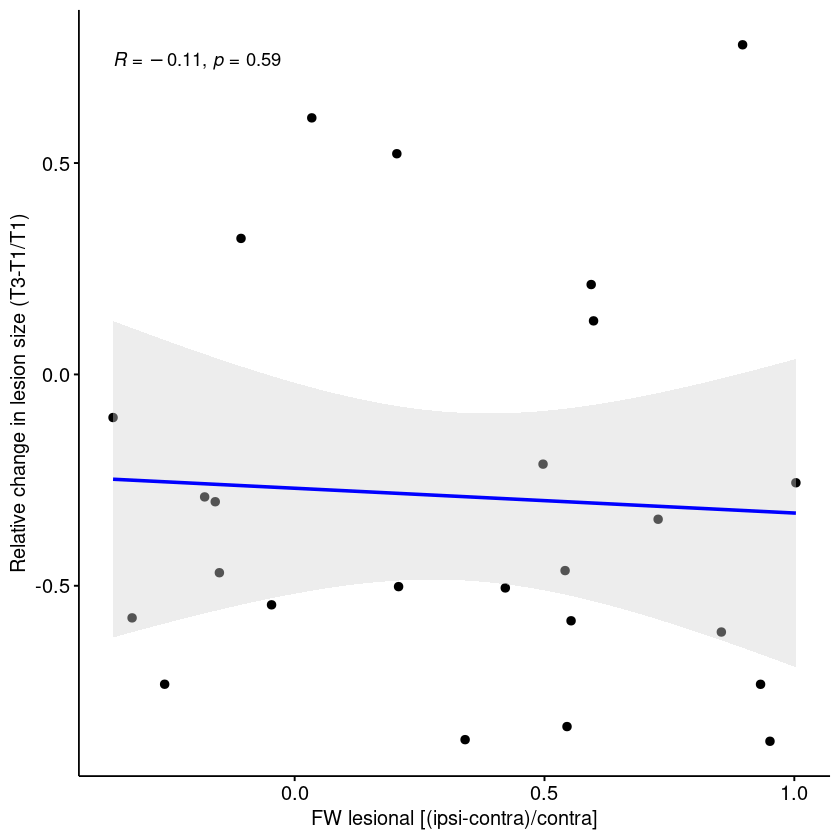

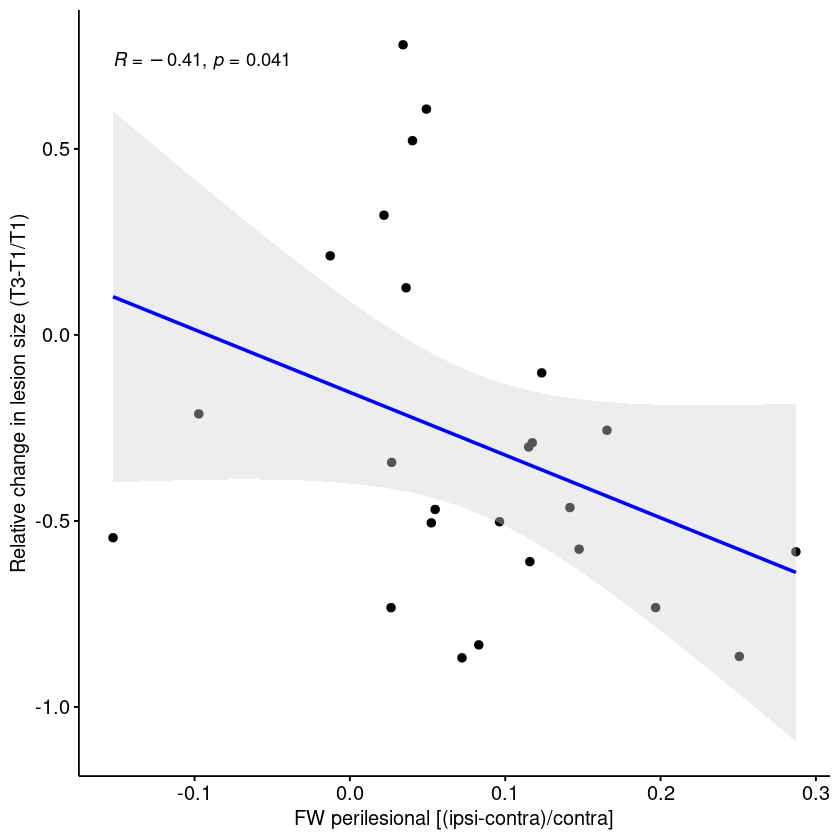

In [70]:
# Create figure
ggscatter(data_lesionsize_complete, x = "mean_delta_fw_lesion", y = "lesion_delta", add = "reg.line", 
    add.params = list(color = "blue", fill = "lightgray"), cor.method = "spearman", cor.coef = TRUE, cor.coef.name = "rho", 
    conf.int = TRUE, ylab = "Relative change in lesion size (T3-T1/T1)", xlab = "FW lesional [(ipsi-contra)/contra]") -> fw_lesion_deltalesion_corr

# Display figure
fw_lesion_deltalesion_corr

# Save figure
ggsave(file.path(plot_dir, "fw_lesion_deltalesion_corr.png"), plot = fw_lesion_deltalesion_corr, dpi = 300, width = 6, height = 5)

# Create figure
ggscatter(data_lesionsize_complete, x = "mean_delta_fw_shells", y = "lesion_delta", add = "reg.line", 
    add.params = list(color = "blue", fill = "lightgray"), cor.method = "spearman", cor.coef = TRUE, cor.coef.name = "rho", 
    conf.int = TRUE, ylab = "Relative change in lesion size (T3-T1/T1)", xlab = "FW perilesional [(ipsi-contra)/contra]") -> fw_shells_deltalesion_corr

# Display figure
fw_shells_deltalesion_corr

# Save figure
ggsave(file.path(plot_dir, "fw_shells_deltalesion_corr.png"), plot = fw_shells_deltalesion_corr, dpi = 300, width = 6, height = 5)

#### Spearman correlation: perilesional and lesional FAt

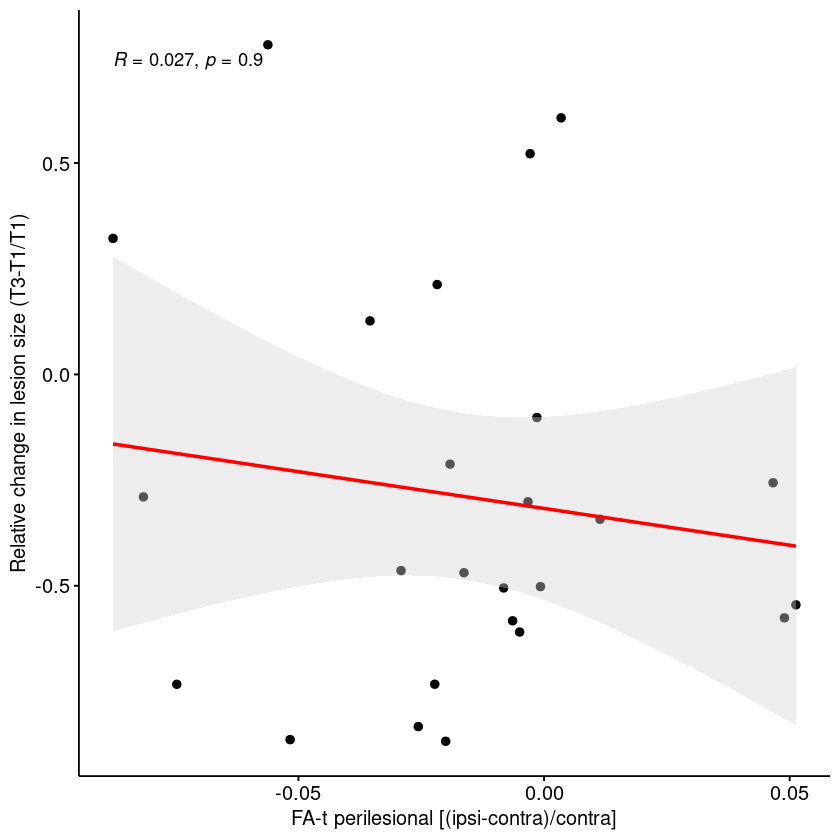

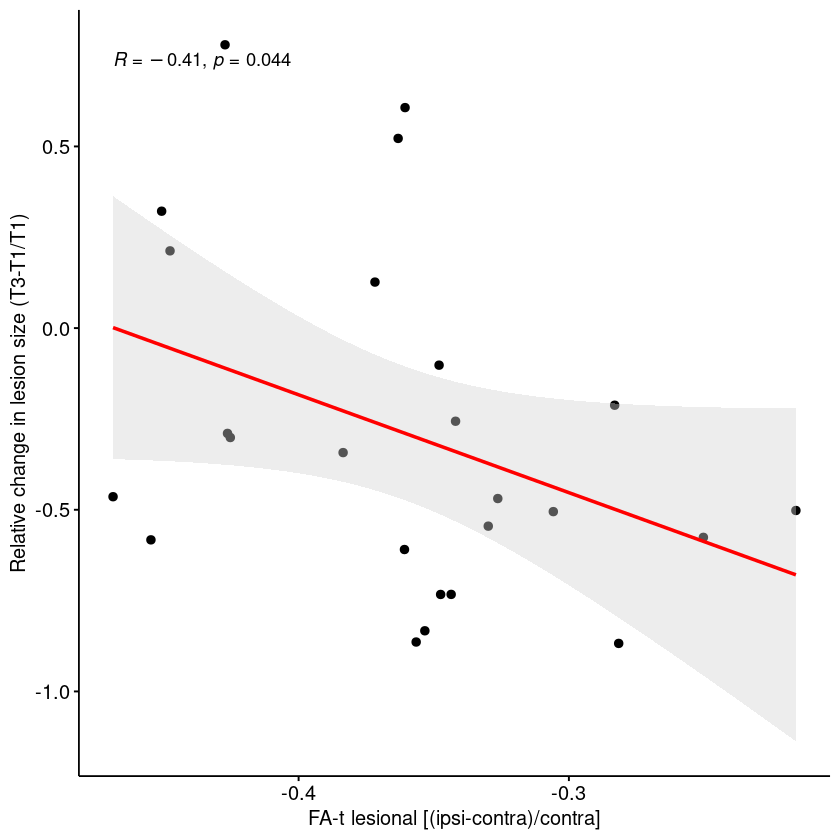

In [71]:
# Create figures
ggscatter(data_lesionsize_complete, x = "mean_delta_fat_shells", y = "lesion_delta", add = "reg.line", 
    add.params = list(color = "red", fill = "lightgray"), cor.method = "spearman", cor.coef = TRUE, cor.coef.name = "rho", 
    conf.int = TRUE, ylab = "Relative change in lesion size (T3-T1/T1)", xlab = "FA-t perilesional [(ipsi-contra)/contra]") -> fat_shells_deltalesion_corr

ggscatter(data_lesionsize_complete, x = "mean_delta_fat_lesion", y = "lesion_delta", add = "reg.line", 
    add.params = list(color = "red", fill = "lightgray"), cor.method = "spearman", cor.coef = TRUE, cor.coef.name = "rho", 
    conf.int = TRUE, ylab = "Relative change in lesion size (T3-T1/T1)", xlab = "FA-t lesional [(ipsi-contra)/contra]") -> fat_lesion_deltalesion_corr

# Display figures
fat_shells_deltalesion_corr
fat_lesion_deltalesion_corr

# Save figures
ggsave(file.path(plot_dir, "fat_shells_deltalesion_corr.png"), plot = fat_shells_deltalesion_corr, dpi = 300, width = 6, height = 5)
ggsave(file.path(plot_dir, "fat_lesion_deltalesion_corr.png"), plot = fat_lesion_deltalesion_corr, dpi = 300, width = 6, height = 5)


### NIHSS at time point 3

#### Lesional and perilesional free-water

Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


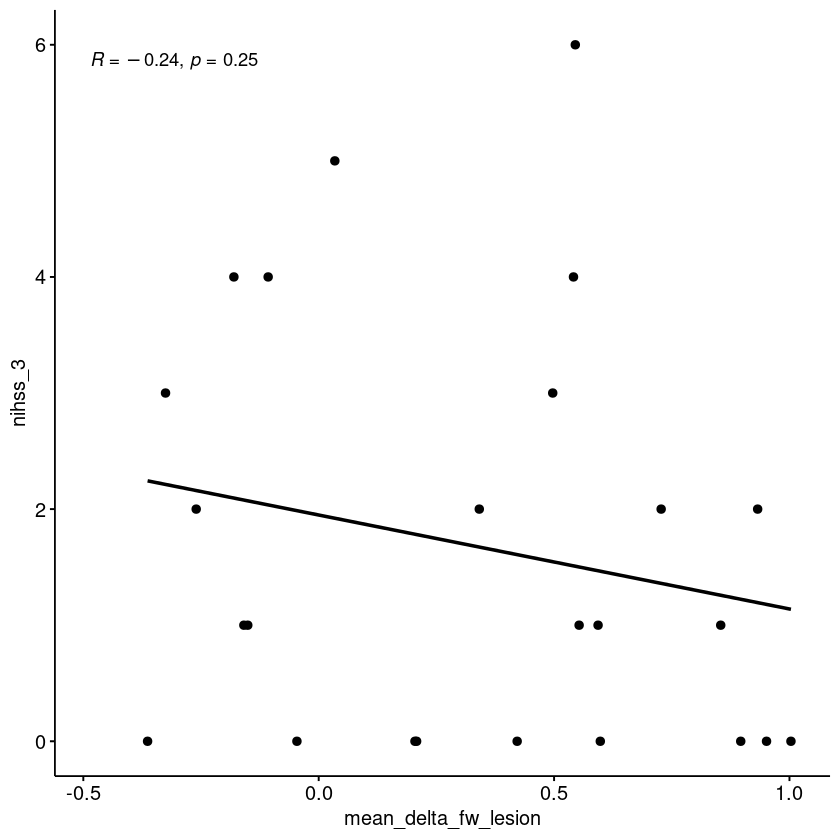

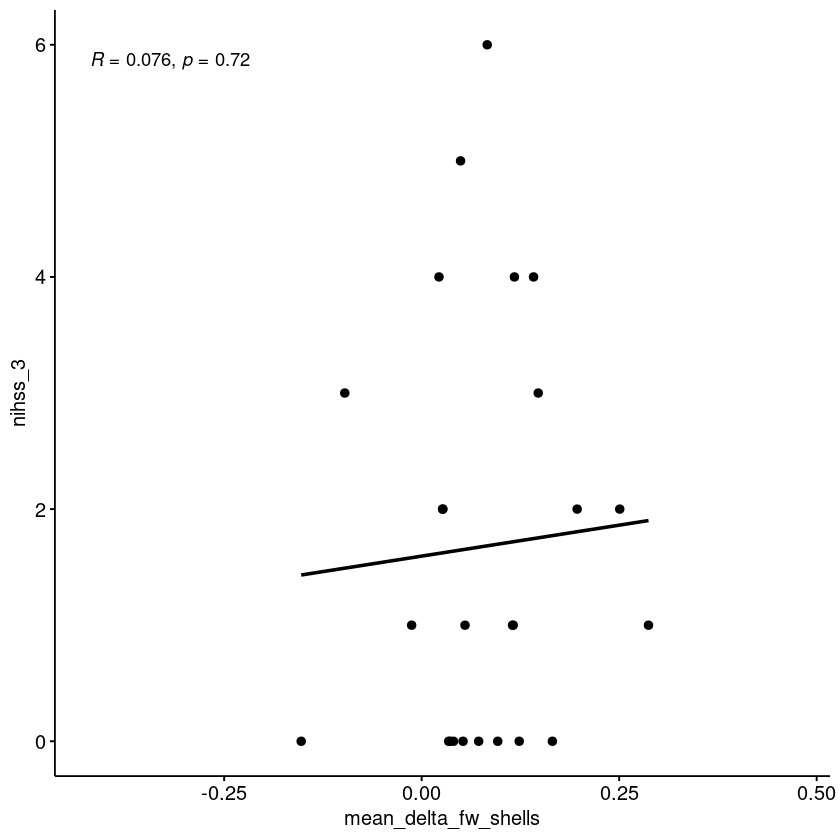

In [72]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "nihss_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "nihss_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Lesional and perilesional FAt

Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


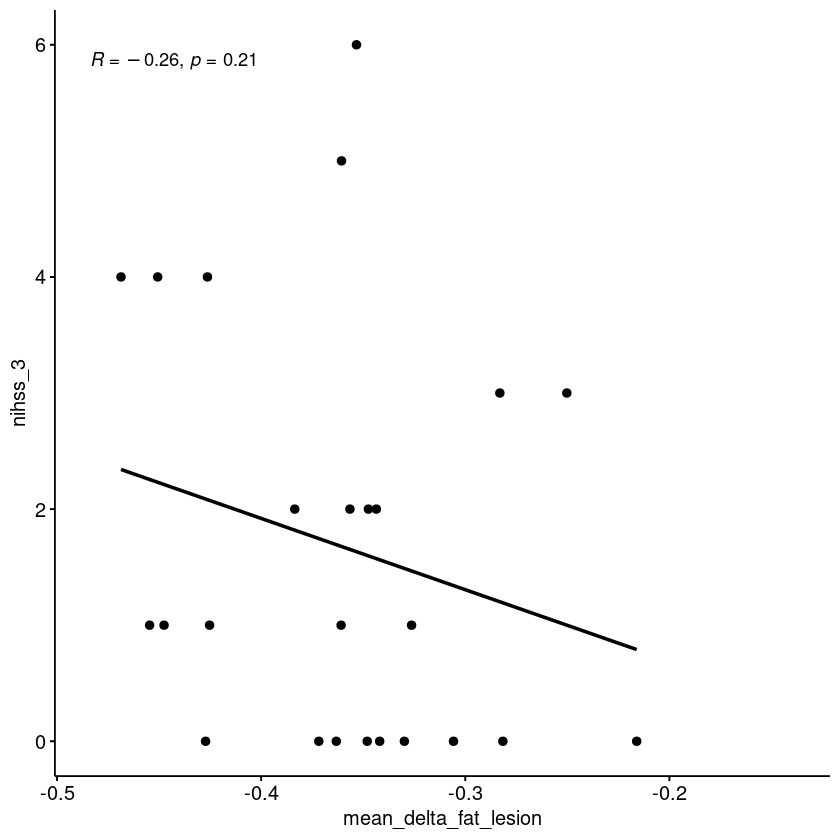

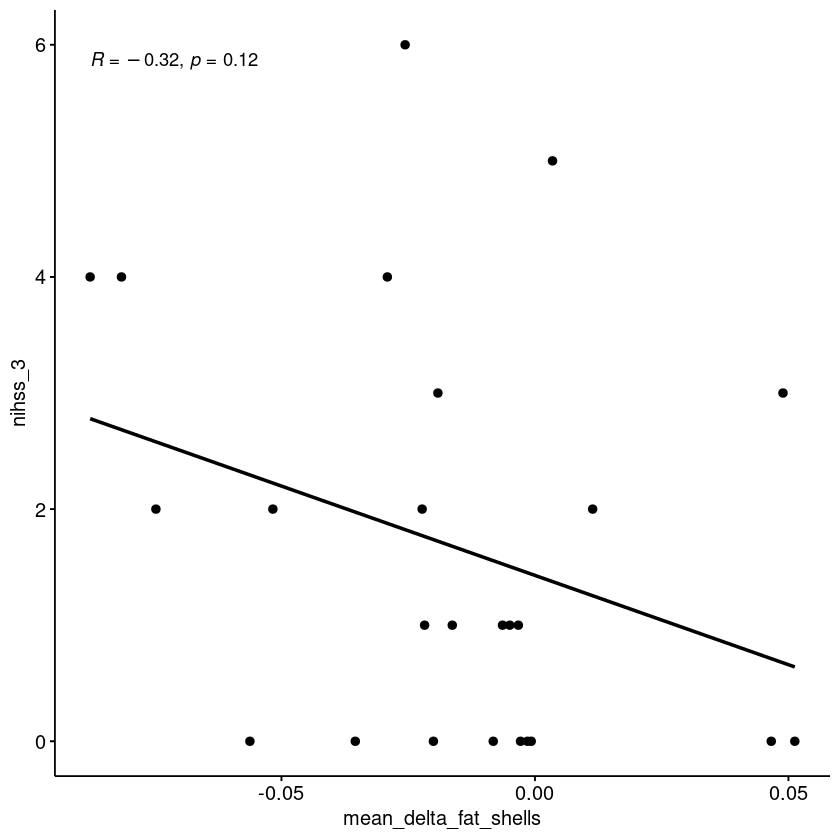

In [73]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "nihss_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "nihss_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### Gripstrength at time point 3

##### Lesional and perilesional free-water

Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


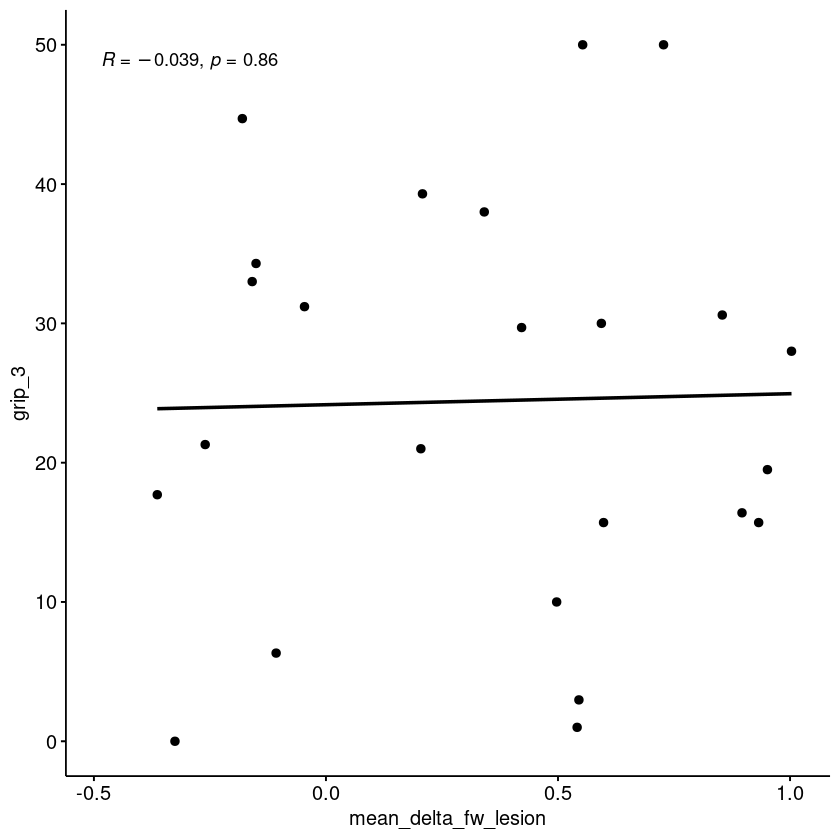

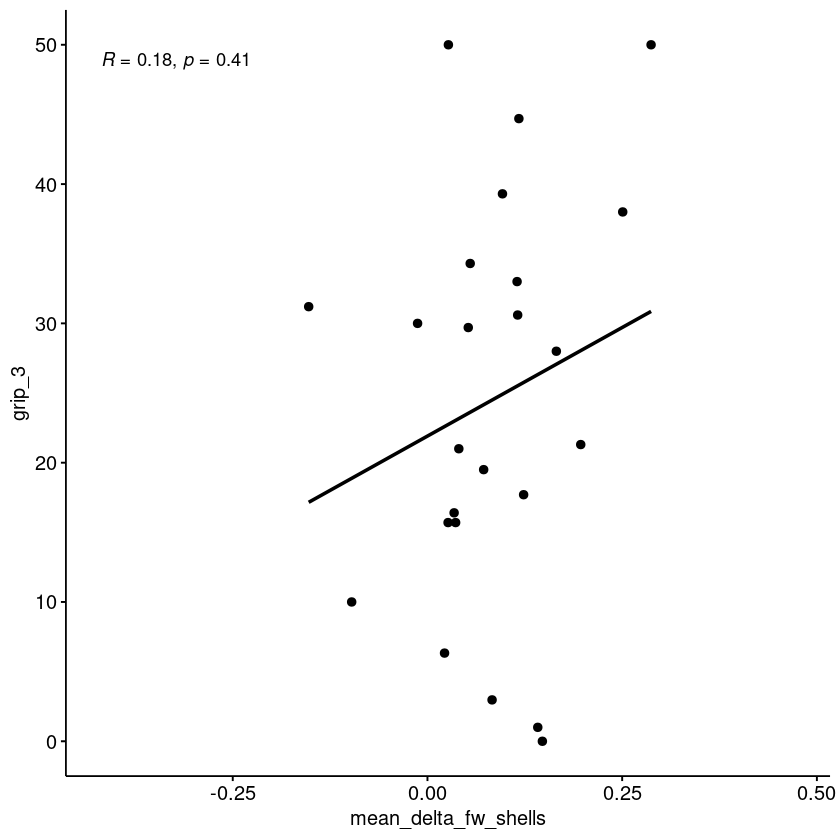

In [74]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "grip_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "grip_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Lesional and perilesional FAt

Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


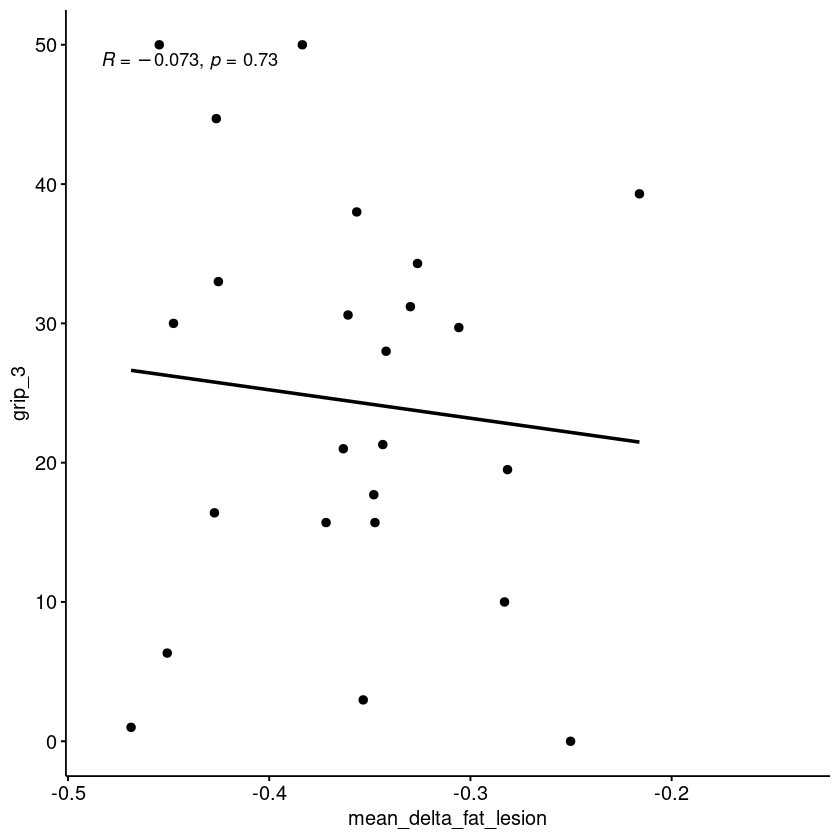

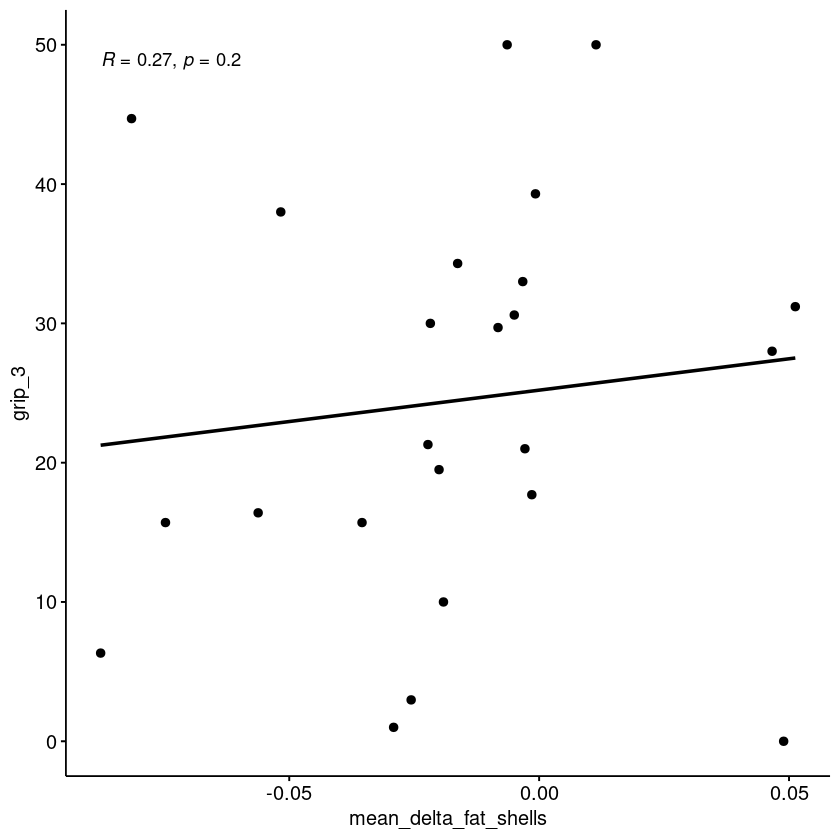

In [75]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "grip_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "grip_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### Relative gripstrength at time point 3

#### Lesional and perilesional free-water

Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


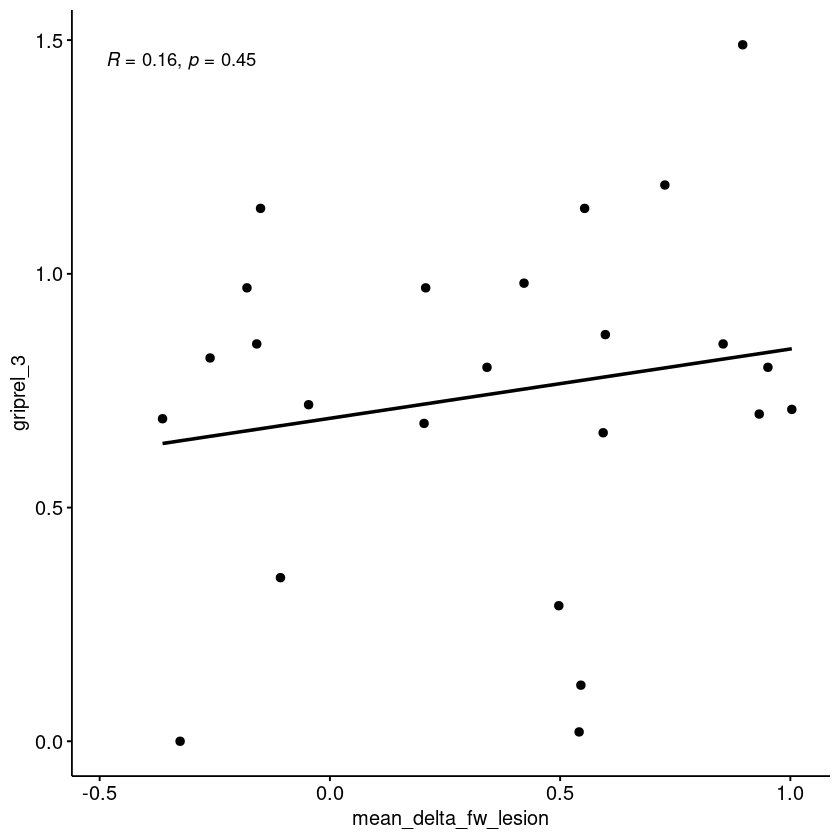

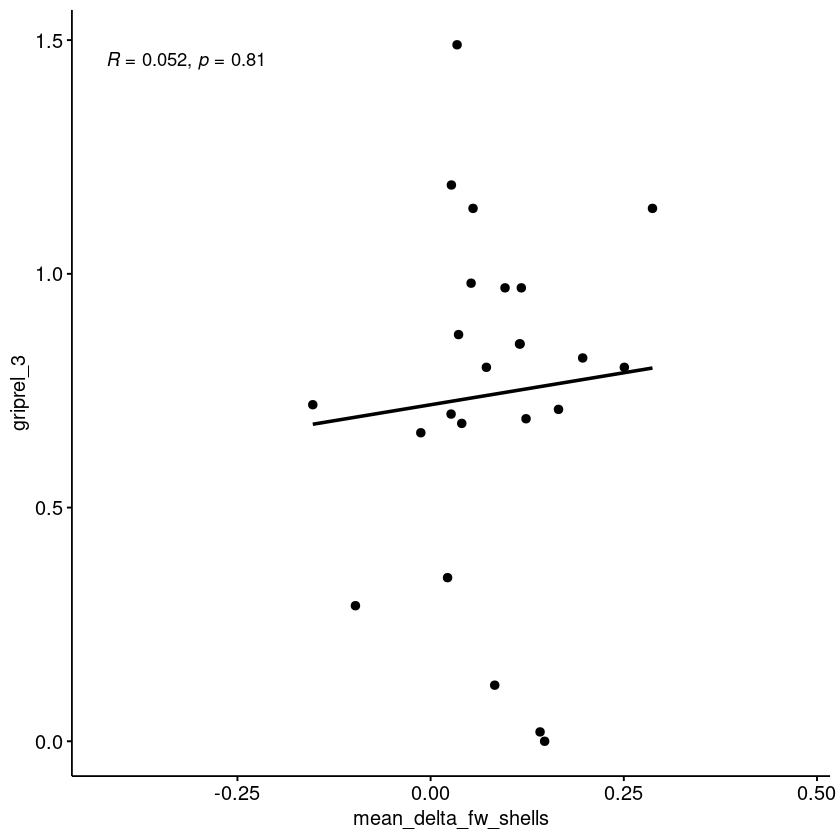

In [76]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "griprel_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "griprel_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Lesional and perilesional FAt

Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


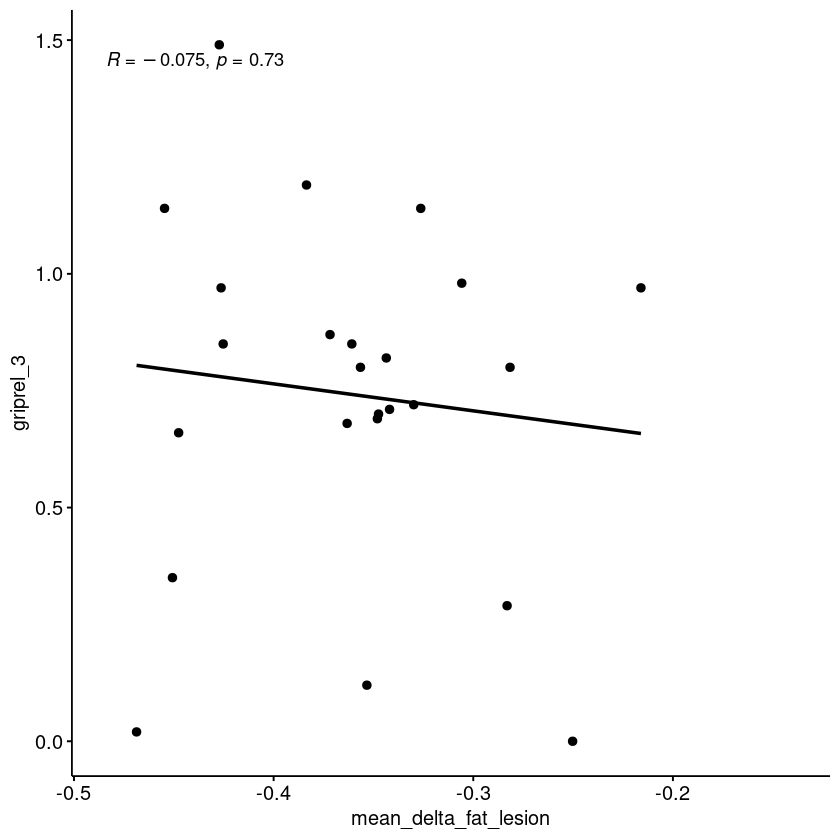

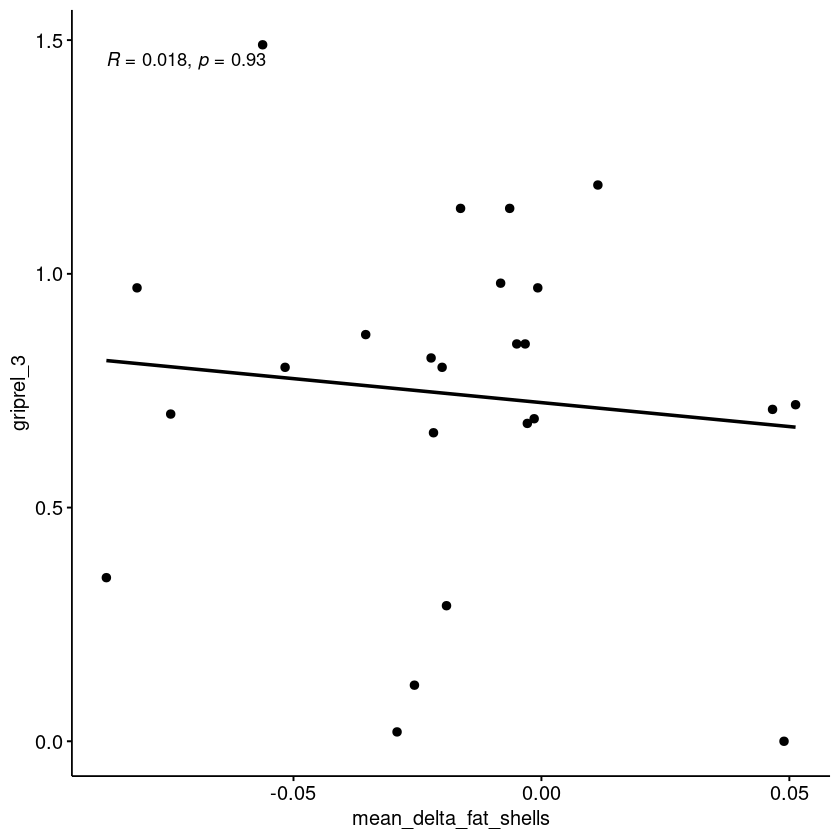

In [77]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "griprel_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "griprel_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### Fugl Meyer at time point 3

#### Lesional and perilesional free-water

Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


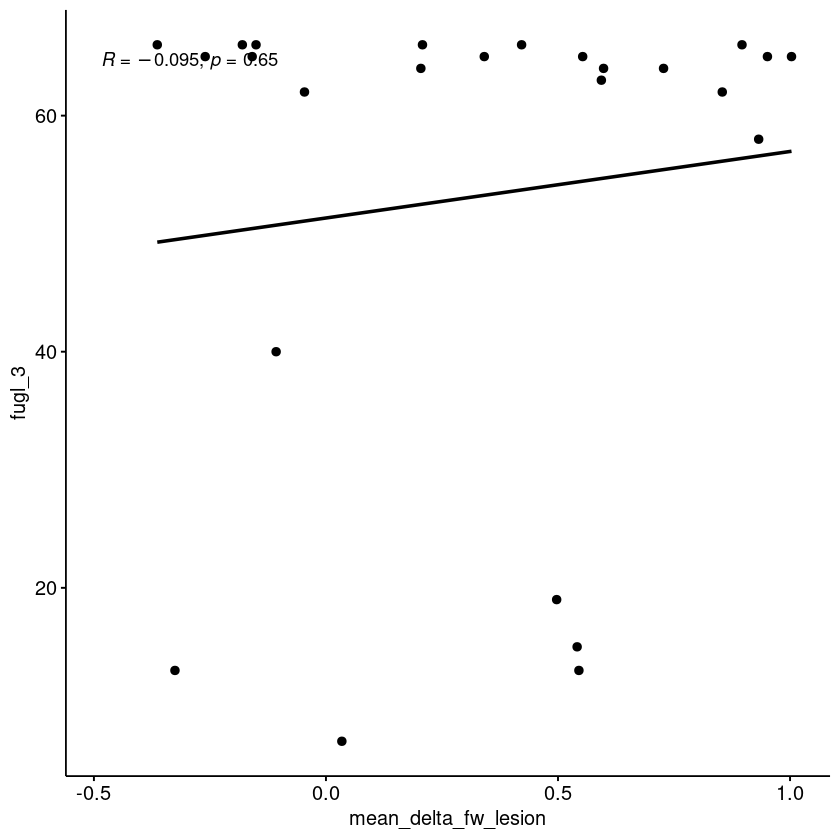

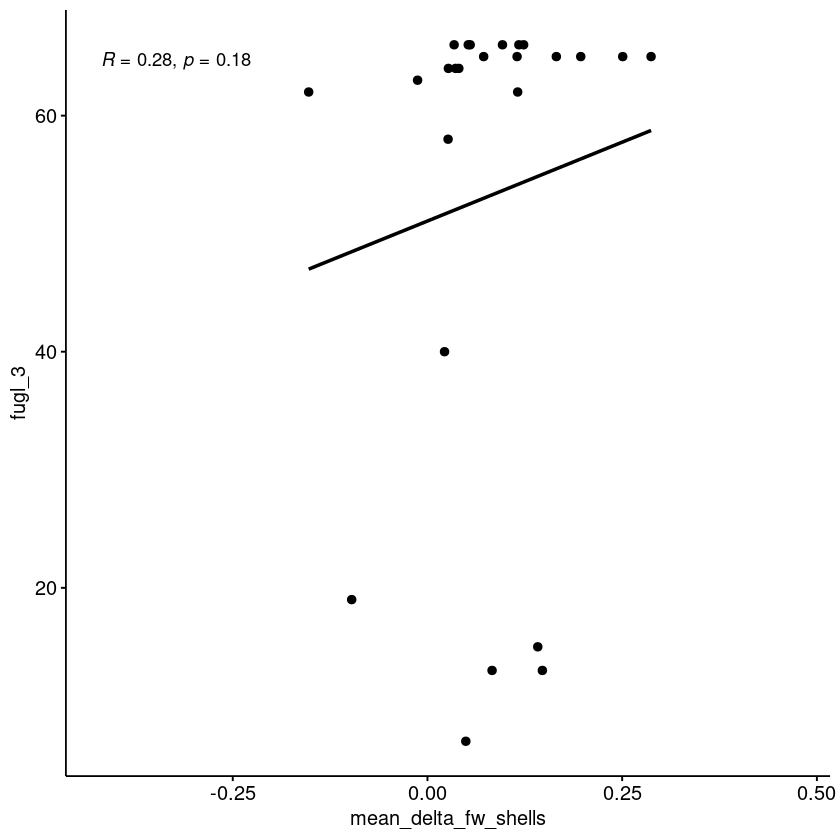

In [78]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "fugl_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "fugl_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Lesional and perilesional FAt

Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


Warning message:
“Removed 12 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


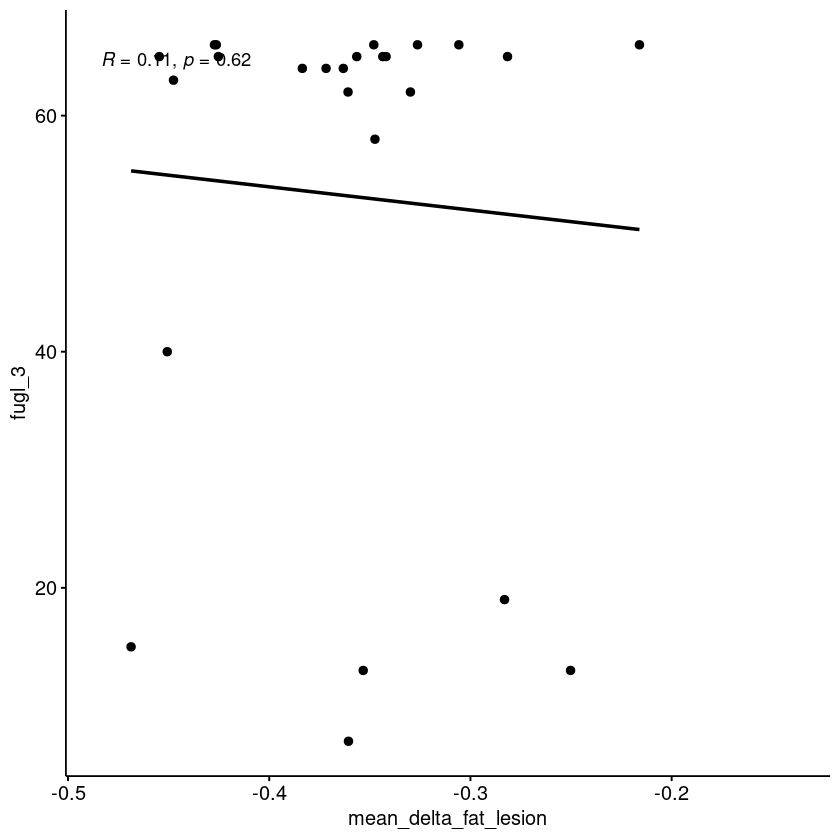

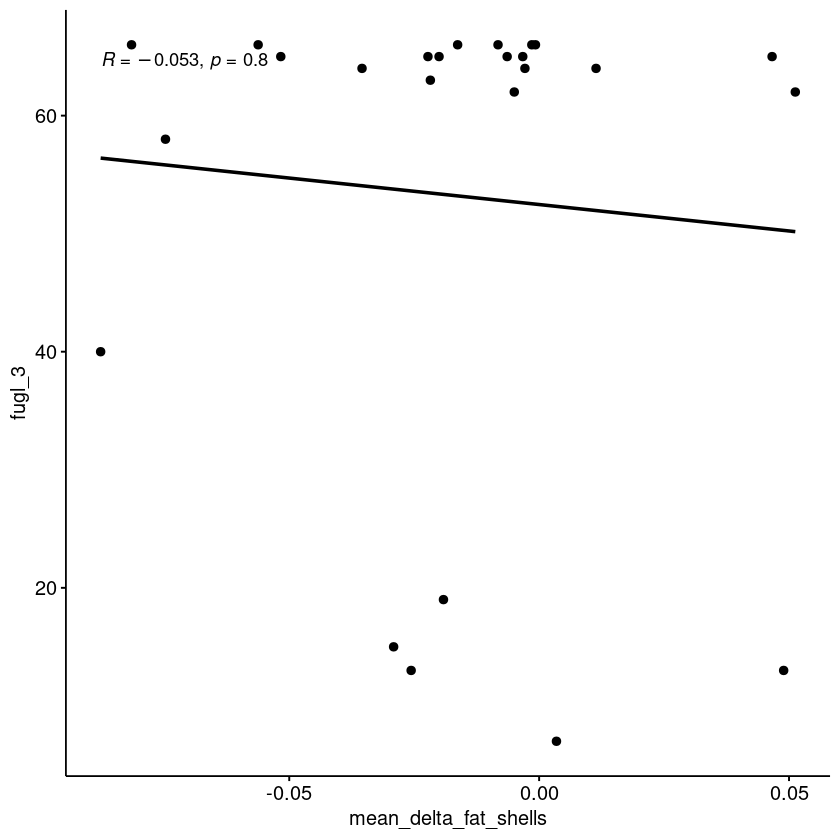

In [79]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "fugl_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "fugl_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### NHP at time point 3

#### Lesional and perilesional free-water

Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


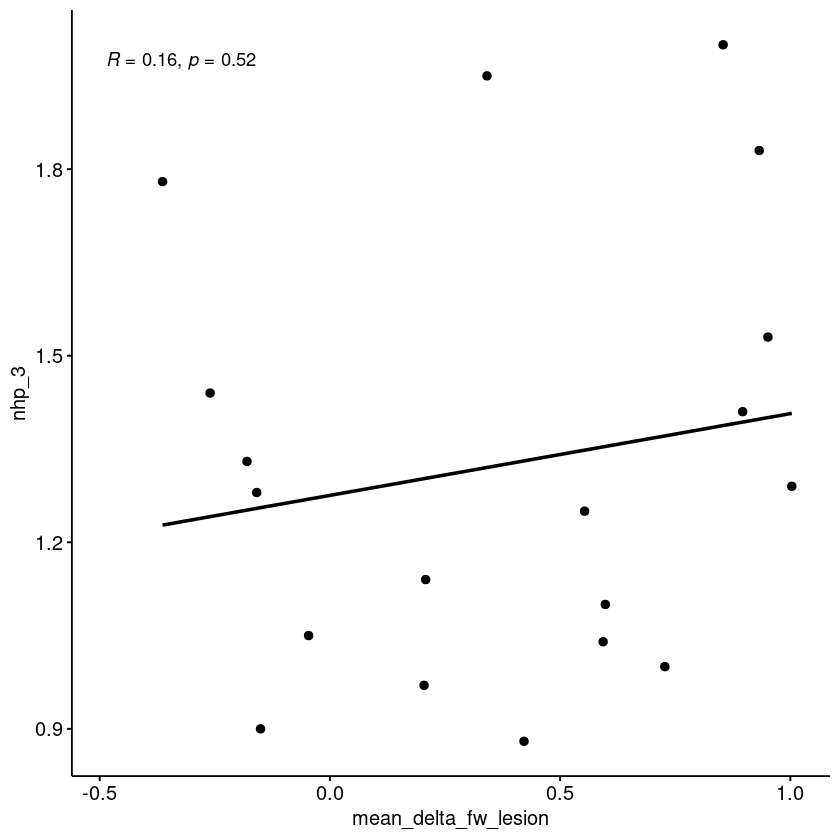

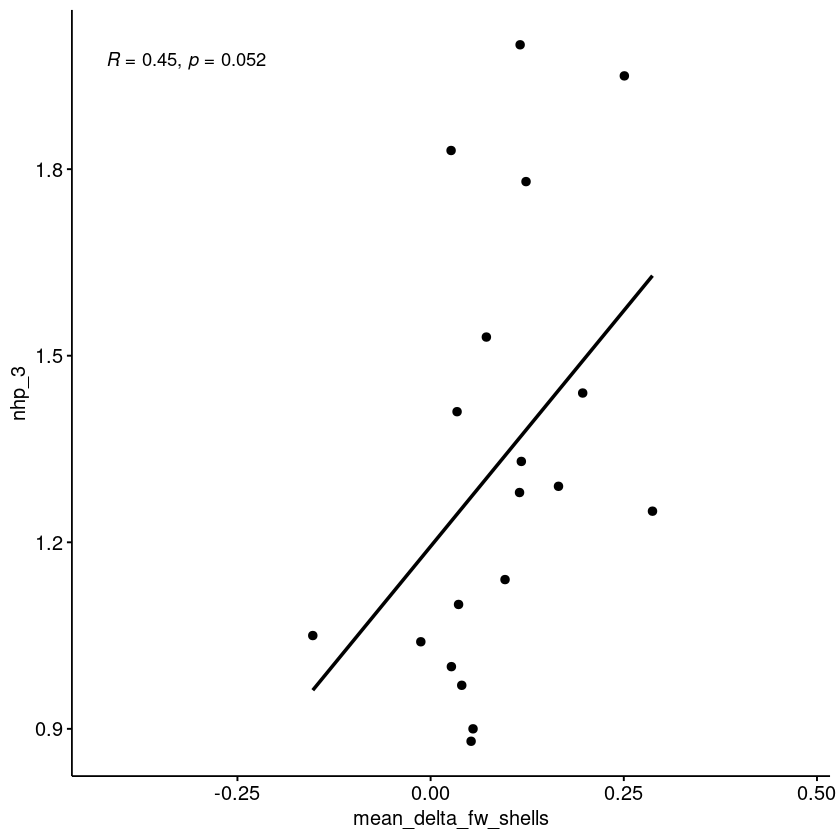

In [80]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "nhp_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "nhp_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Lesional and perilesional FAt

Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


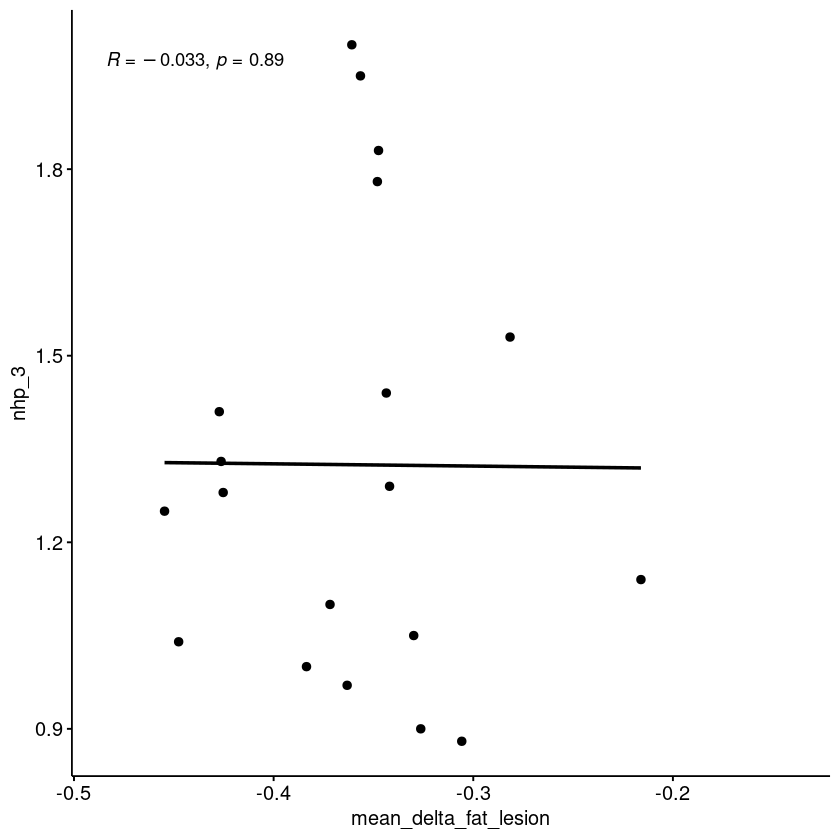

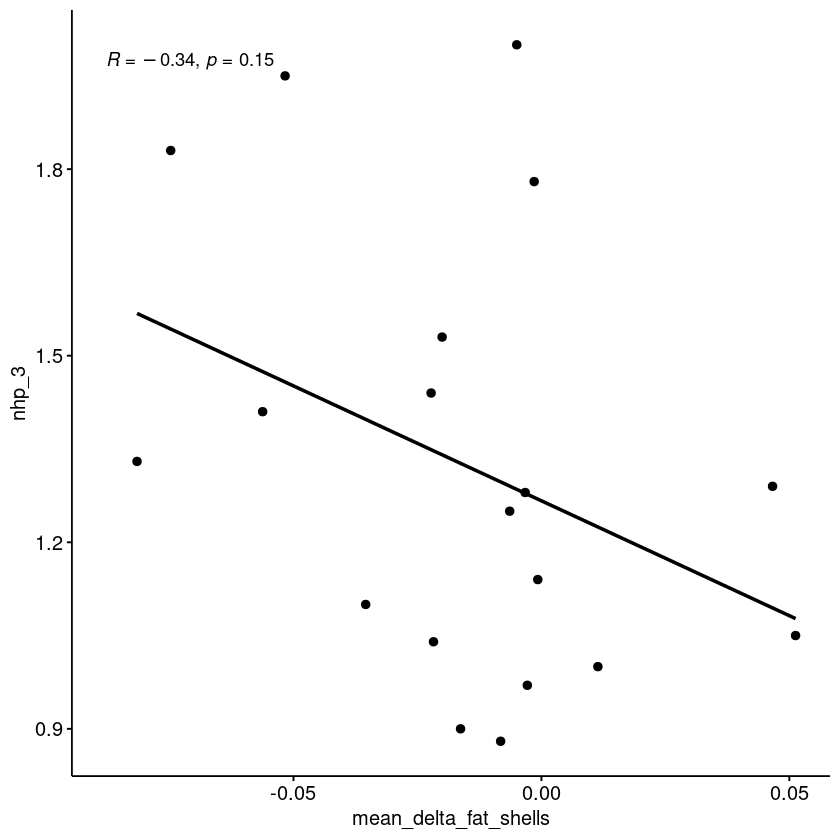

In [81]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "nhp_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "nhp_3", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

## Linear models with clinical variables at 3-5 days as outcome

In [82]:
# grip_3 <- df_patients_supratentorial_ses3es3es3[df_patients_supratentorial_ses3es3es3es3$location == "lesion", c("sub_id", "gripstrength_affected_hand_kg")]
# grip_3 %>% drop_na(c("sub_id","gripstrength_affected_hand_kg")) %>% rename(grip_3 = gripstrength_affected_hand_kg) -> grip_3

# griprel_3 <- df_patients_supratentorial_ses3es3es3edf_patients_supratentorial_ses3es3es3es3es3$location == "lesion", c("sub_id", "gripstrength_affected_nonaffected")]
# griprel_3 %>% drop_na(c("sub_id","gripstrength_affected_nonaffected")) %>% rename(griprel_3 = gripstrength_affected_nonaffected) -> griprel_3

# fugl_3 <- df_patients_supratentorial_ses3es3es3[df_patients_supratentorial_ses3es3es3es3$location == "lesion", c("sub_id", "fugl_meyer")]
# fugl_3 %>% drop_na(c("sub_id","fugl_meyer")) %>% rename(fugl_3 = fugl_meyer) -> fugl_3

# nhp_3 <- df_patients_supratentorial_ses3es3es3edf_patients_supratentorial_ses3es3es3es3es3$location == "lesion", c("sub_id", "nhp_affected_nonaffected")]
# nhp_3 %>% drop_na(c("sub_id","nhp_affected_nonaffected")) %>% rename(nhp_3 = nhp_affected_nonaffected) -> nhp_3

### Lesion volume at 3-5 days

#### Correlations: Lesional and perilesional free-water 

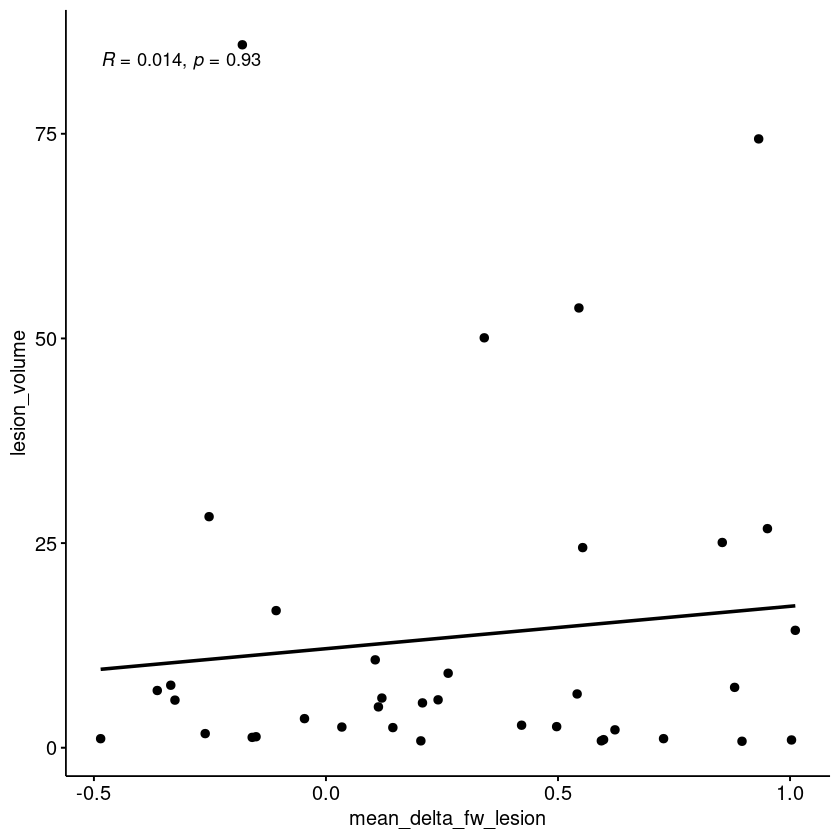

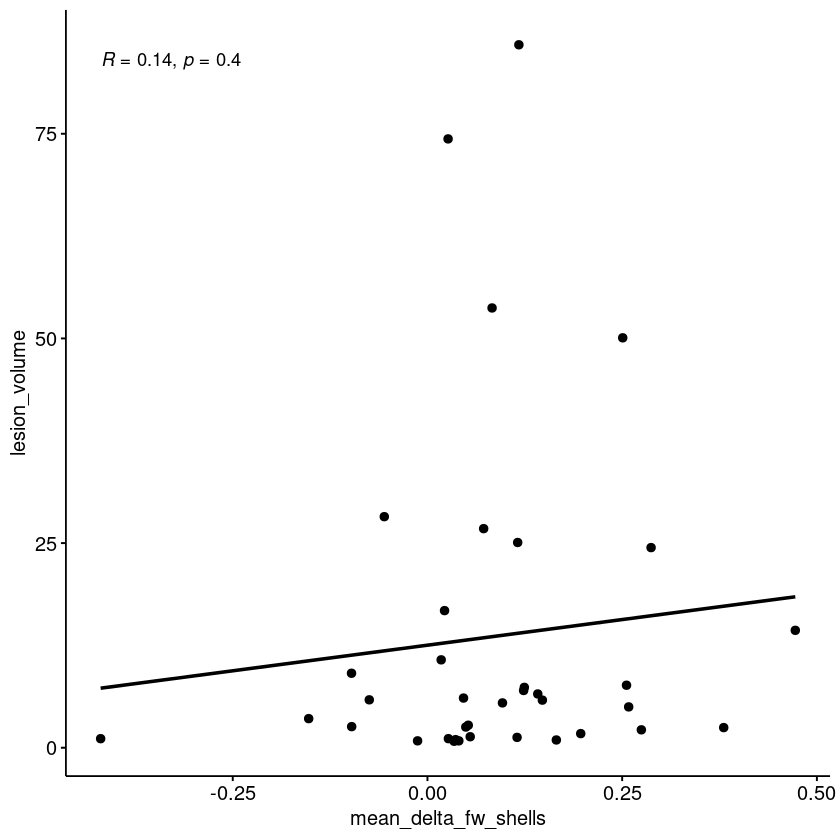

In [83]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "lesion_volume", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "lesion_volume", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: lesional and perilesional FAt

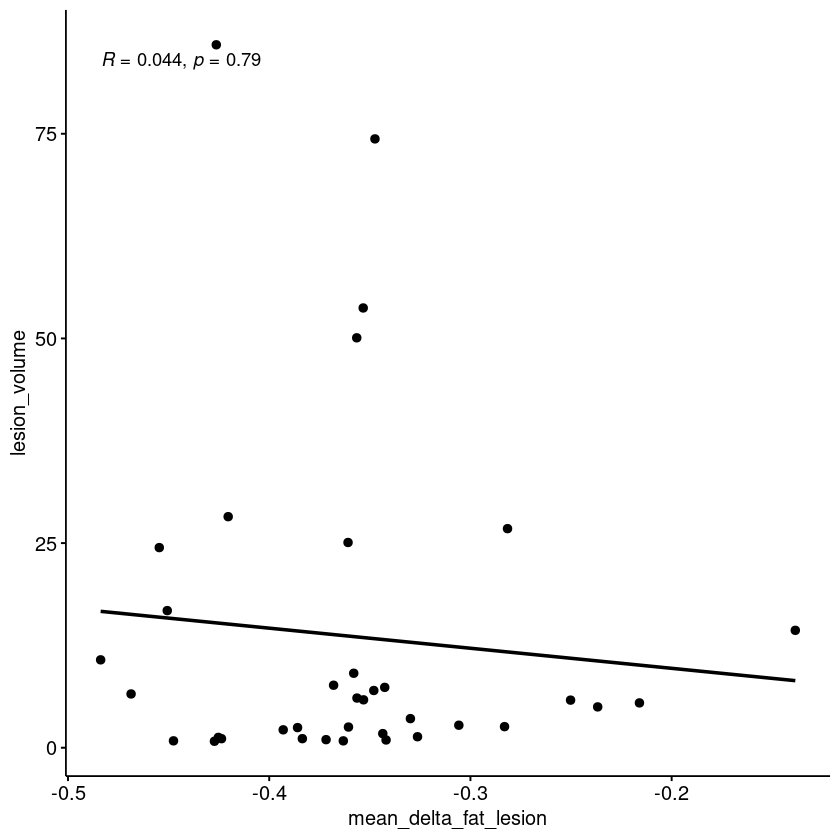

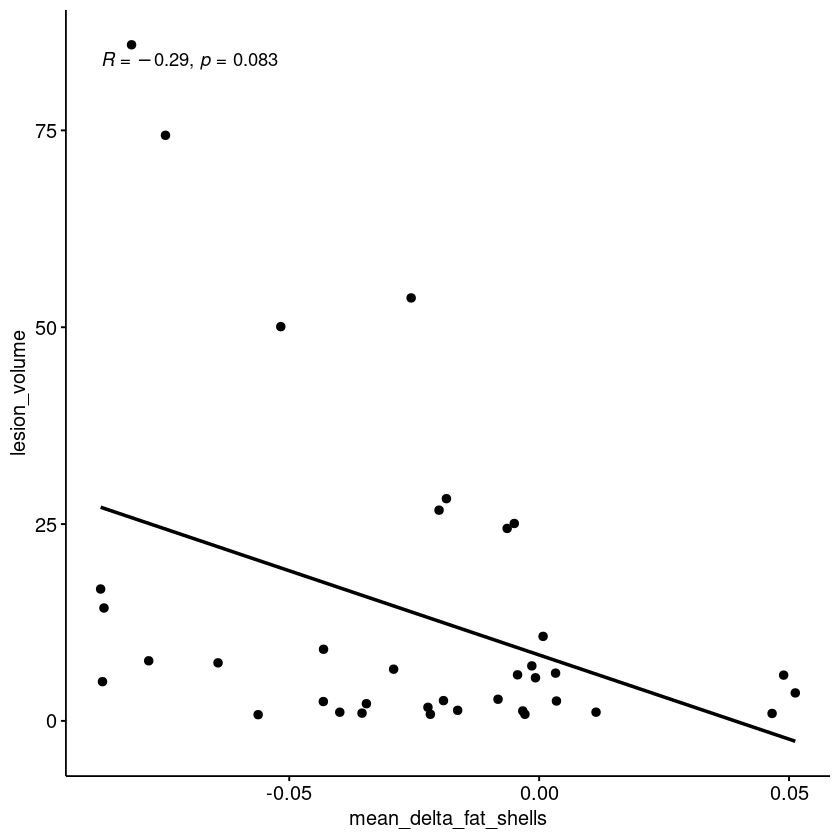

In [84]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "lesion_volume", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "lesion_volume", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### Fugl Meyer at 3-5 days

#### Correlations: lesional and perilesional free-water

Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


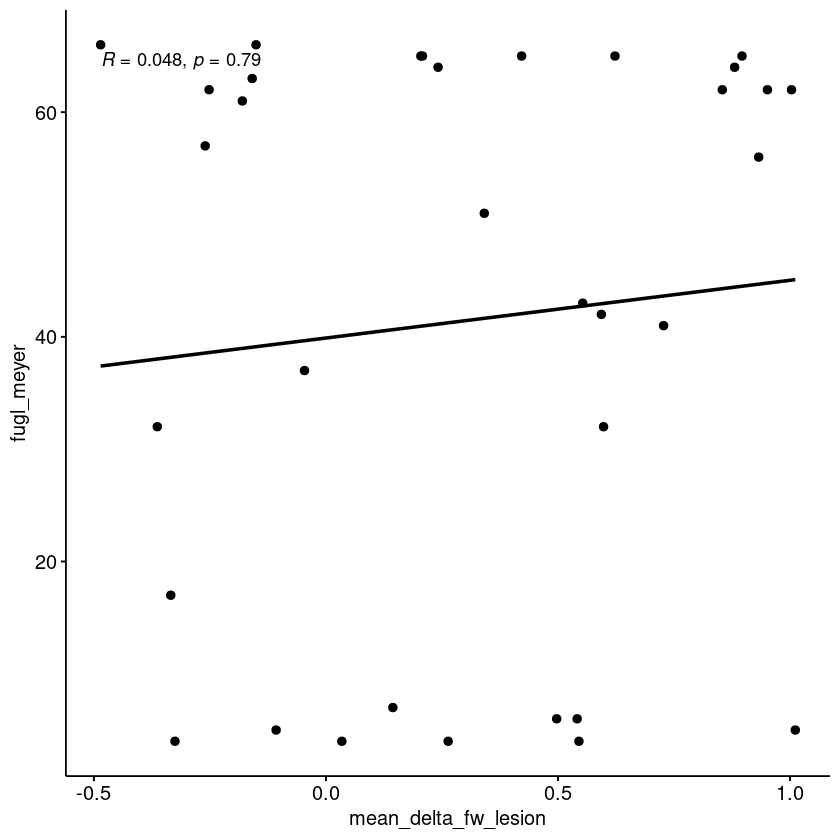

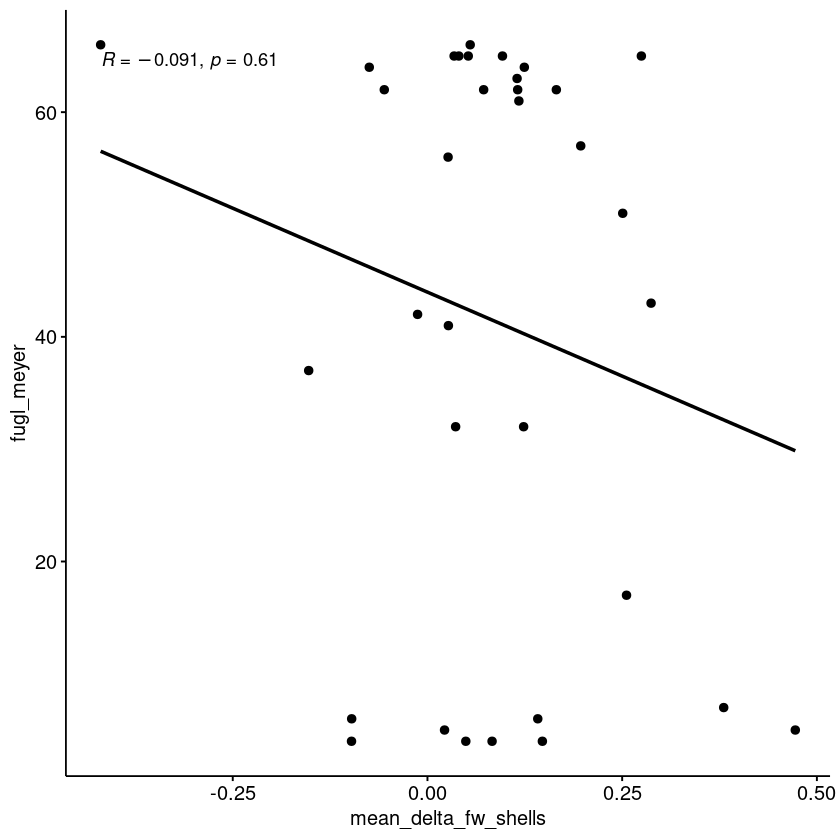

In [85]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "fugl_meyer", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "fugl_meyer", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: lesional and perilesional FAt

Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


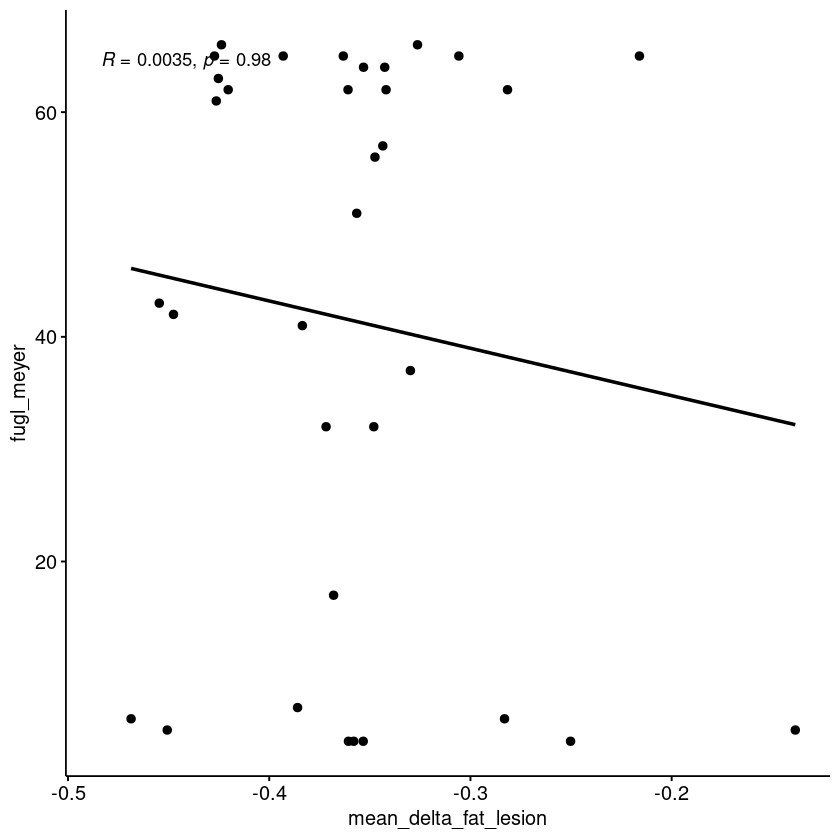

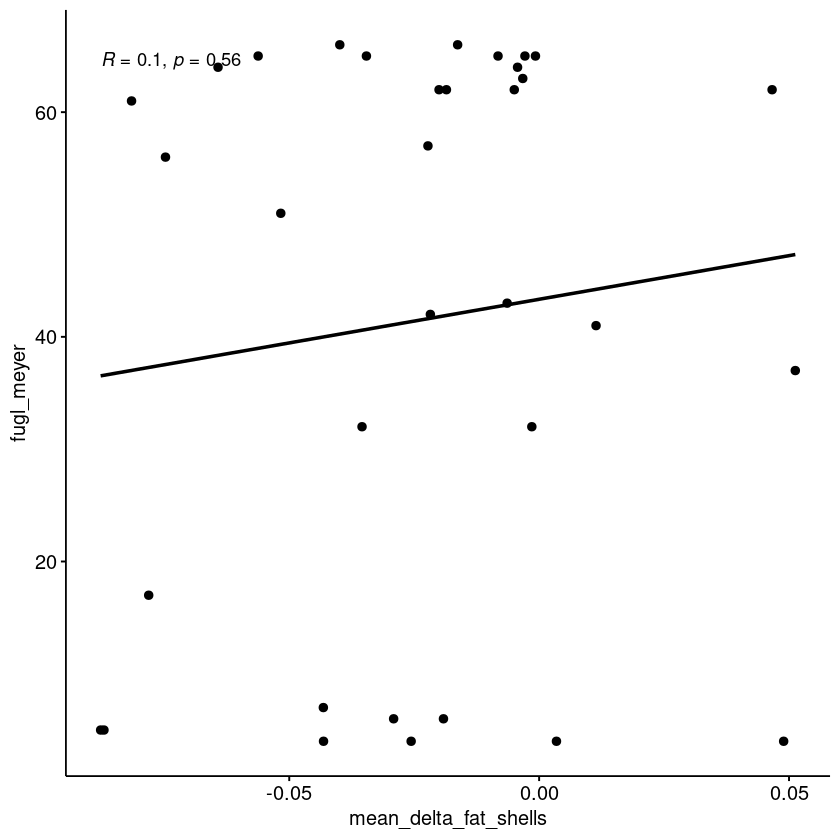

In [86]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "fugl_meyer", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "fugl_meyer", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### Relative grip strength at 3-5 days

#### Correlations: lesional and perilesional free-water

Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


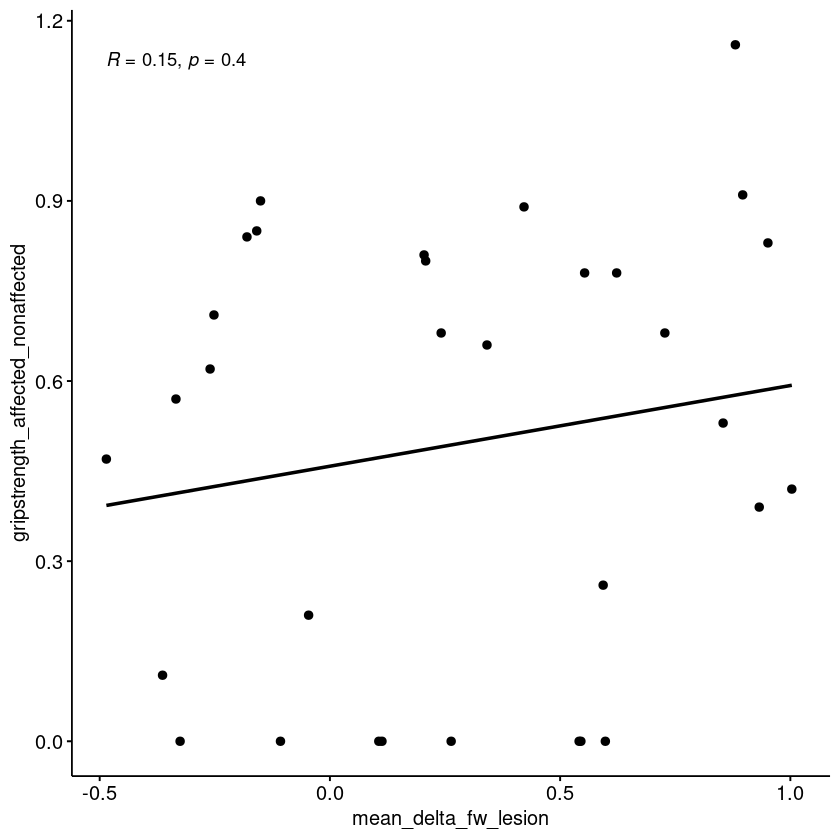

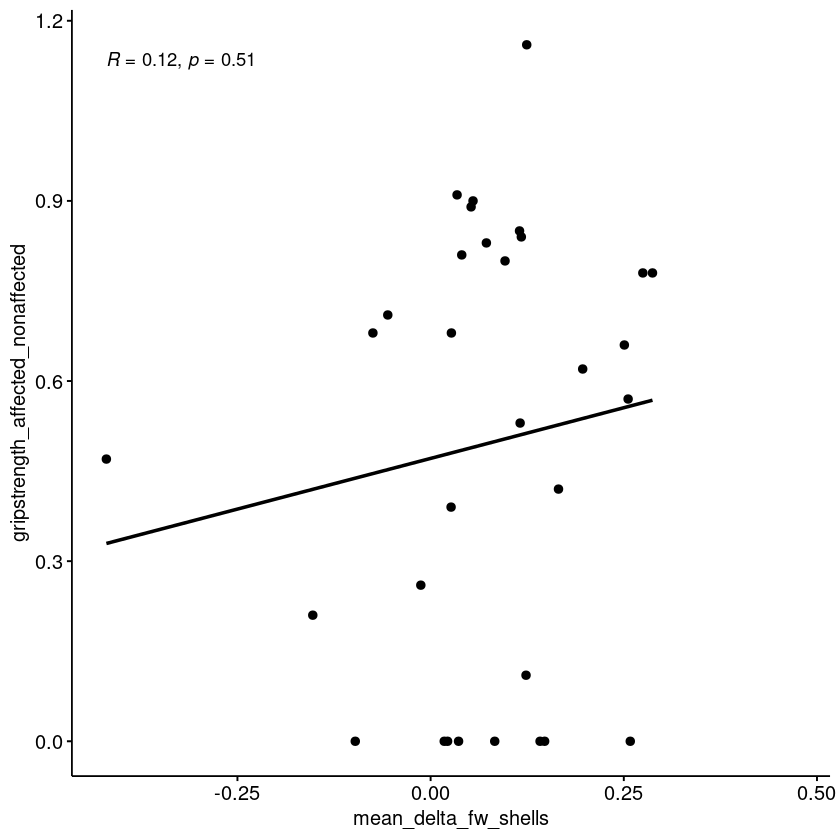

In [87]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "gripstrength_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "gripstrength_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: lesional and perilesional FA-t

Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 5 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


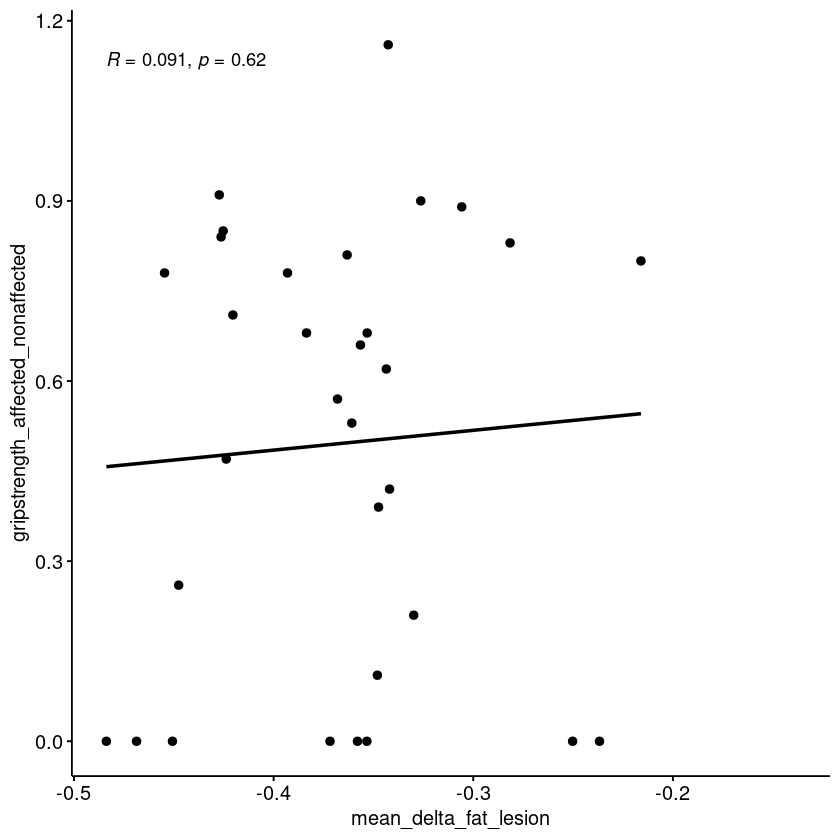

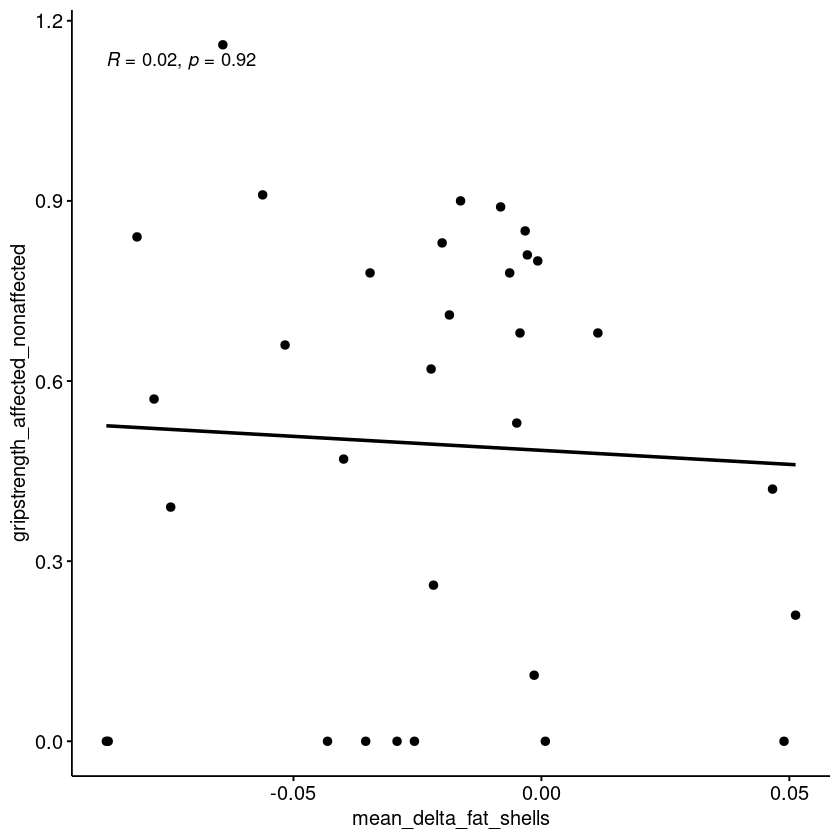

In [88]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "gripstrength_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "gripstrength_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### Grip strength at 3-5 days

#### Correlations: lesional and perilesional free-water

Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


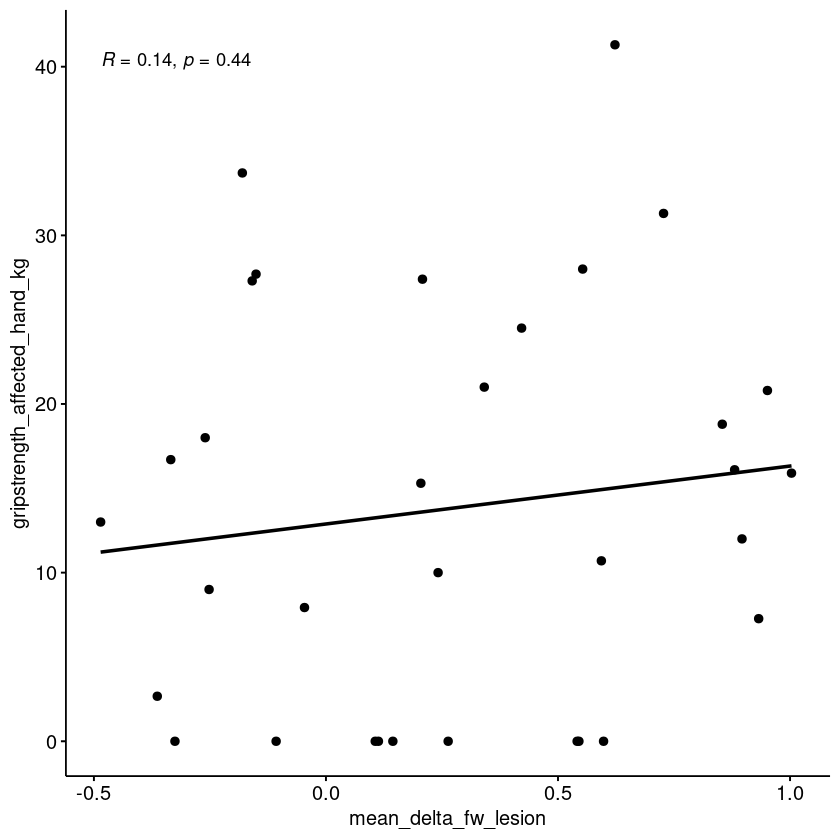

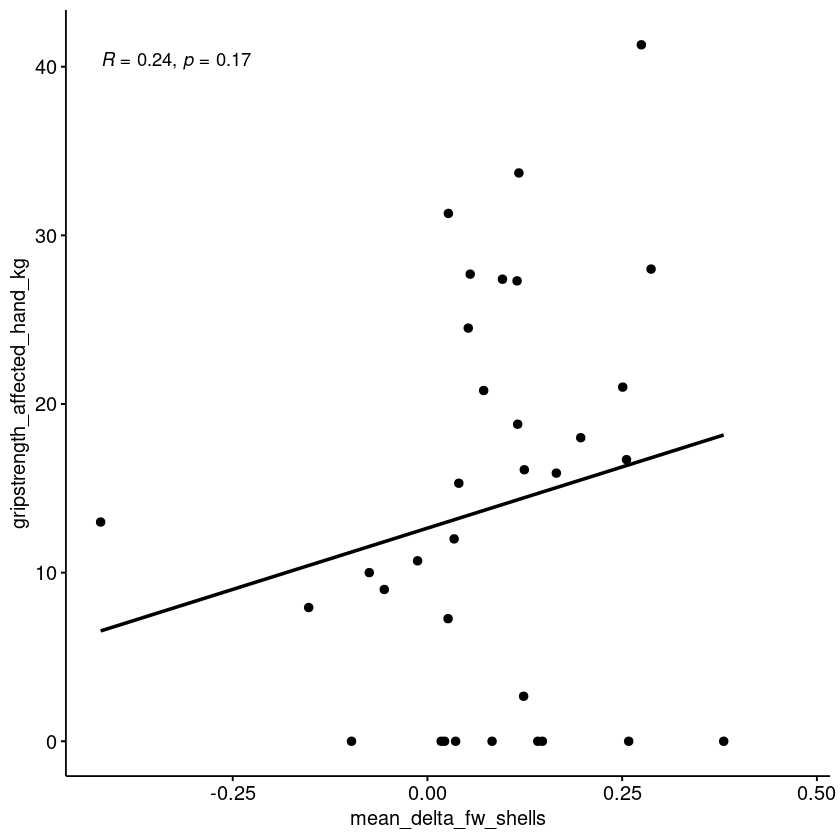

In [89]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "gripstrength_affected_hand_kg", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "gripstrength_affected_hand_kg", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: lesional and perilesional FAt

Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


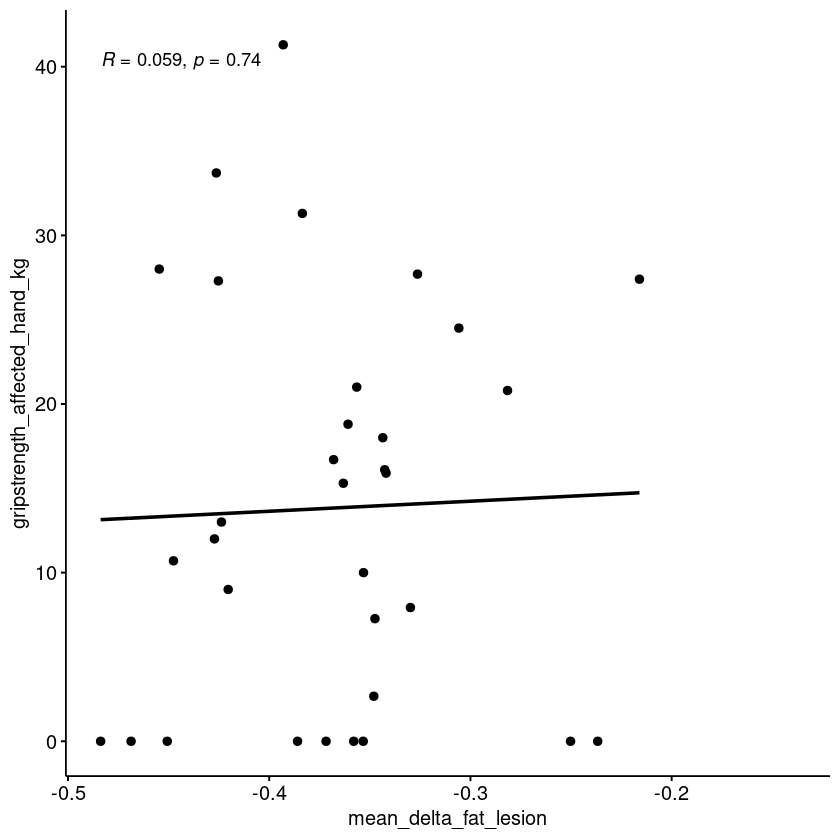

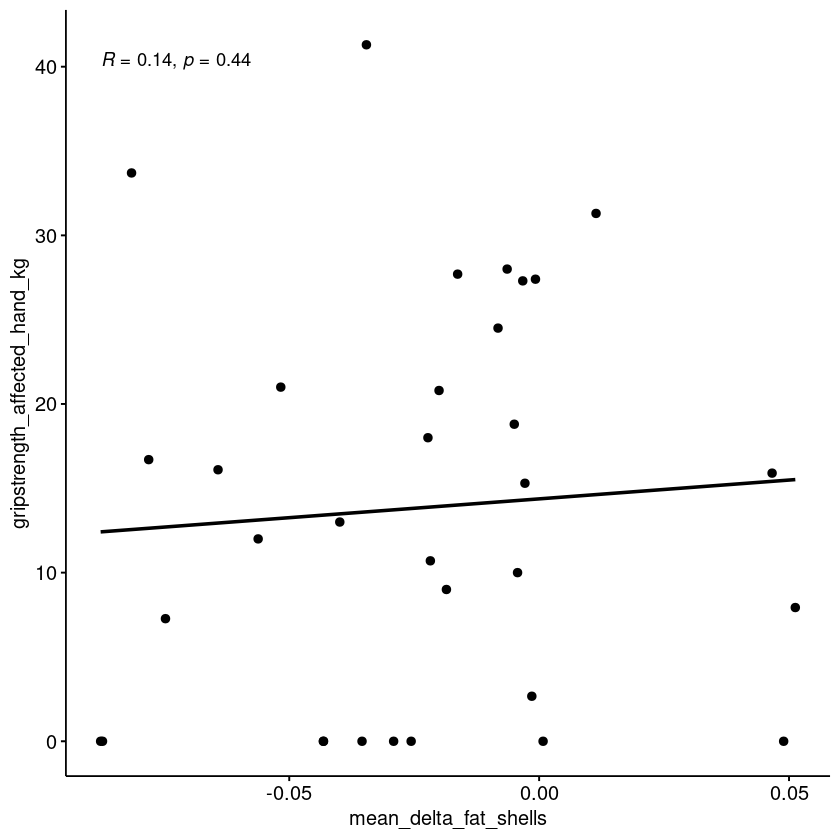

In [90]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "gripstrength_affected_hand_kg", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "gripstrength_affected_hand_kg", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### NIHSS at 3-5 days

#### Correlations: lesional and perilesional free-water

Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


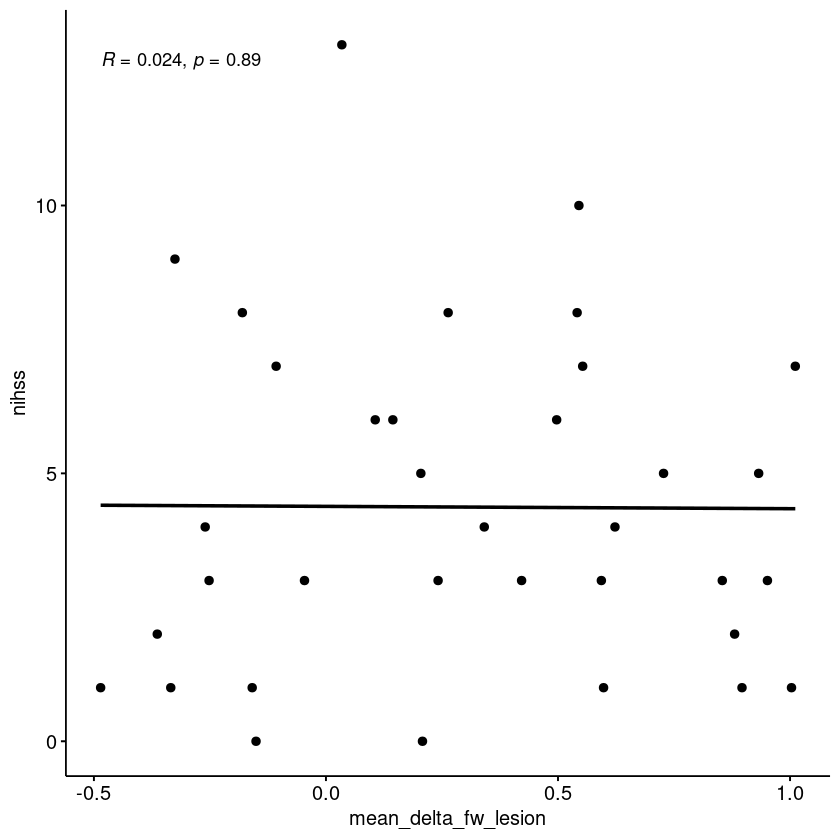

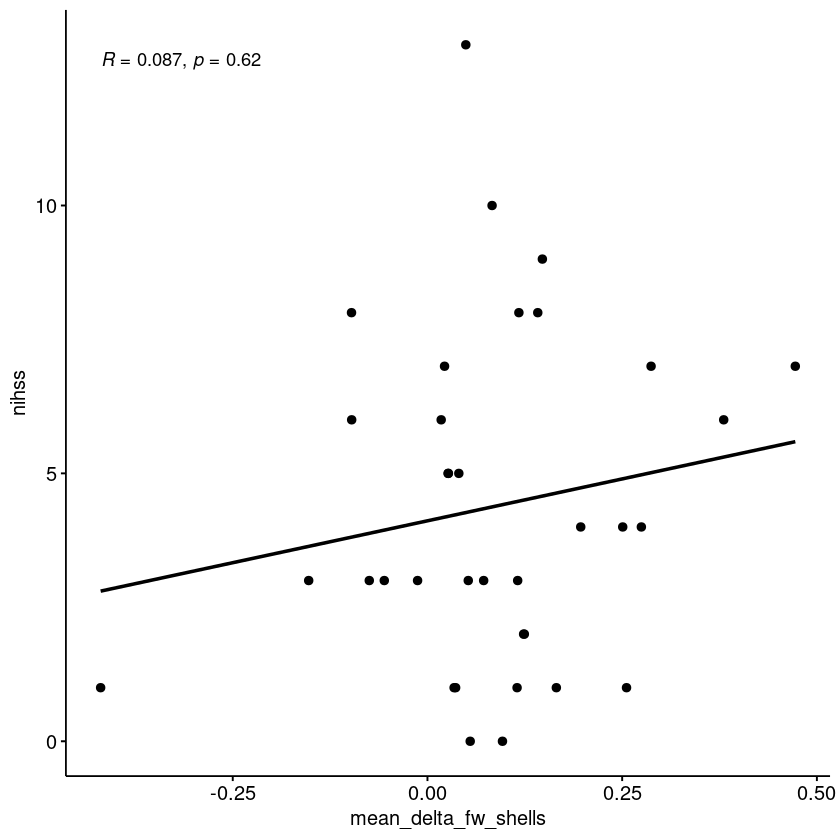

In [91]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "nihss", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "nihss", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: lesional and perilesional FAt

Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


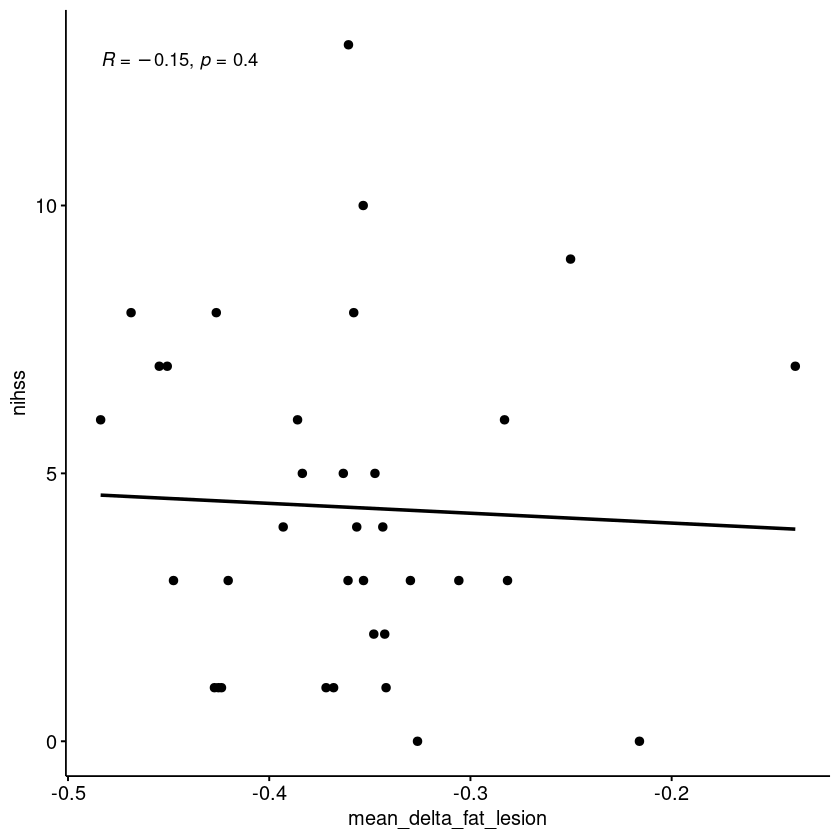

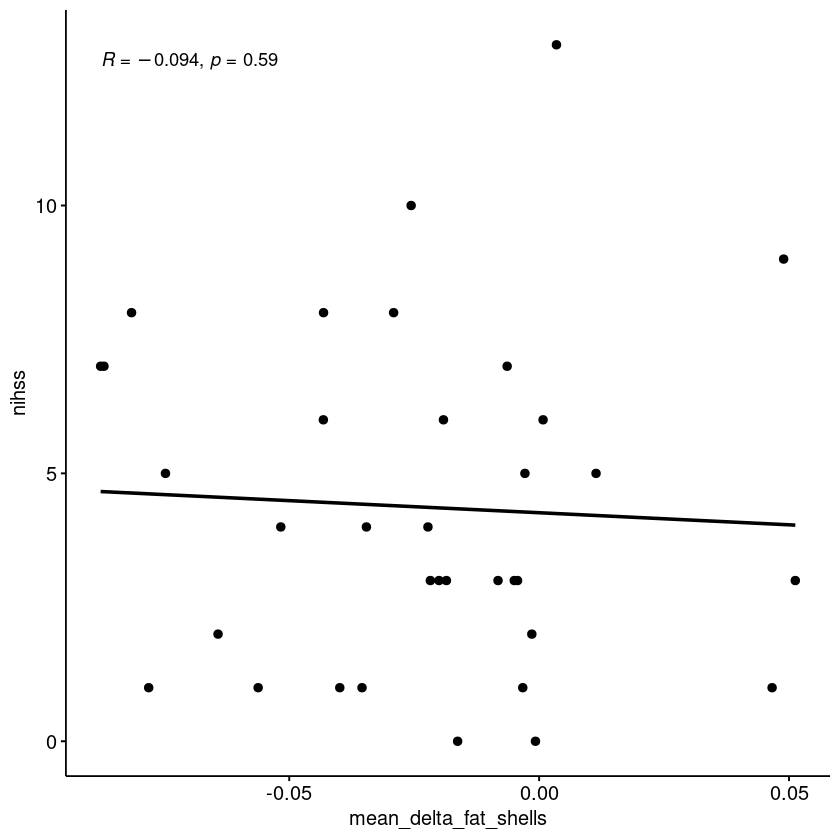

In [92]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "nihss", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "nihss", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

### NHP at 3-5 days

#### Correlations: lesional and perilesional free-water

Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


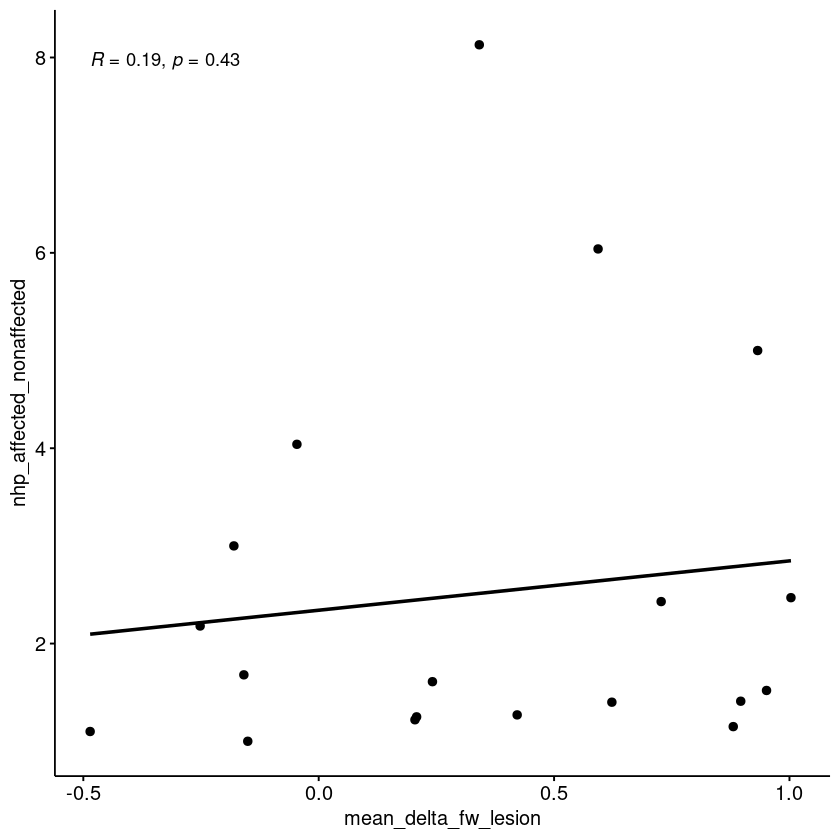

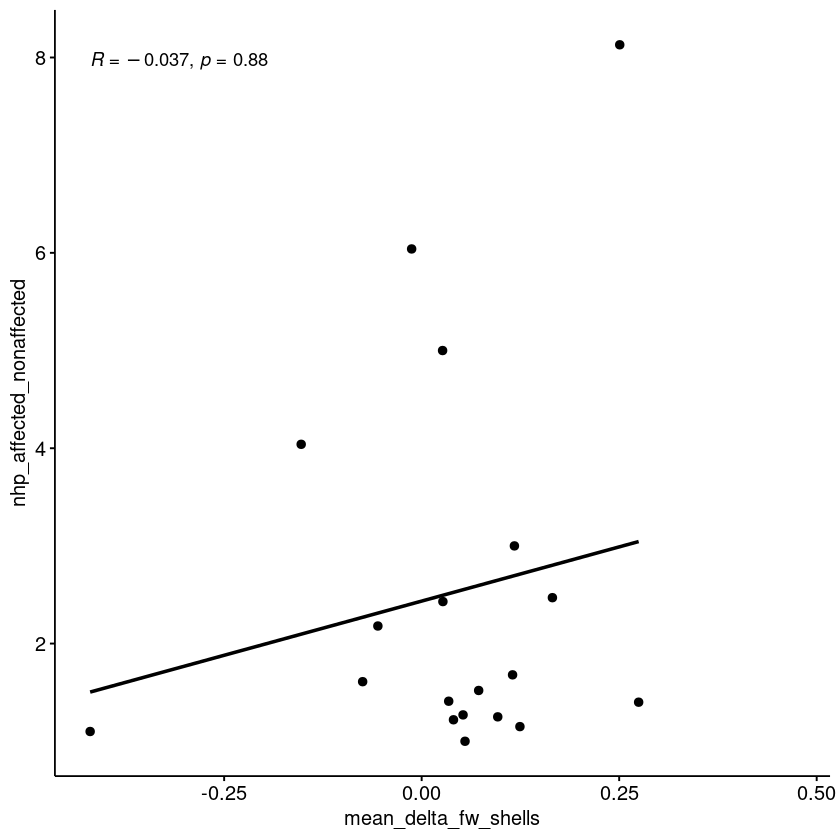

In [93]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "nhp_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "nhp_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: lesional and perilesional FA-t

Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 18 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


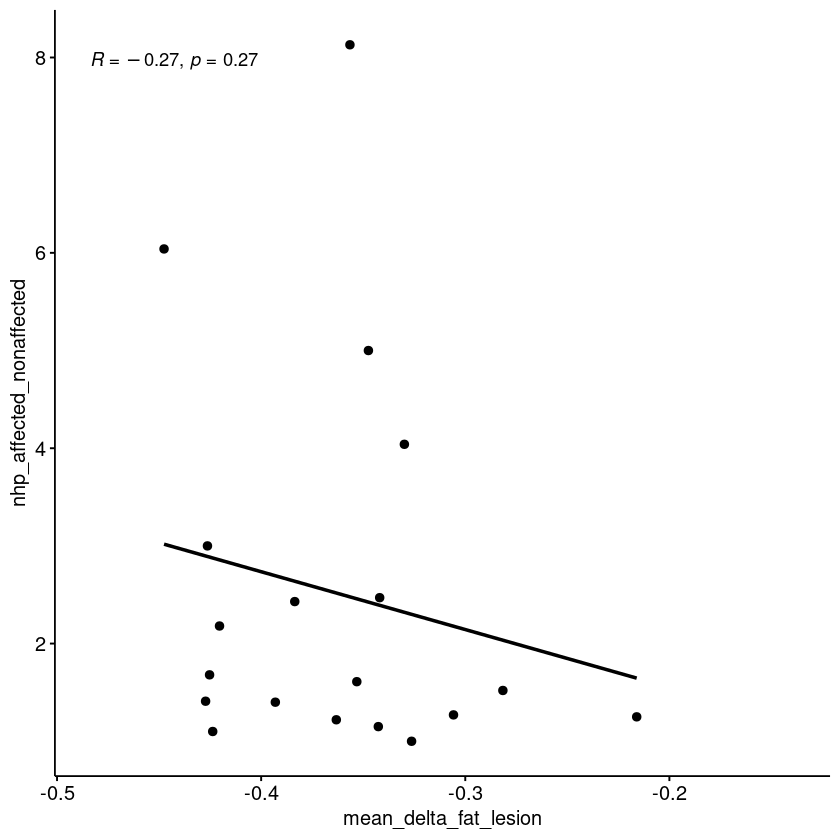

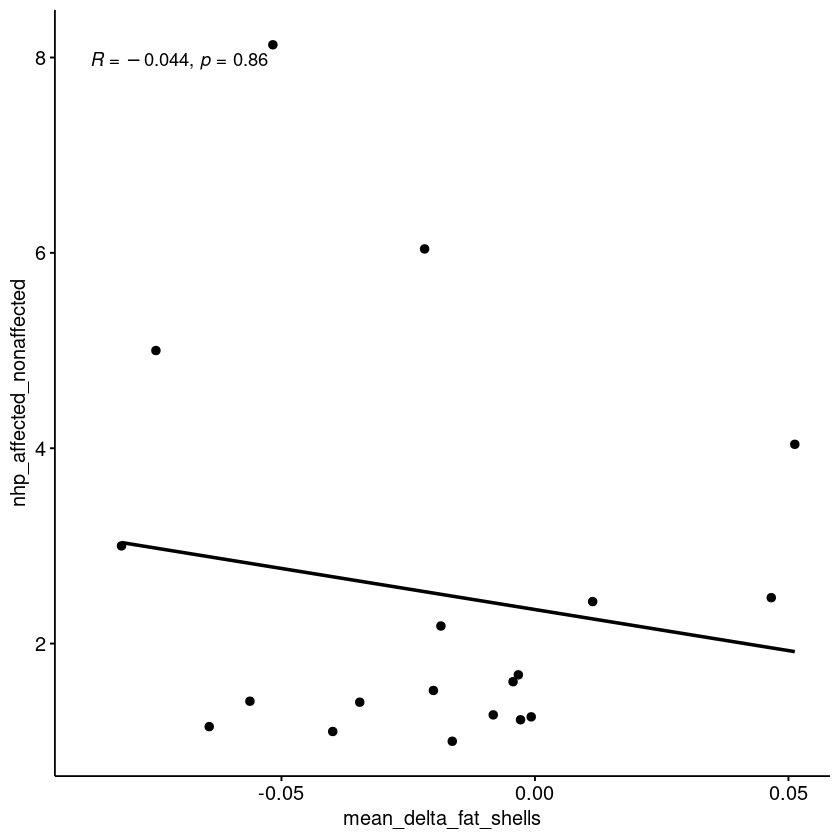

In [94]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "nhp_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "nhp_affected_nonaffected", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

## Lesion volume reduction at 1 month (TP 2)

#### Correlations: baseline lesional and perilesional free-water 

Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


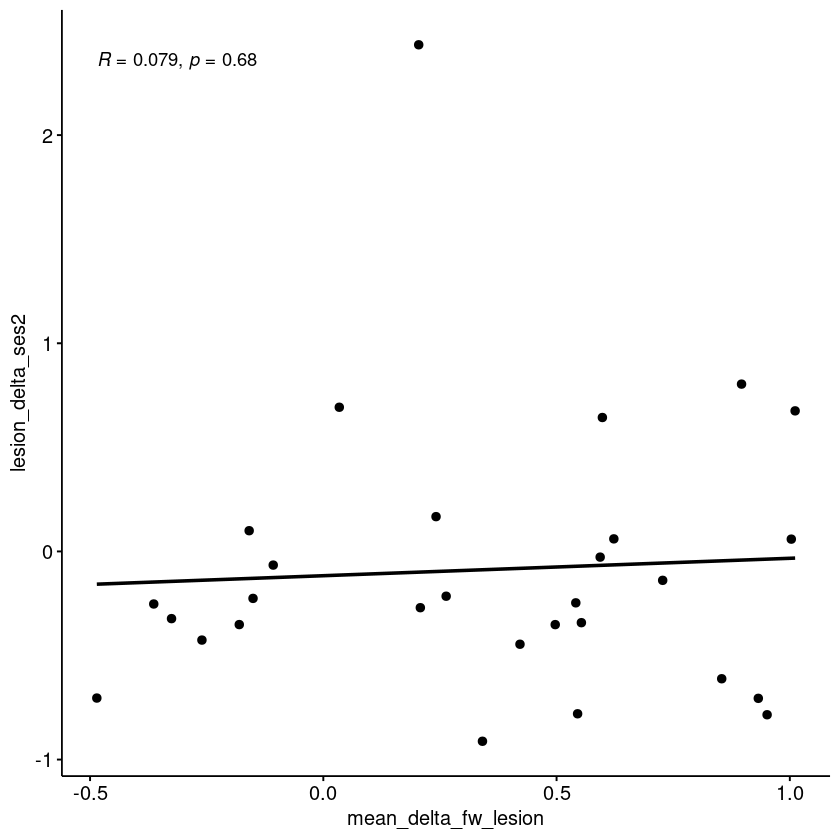

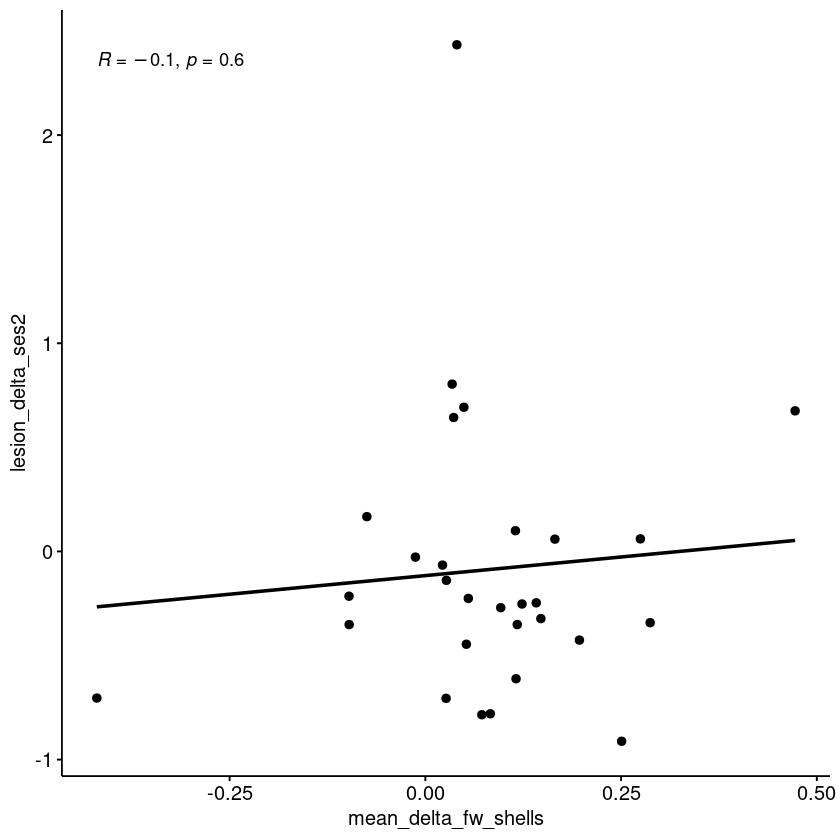

In [95]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: baseline lesional and perilesional FAt

Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


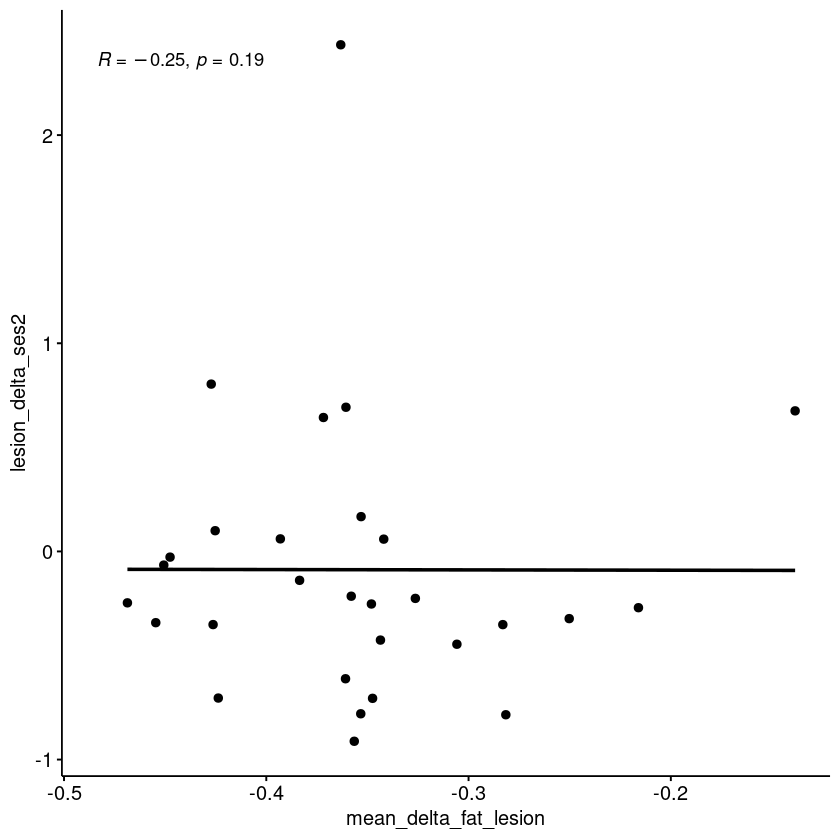

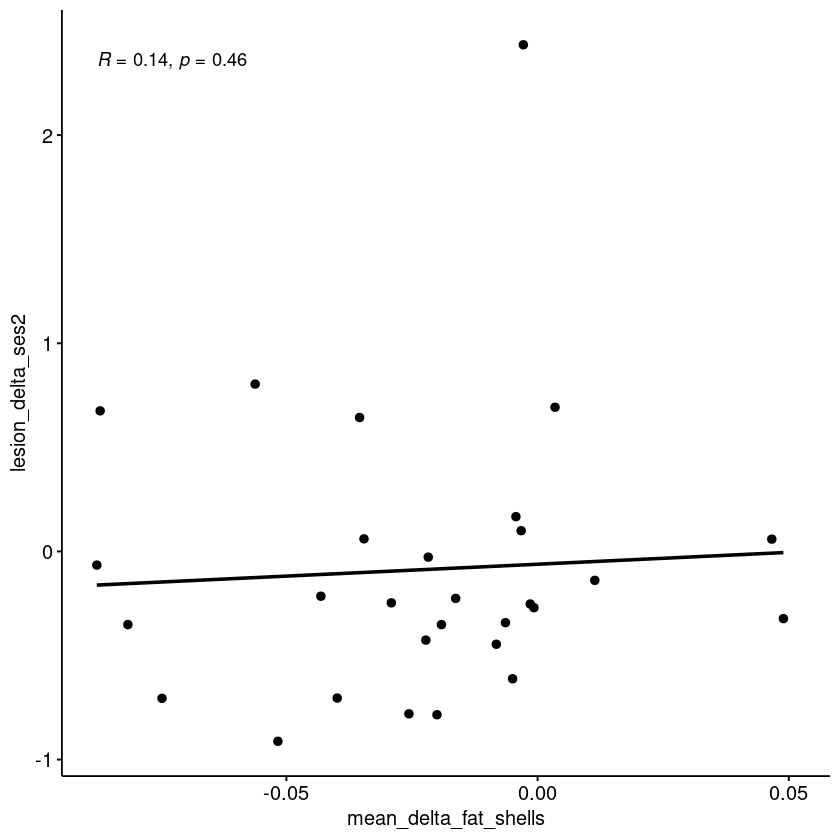

In [96]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: time point 2 lesional and perilesional free-water 

Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


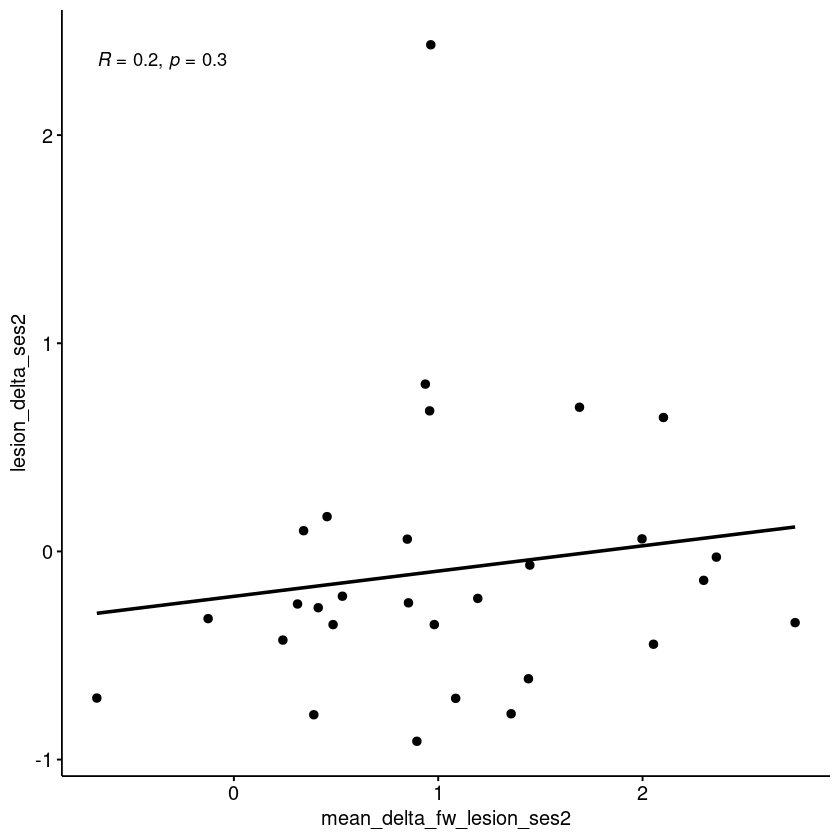

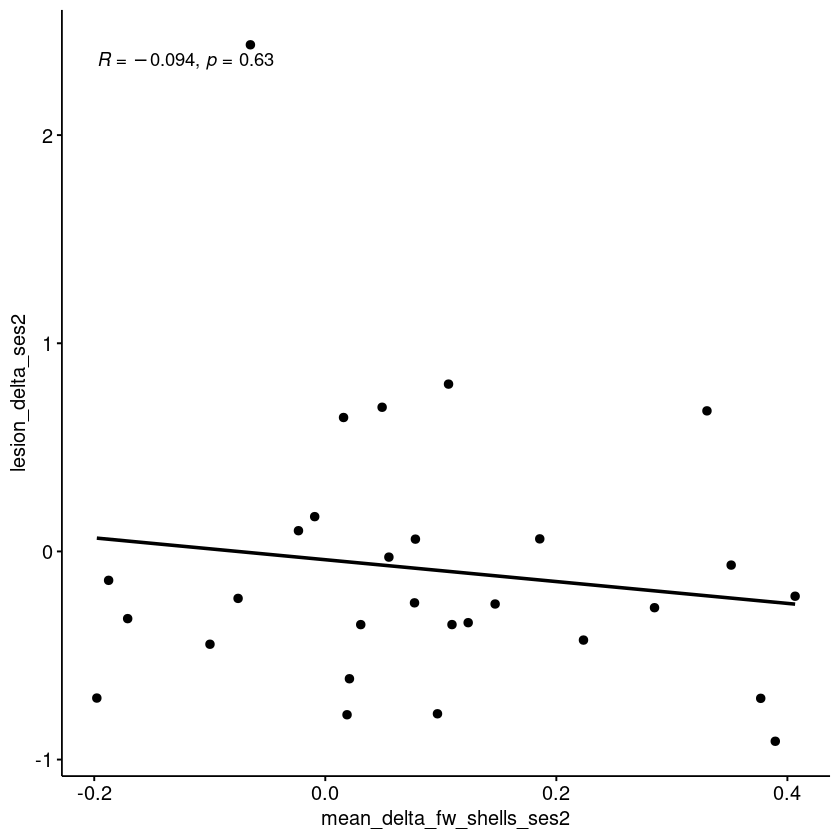

In [97]:
ggscatter(df_correlations, x = "mean_delta_fw_lesion_ses2", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fw_shells_ses2", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)

#### Correlations: time point 2 lesional and perilesional FAt

Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”


Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


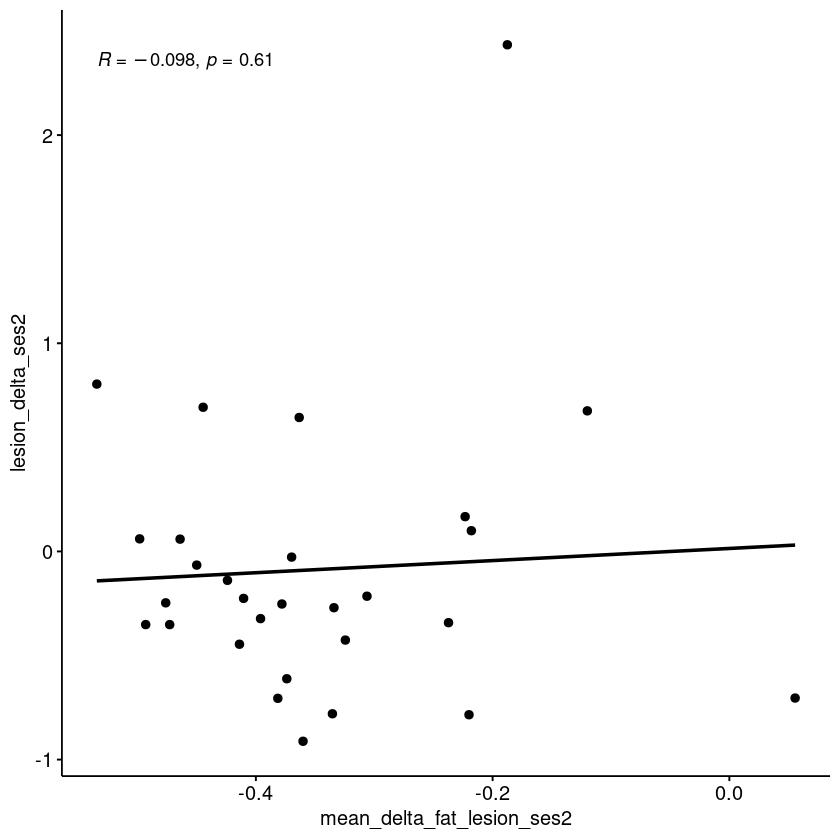

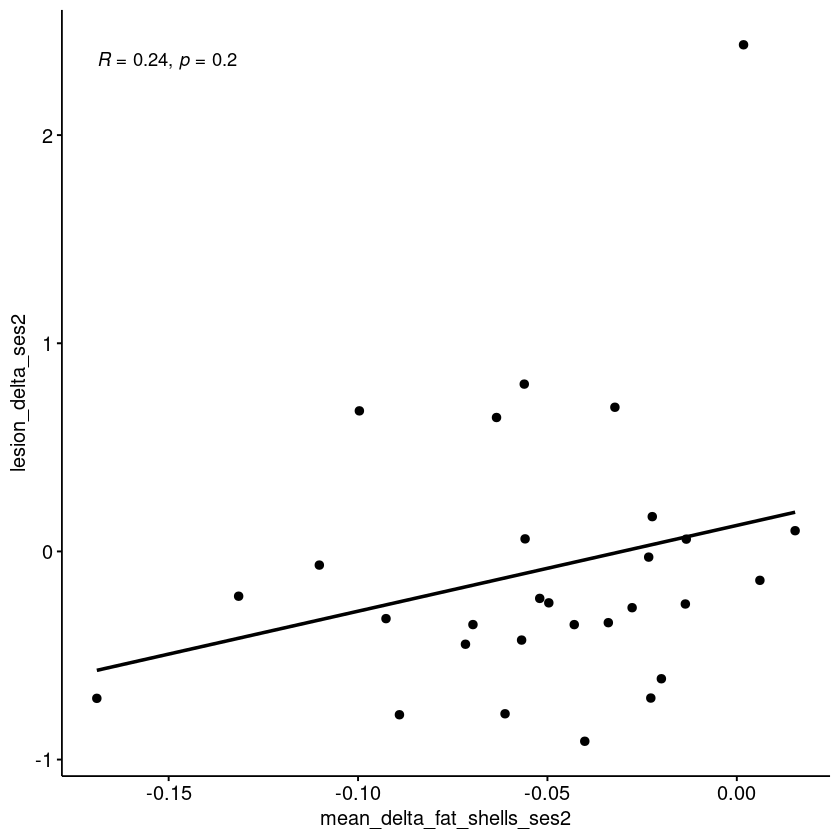

In [98]:
ggscatter(df_correlations, x = "mean_delta_fat_lesion_ses2", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)
ggscatter(df_correlations, x = "mean_delta_fat_shells_ses2", y = "lesion_delta_ses2", add = "reg.line", cor.method = "spearman", cor.coef = TRUE)